## <center>Author: Mathias Godwin
### <center>Email: godwinsaint6@gmail.com
#### <center>Phone: +234 7061 0096 72

***

  ***

`Hello world !`
### Favorite Quote:
 * ###### _if you look well enough at a data you'll surely find something but you might not be able to generalize them on the unseen data 'Cus you look too well on the data at hand_.


# <center><font color=red>Disclaimer !</font></center>

# Convention of codes in this notebook

* We'll be using only the **train** data for our visualization and lot more, so when we mention **total** or **in the company** we're actually talking about the training set.
 * We used the _train_ set only b'cus of computationality and to be the on safer side of data-leakage.
 
 
* Our hypothesis is based on the _train_ data too.
* Whatever we do to the **train** set we'll do to the **test** set later on, we're gonna put those transformations and whatever in a function so we don't re-write those codes.
* Most of our approach to the data are random and there are reasons for that anyway.
***
# We're suppose to follow the _Data Analysis methodology_, which are ...
* Read the learning dataset.
* Sanity check (basic descriptive statistics)
* data cleaning (impute missing data, recoding) 
* Final Quality Control (QC) perform descriptive statistics and think ! (remove possible confounding variable, etc.).
* Explore data (visualization, PCA) and perform basic univariate statistics for association between the target and input variables.
* Perform more complex multivariate-machine learning
* Estimation and hypothesis testing
* Model validation using a left-out-sample strategy (cross-validation, etc.).
* Apply on new data.

`Actually !`, we'll do mostly everything above but in a random other so bare with us.

## You're gonna need this at later end.
# I got the explanation of Hypothesis testing from a notebook; check it below

##  Statistical Test for Correlation
<a id="statistical_test"></a>
***

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of these methods and see how we are doing with our predictions.

###  Hypothesis Testing Outline

A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.
 
A **hypothesis test** usually consists of multiple parts: 

1. Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analyses. 
2. The null hypothesis($H_0$) and Alternating hypothesis($H_1$):
> * The **null hypothesis($H_0$)** is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
> *  An **Alternative hypothesis($H_A$)** is a claim and the opposite of the null hypothesis.  It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
    
3. Determine the **test statistic**: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. [This](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/) article explains it pretty well. [This](https://stattrek.com/hypothesis-test/hypothesis-testing.aspx) article is pretty good as well. 

4. Specify a **Significance level**: The significance level($\alpha$) is the probability of rejecting a null hypothesis when it is true. In other words, we are ***comfortable/confident*** with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%. 

5. Compute the **F-statistics**: Computing the F-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test  

6. Compute the **P-value**: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis is correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this [video](https://www.youtube.com/watch?v=E4KCfcVwzyw) explains the p-value well. **The smaller the P-value, the stronger the evidence against the null hypothesis.**

7. **Describe the result and compare the p-value with the significance value($\alpha$)**: If p<=$\alpha$, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p> $\alpha$, we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing soon.

***

In [253]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import dask
import random
import scipy
import gc



from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import (KFold, 
                                     cross_val_score)
from sklearn.metrics import make_scorer
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score, 
                             roc_auc_score, roc_curve)

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score


import joblib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import(RandomForestClassifier, GradientBoostingClassifier,
                             ExtraTreesClassifier, BaggingClassifier,
                             VotingClassifier, RandomTreesEmbedding)



# load default settings for seaborn
sns.set(style='ticks')

import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# make some changes default
from matplotlib.pyplot import rcParams
rcParams['legend.shadow'] = True

# for most statistical approcah and estimators
from scipy import stats

# Missing value "Dendrogramer" and cool visualizer
import missingno

# Multiple output per line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# sur-face warning
import warnings
warnings.filterwarnings('ignore')

def resize(a=20, b=10):
    return plt.figure(figsize=(a, b))
size = (20, 10)

gc.enable()
# auto saving 5s
%autosave 5

Autosaving every 5 seconds


In [385]:
df_train = pd.read_csv(r"E:\Gwin Compiled.encrypted\data-bank\competitions\intercampusai2019\train.csv")

In [386]:
df_test = pd.read_csv(r"E:\Gwin Compiled.encrypted\data-bank\competitions\intercampusai2019\test.csv")

In [234]:
submission_sample = pd.read_csv(r"E:\Gwin Compiled.encrypted\data-bank\competitions\intercampusai2019\sample_submission2.csv")

In [5]:
df_train.head()

EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  No_of_previous_employers  Promoted_or_Not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

In [6]:
print('Train info: ')
df_train.info()
print('\n')
print('Test info: ')
df_test.info()

Train info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status               

Yo !, the memory usage is quite small though we can still reduce it if we want

Ok, let find out how to ....

## A helper Function

In [387]:
# let reduce the memory usage for our data 
# we'll be defining a function for that though
# I got the code from one beautiful kernel on kaggle
def  reduce_memory(dataframe):
    """
       iterate through all the columns for a dataframe and modify the data type
       to reduce the memory usage
    """
    normal_usage = dataframe.memory_usage().sum() / 1024 ** 2
    print(f'Memory usage of our dataframe is {normal_usage:.2f} MB')
    
    for colname in dataframe.columns:
        column_type = dataframe[colname].dtype
        
        if column_type != object:
            column_min = dataframe[colname].min()
            column_max = dataframe[colname].max()
            
            if str(column_type)[:3] == 'int':
                
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    dataframe[colname] = dataframe[colname].astype(np.int8)
                elif column_min > np.iinfo(np.int32).min and column_min < np.iinfo(np.int16).max:
                    dataframe[colname] = dataframe[colname].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    dataframe[colname] = dataframe[colname].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    dataframe[colname] = dataframe[colname].astype(np.int64)
            else:
                if column_min > np.finfo(np.float16).min and column_max < np.finfo(np.float16).max:
                    dataframe[colname] =  dataframe[colname].astype(np.float16)
                elif column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    dataframe[colname] = dataframe[colname].astype(np.float32)
                else:
                    dataframe[colname] = dataframe[colname].astype(np.float32)
        else:
            dataframe[colname] = dataframe[colname].astype('category')
    reduced_memory = dataframe.memory_usage().sum() / 1024 ** 2
    percent = 100 * (normal_usage - reduced_memory) / normal_usage
    print(f'Memory usage after optimization is {reduced_memory:.2f} MB')
    print(f'Percent reduced is {percent:.2f}%')
    return dataframe

In [388]:
reduce_memory(df_train).head()

Memory usage of our dataframe is 5.55 MB
Memory usage after optimization is 2.46 MB
Percent reduced is 55.73%


EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  No_of_previous_employers  Promoted_or_Not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

Oh yeah !, the memory is now 2.46 MB, that was great !

Now let move on buddy

In [6]:
# a helper function 
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [7]:
summarytable(df_train)

Dataset Shape: (38312, 19)


Name    dtypes  Missing  Uniques  \
0                            EmployeeNo  category        0    38312   
1                              Division  category        0        9   
2                         Qualification  category     1679        3   
3                                Gender  category        0        2   
4                Channel_of_Recruitment  category        0        3   
5                    Trainings_Attended      int8        0       10   
6                         Year_of_birth     int16        0       49   
7                Last_performance_score   float16        0        6   
8                   Year_of_recruitment     int16        0       35   
9                           Targets_met      int8        0        2   
10                       Previous_Award      int8        0        2   
11               Training_score_average      int8        0       61   
12                      State_Of_Origin  category        0       37   
13                     Foreign_schooled  category        0        2   
14                       Marital_Status  category        0        3   
15             Past_Disciplinary_Action  category        0        2   
16  Previous_IntraDepartmental_Movement  category        0        2   
17             No_of_previous_employers  category        0        7   
18                      Promoted_or_Not      int8        0        2   

                       First Value                           Second Value  \
0                      YAK/S/00001                            YAK/S/00002   
1   Commercial Sales and Marketing  Customer Support and Field Operations   
2                 MSc, MBA and PhD                    First Degree or HND   
3                           Female                                   Male   
4          Direct Internal process                      Agency and others   
5                                2                                      2   
6                             1986                                   1991   
7                             12.5                                   12.5   
8                             2011                                   2015   
9                                1                                      0   
10                               0                                      0   
11                              41                                     52   
12                         ANAMBRA                                ANAMBRA   
13                              No                                    Yes   
14                         Married                                Married   
15                              No                                     No   
16                              No                                     No   
17                               0                                      0   
18                               0                                      0   

                       Third Value  Entropy  
0                      YAK/S/00003    15.23  
1   Commercial Sales and Marketing     2.71  
2              First Degree or HND     0.97  
3                             Male     0.88  
4          Direct Internal process     1.11  
5                                2     0.91  
6                             1987     4.81  
7                              7.5     2.37  
8                             2012     3.76  
9                                0     0.94  
10                               0     0.16  
11                              42     5.43  
12                         KATSINA     4.73  
13                             Yes     0.42  
14                         Married     0.76  
15                              No     0.04  
16                              No     0.45  
17                               0     1.81  
18                               0     0.42

In [9]:
# check for null values all over
print('Train :')
df_train.isnull().any()

print('Test: ')
df_train.isnull().any()

Train :


EmployeeNo                             False
Division                               False
Qualification                           True
Gender                                 False
Channel_of_Recruitment                 False
Trainings_Attended                     False
Year_of_birth                          False
Last_performance_score                 False
Year_of_recruitment                    False
Targets_met                            False
Previous_Award                         False
Training_score_average                 False
State_Of_Origin                        False
Foreign_schooled                       False
Marital_Status                         False
Past_Disciplinary_Action               False
Previous_IntraDepartmental_Movement    False
No_of_previous_employers               False
Promoted_or_Not                        False
dtype: bool

Test: 


EmployeeNo                             False
Division                               False
Qualification                           True
Gender                                 False
Channel_of_Recruitment                 False
Trainings_Attended                     False
Year_of_birth                          False
Last_performance_score                 False
Year_of_recruitment                    False
Targets_met                            False
Previous_Award                         False
Training_score_average                 False
State_Of_Origin                        False
Foreign_schooled                       False
Marital_Status                         False
Past_Disciplinary_Action               False
Previous_IntraDepartmental_Movement    False
No_of_previous_employers               False
Promoted_or_Not                        False
dtype: bool

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Statistics')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'General Statistics of our Dataset')

<Figure size 1440x720 with 0 Axes>

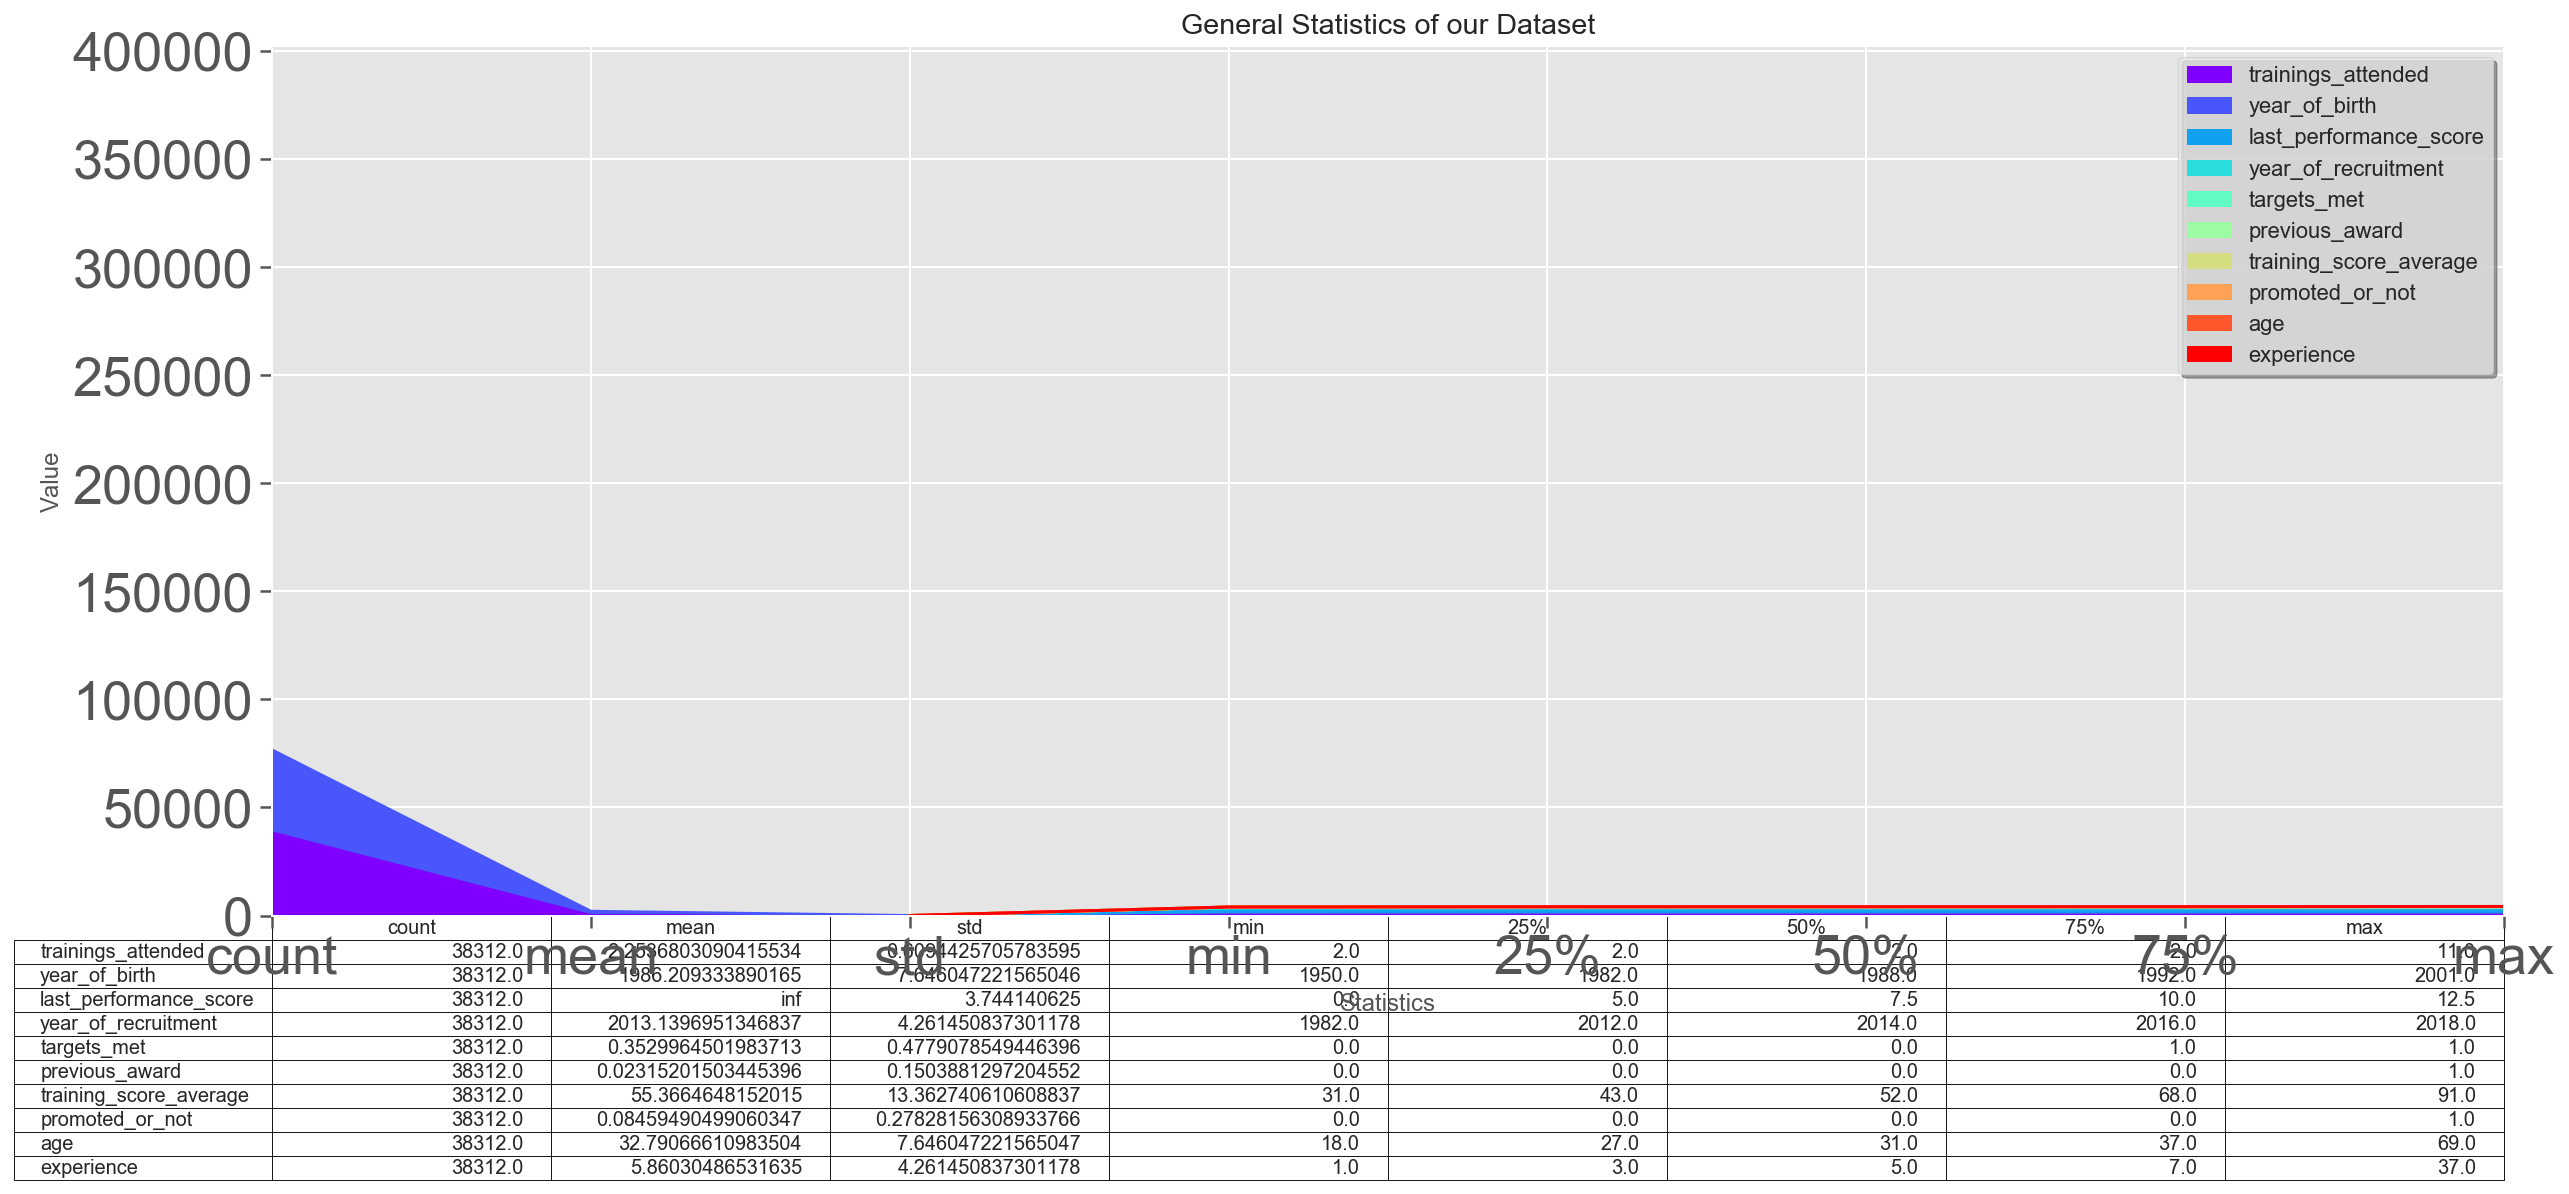

In [15]:
resize()
df_train.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of our Dataset")

# let use the missingno liberary
# Dendrogram visualization
`it's based on hierachical clustering of missing values. so it shows a tree respresenting groupings of columns that have strong nullity correlation. so it identitiies groups that are correlated, rather than simple pairs ( as in the heatmap)`

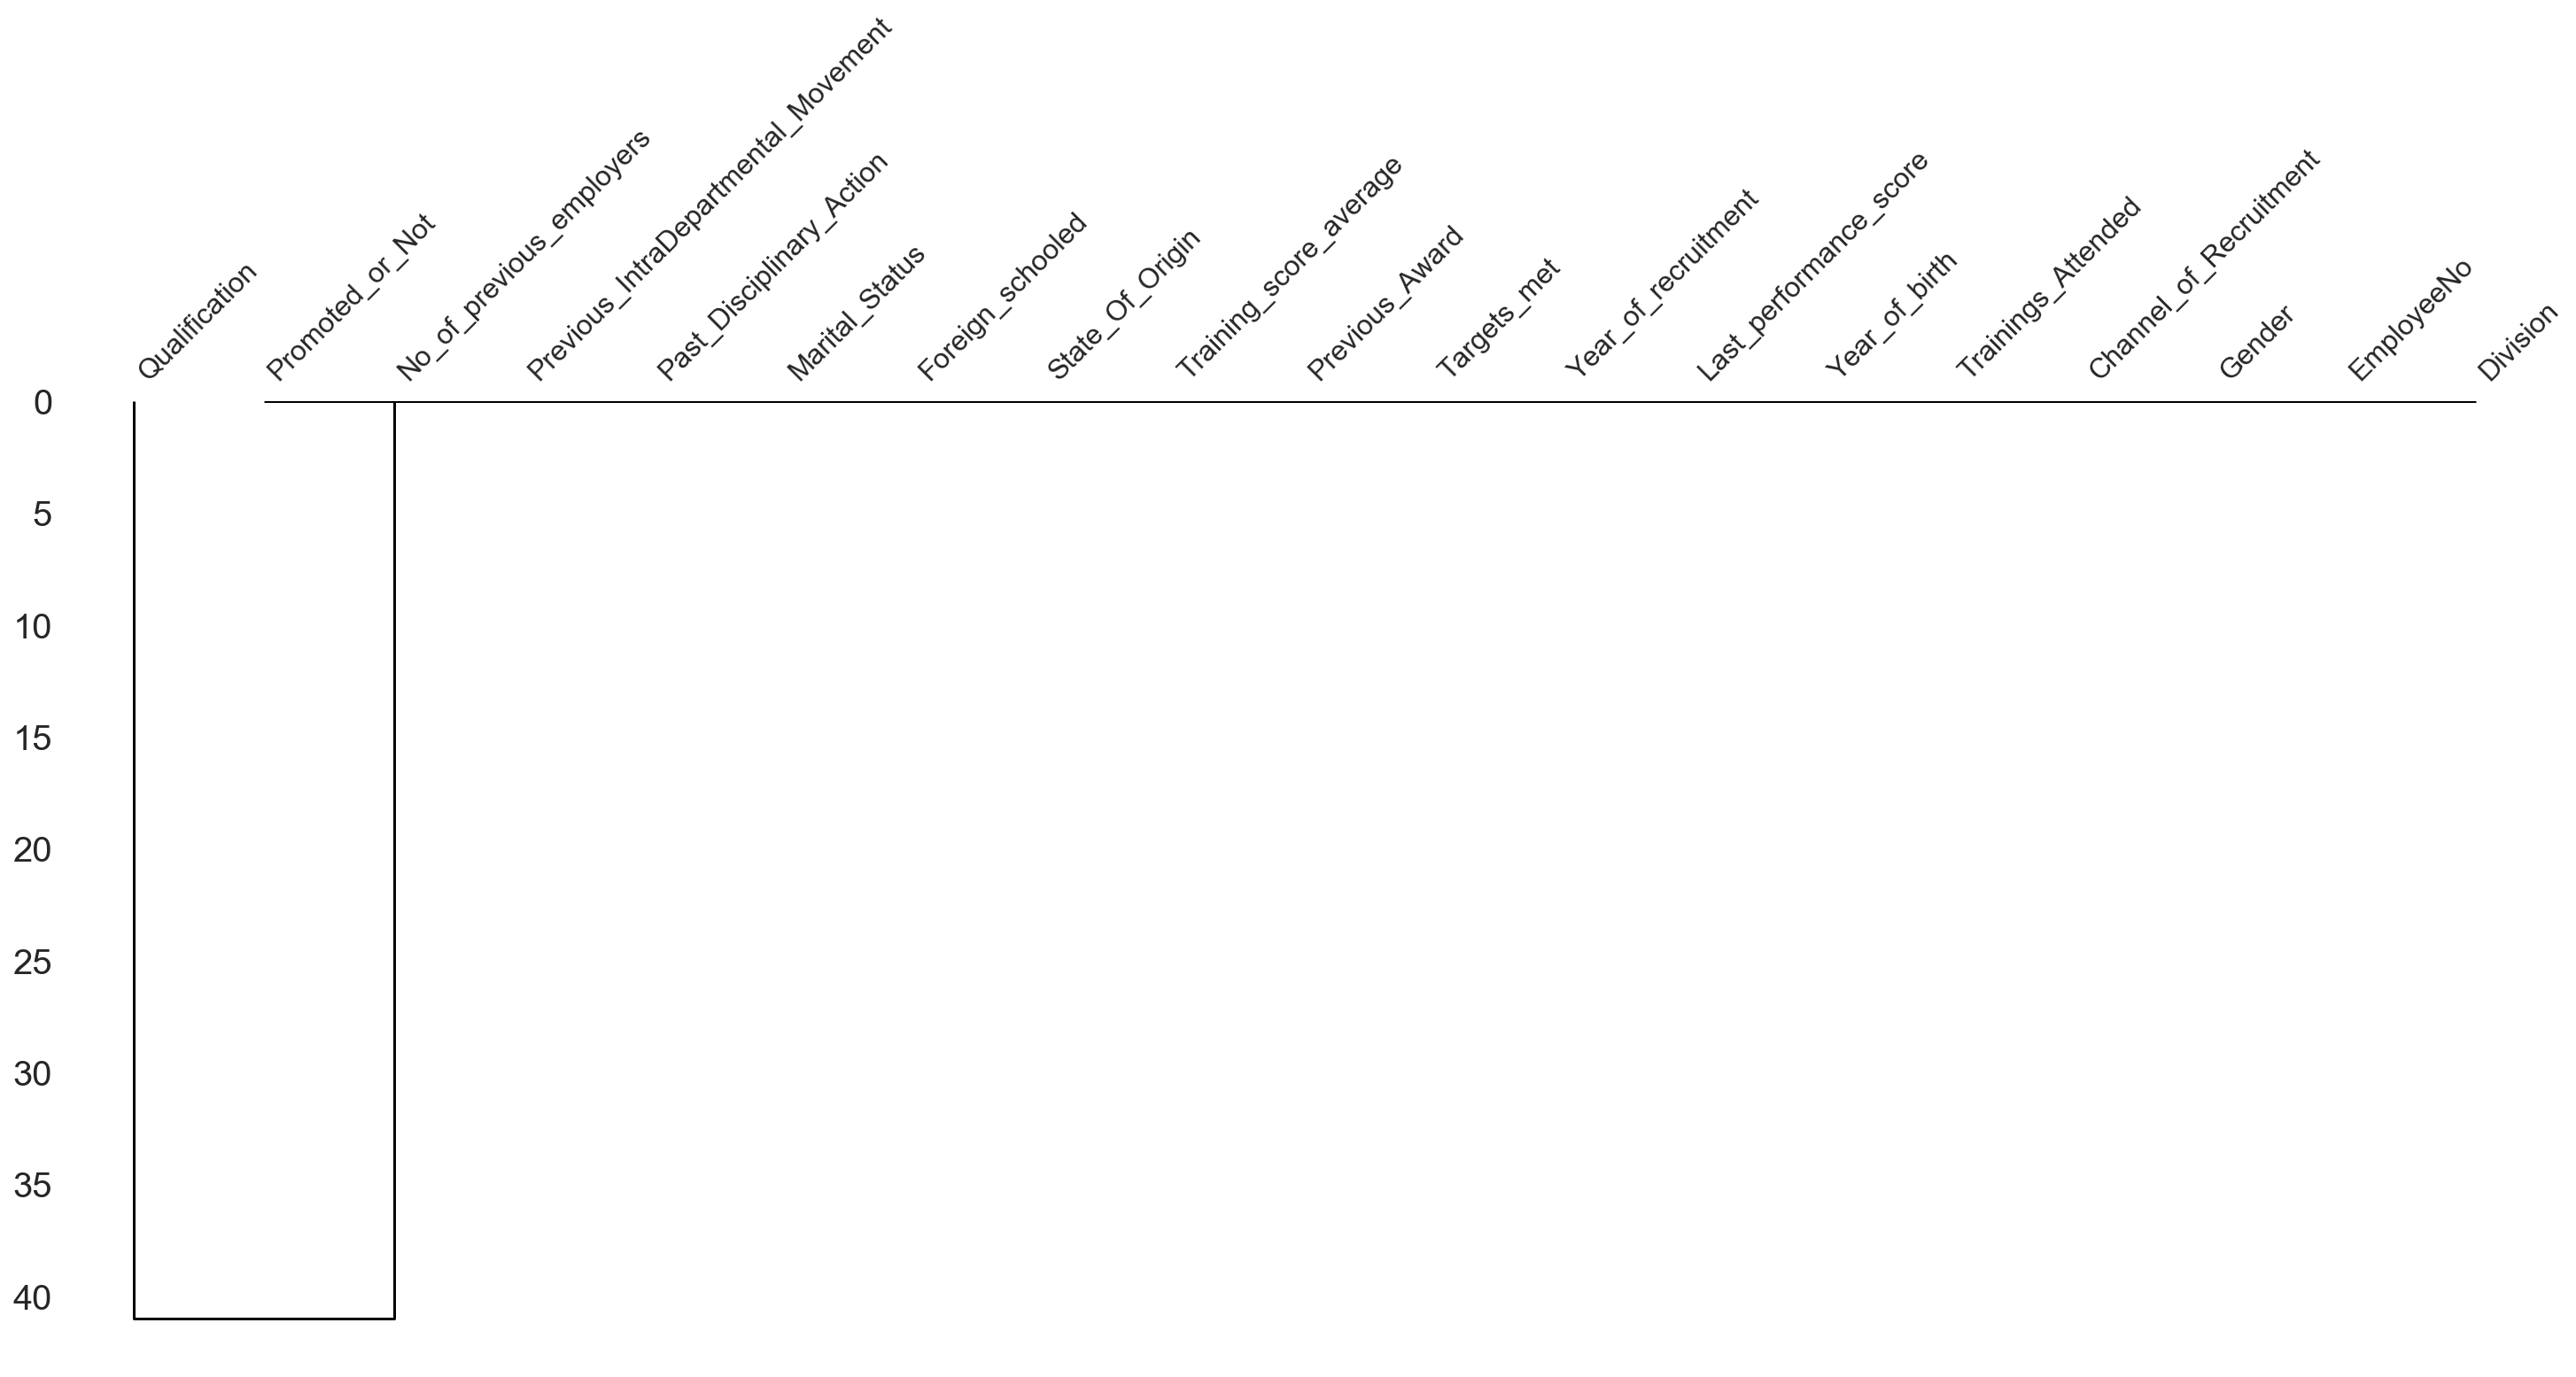

In [10]:
missingno.dendrogram(df_train)

# Missing Bar chart
`This bar chart gives you an idea about how many missing values are there in each column`

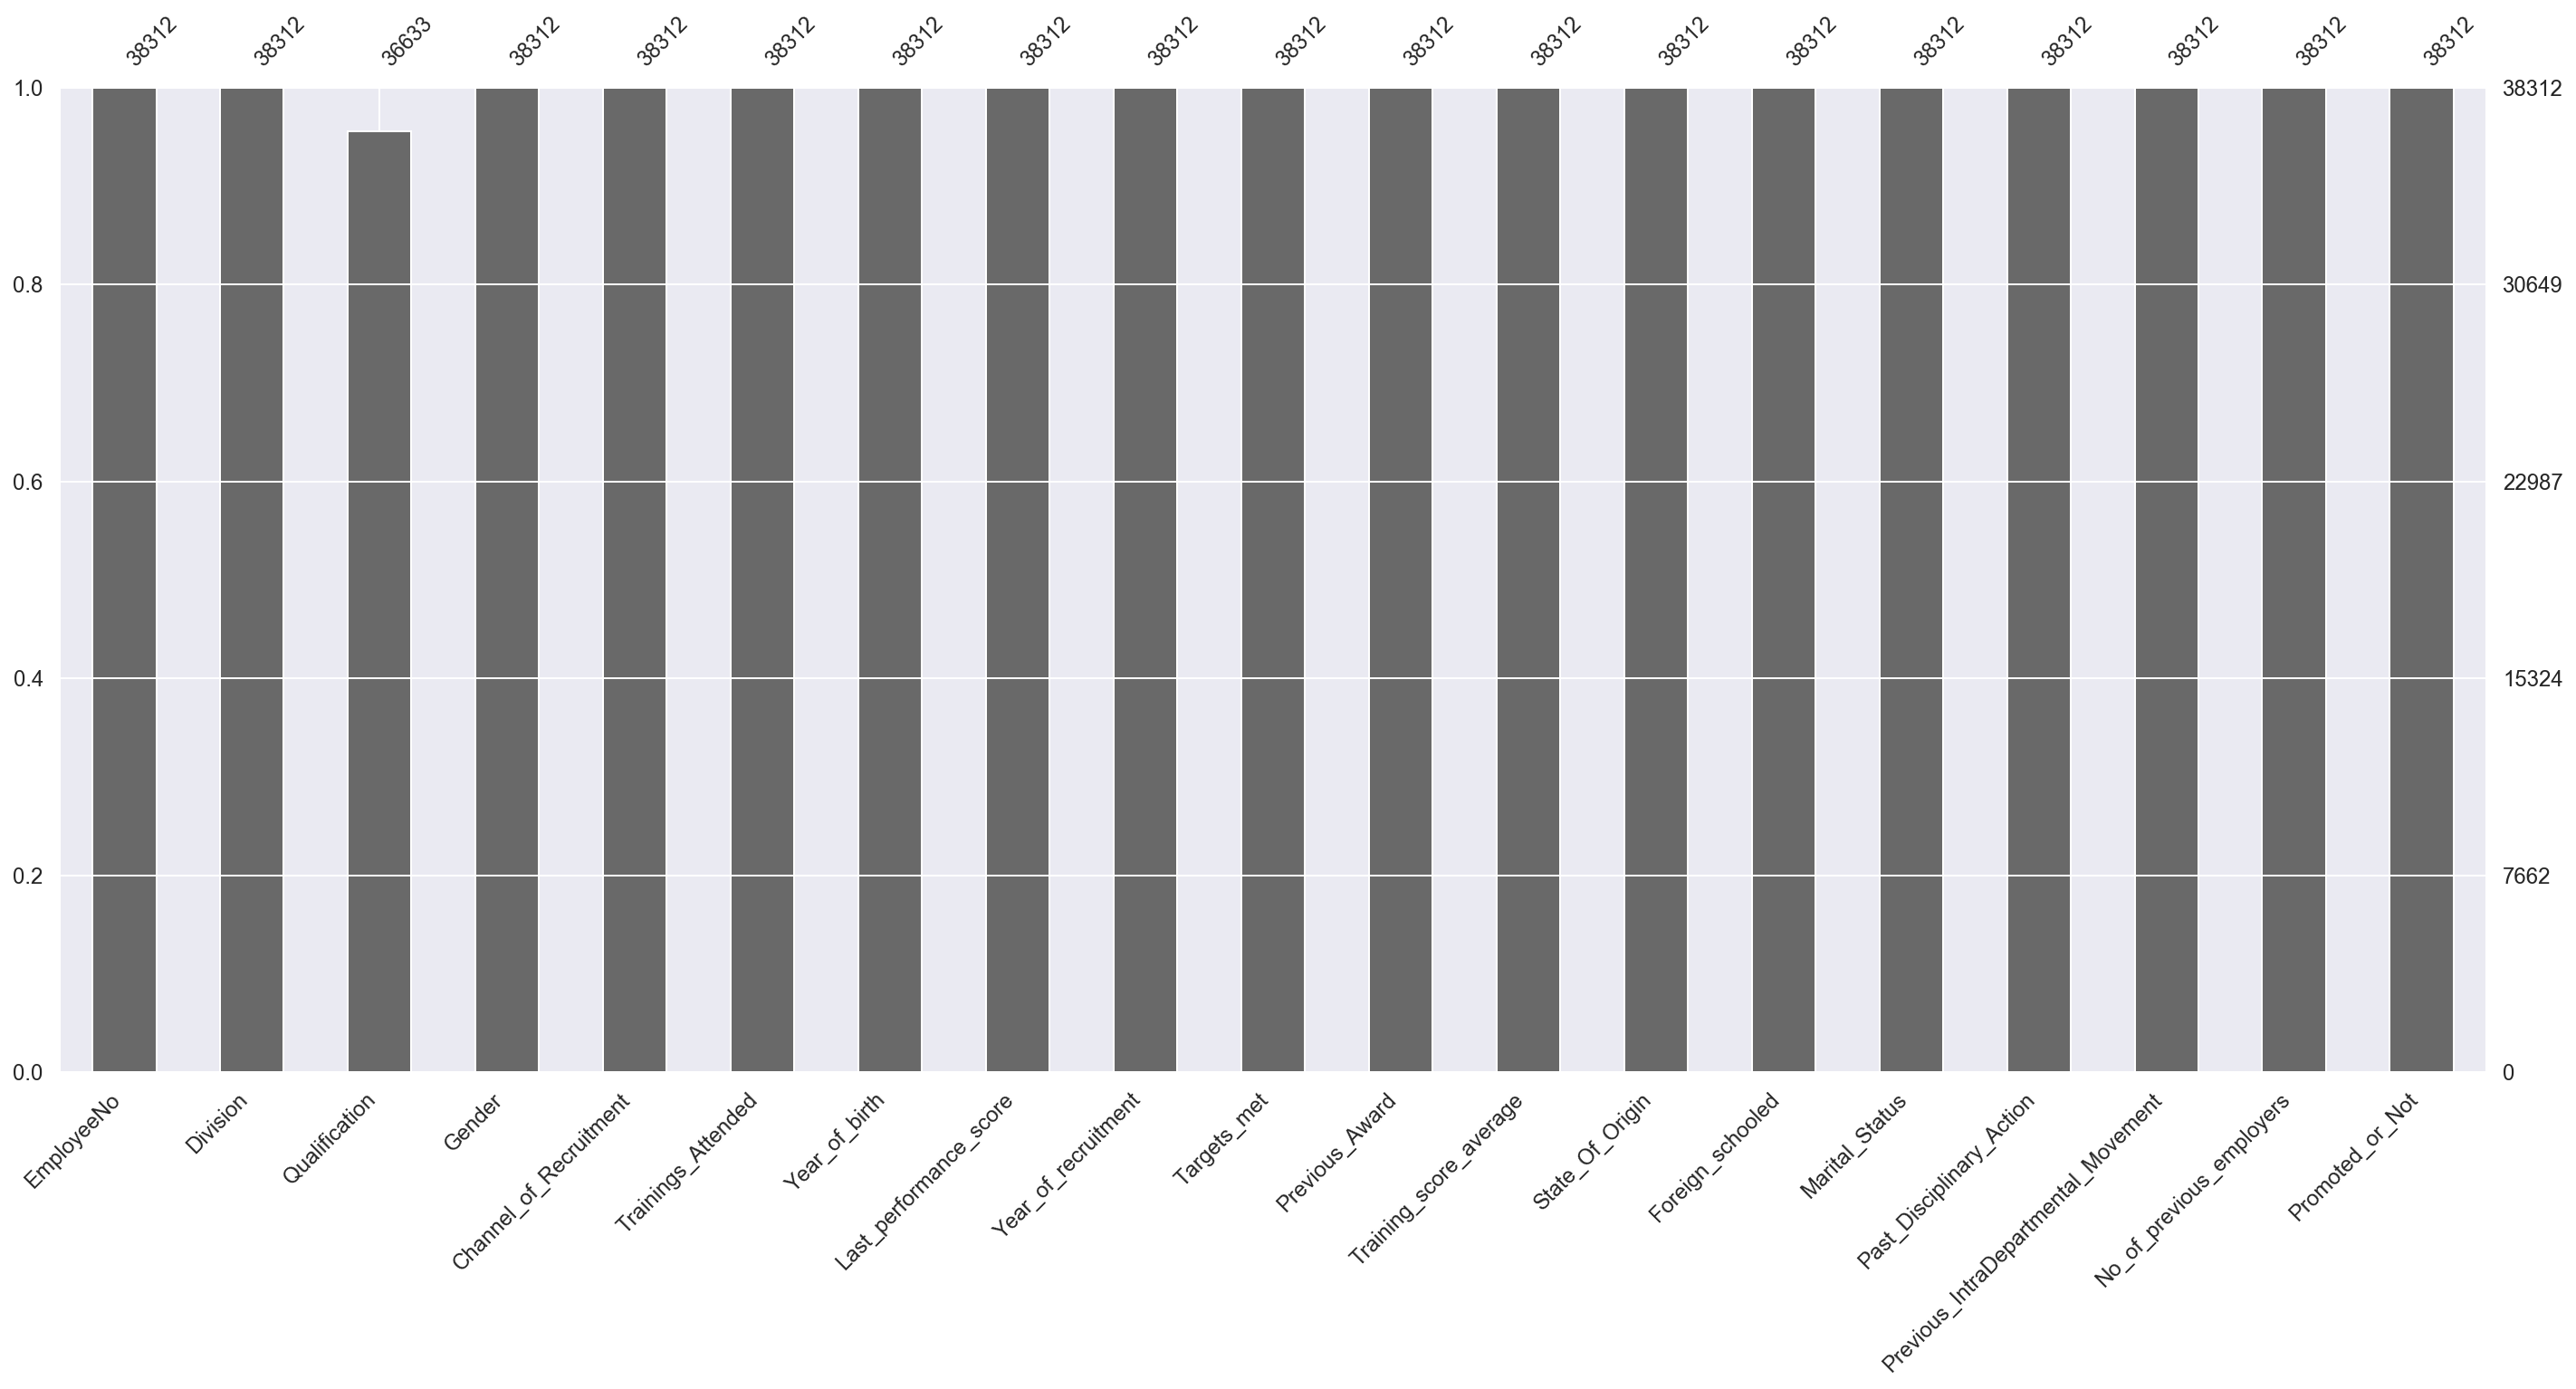

In [25]:
missingno.bar(df_train, fontsize=12)

## Missingno and it Matrix
We'll be using the missingno liberary to find pattern of missingness in the dataset

 We'll be imputing the missingvalue with mean/median or predicted values, and maybe use CV to determine the best for our data

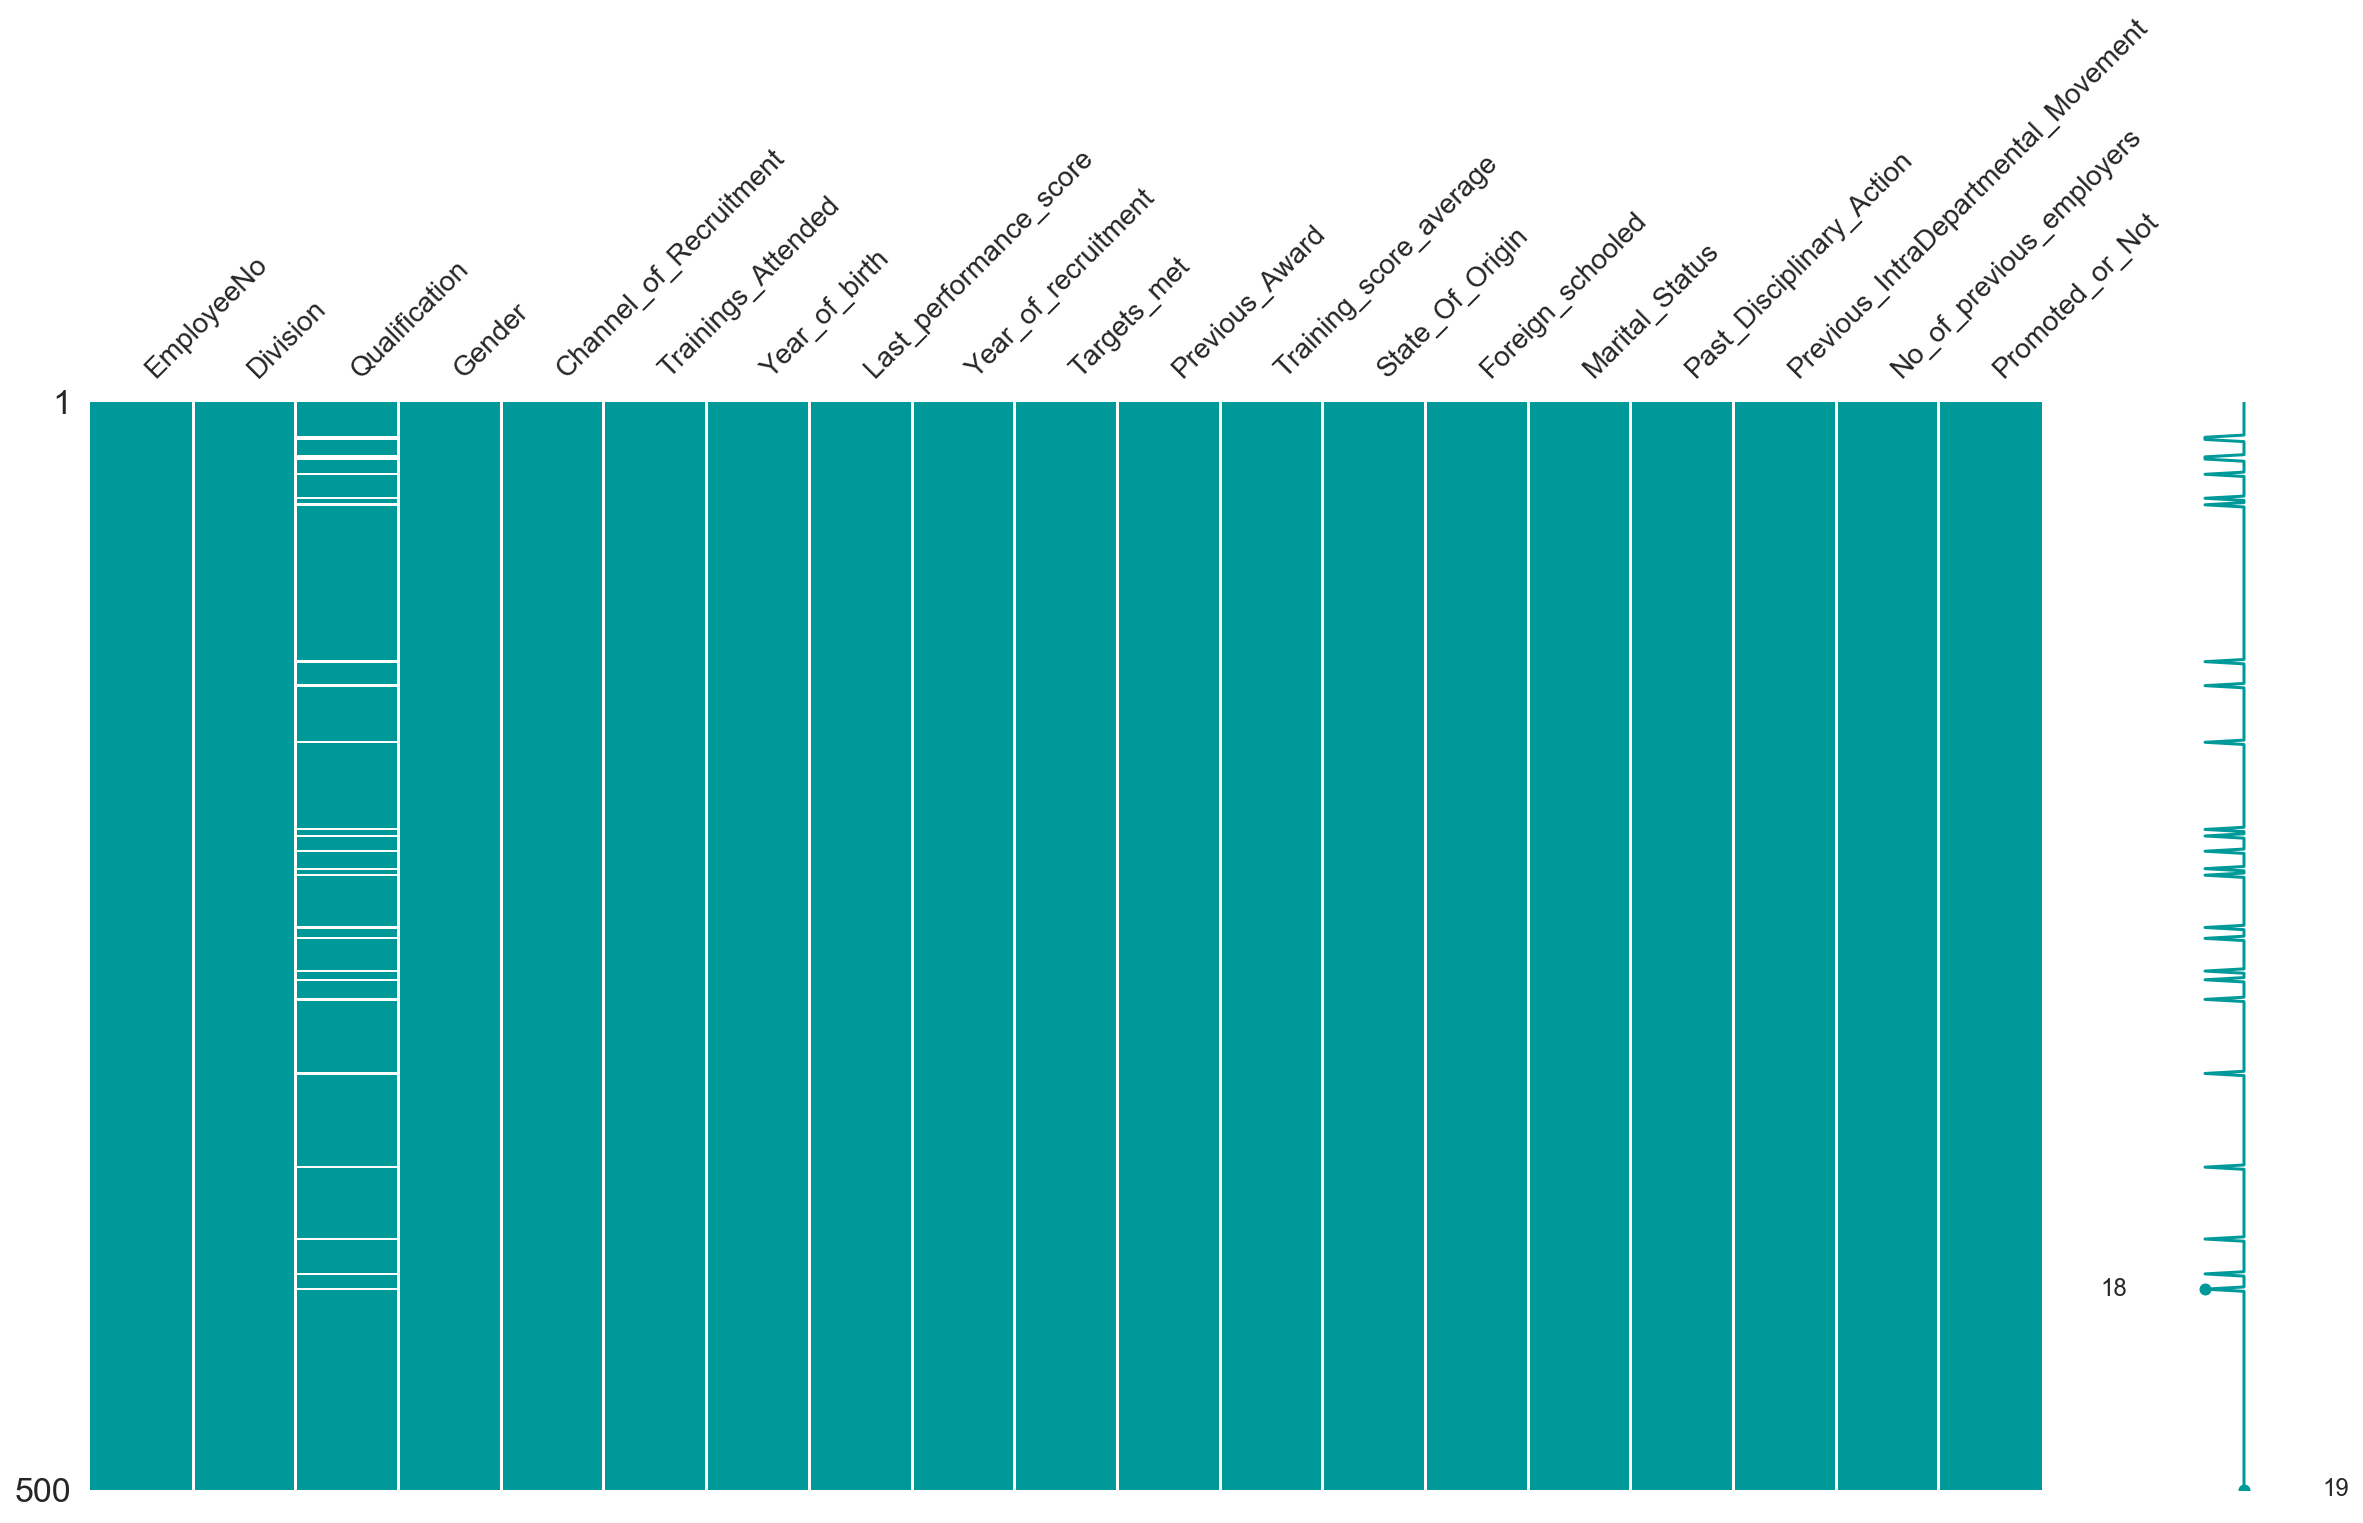

In [26]:
missingno.matrix(df_train.sample(500), figsize=(20, 10), width_ratios=(10,1), color=(0.0,0.6, 0.6), fontsize=14)

### ahoy !, we've only one column with a bordering missing value, so we've gotten little to worry about partaining missing values

let do some visualization and find what's import and what ain't  :-)

## NOTE:
#### we're gonna do the visualization of the some variables 

In [27]:
# a glance one more time 
df_train.head()

EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  No_of_previous_employers  Promoted_or_Not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

## Vis-1:
let visualize Targets mets betweeen gender and target met

Rectangle(xy=(-0.4, 0), width=0.8, height=24788, angle=0)


Text(-0.24000000000000002, 24788, '24788')

Rectangle(xy=(0.6, 0), width=0.8, height=13524, angle=0)


Text(0.76, 13524, '13524')

Text(0.5, 1, 'Frequency plot for the Target met ')

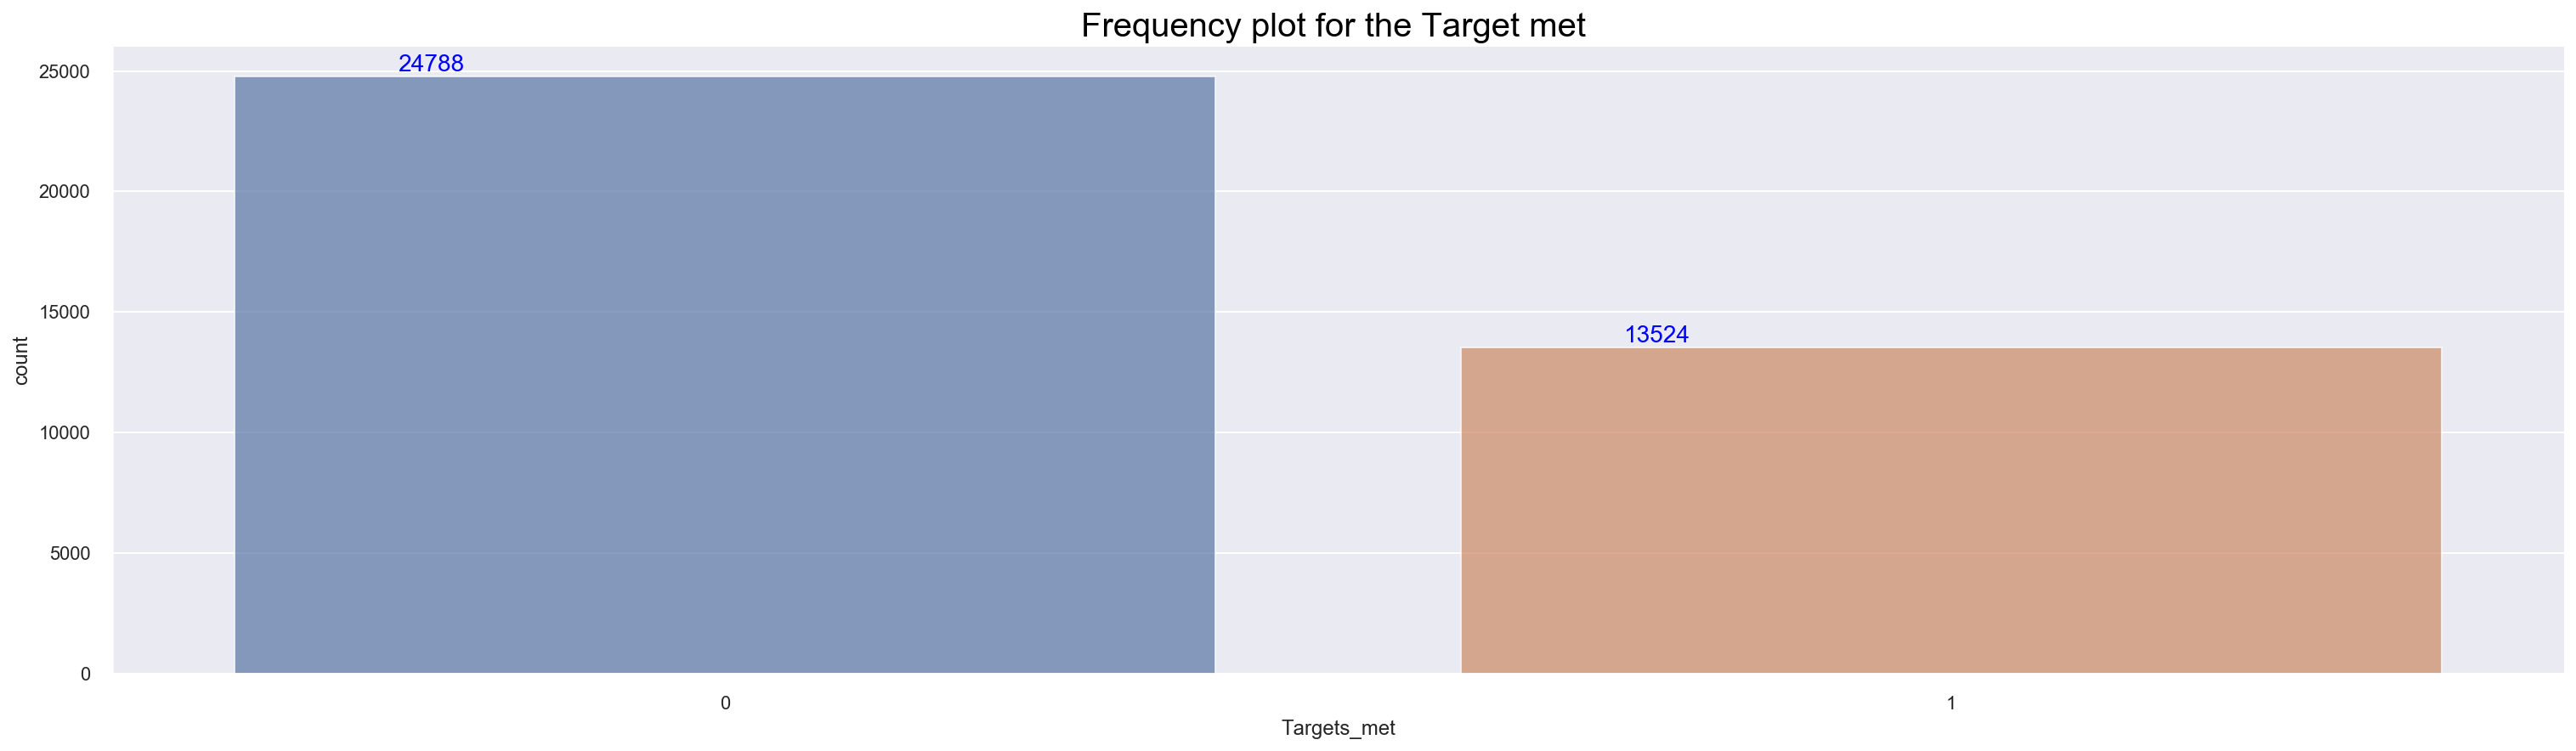

In [103]:

sns.set(font_scale=1)
sns.catplot(data=df_train.dropna(axis=1, how='any'), x='Targets_met', kind='count', alpha=0.7, height=6, aspect=3.5)
# get current axis on current figureabs
ax = plt.gca()

# max value to be set 
y_max = df_train[['Targets_met']].dropna().count().max()

# Iterate through the list of axis patches
for i in ax.patches:
    print(i)
    ax.text(i.get_x() + i.get_width()/5, i.get_height(), '%d' % int(i.get_height()),
            fontsize=14, color='blue', ha='center', va='bottom')
    
plt.title('Frequency plot for the Target met ',  fontsize=20, color='black')
plt.show()

#### Oh, what a miss,  we got `"38312"` total targets, only 1354 where met `"24788"` got missed
##### Well, they'd get through that anyway


## Viz-2:
### Now let get, to know which gender, age and others with the targets miss

In [104]:
dic_m = {'target_met':[],
     'target_not_met':[],
     'gender':[]}
for gender, value in df_train.groupby(['Gender'])['Targets_met']:
    dic_m['target_met'].append(value.value_counts()[1])
    dic_m['target_not_met'].append(value.value_counts()[0])
    dic_m['gender'].append(gender)
    
target_met_n_not = pd.DataFrame(dic_m).set_index('gender')

In [105]:
target_met_n_not

target_met  target_not_met
gender                            
Female        4357            7075
Male          9167           17713

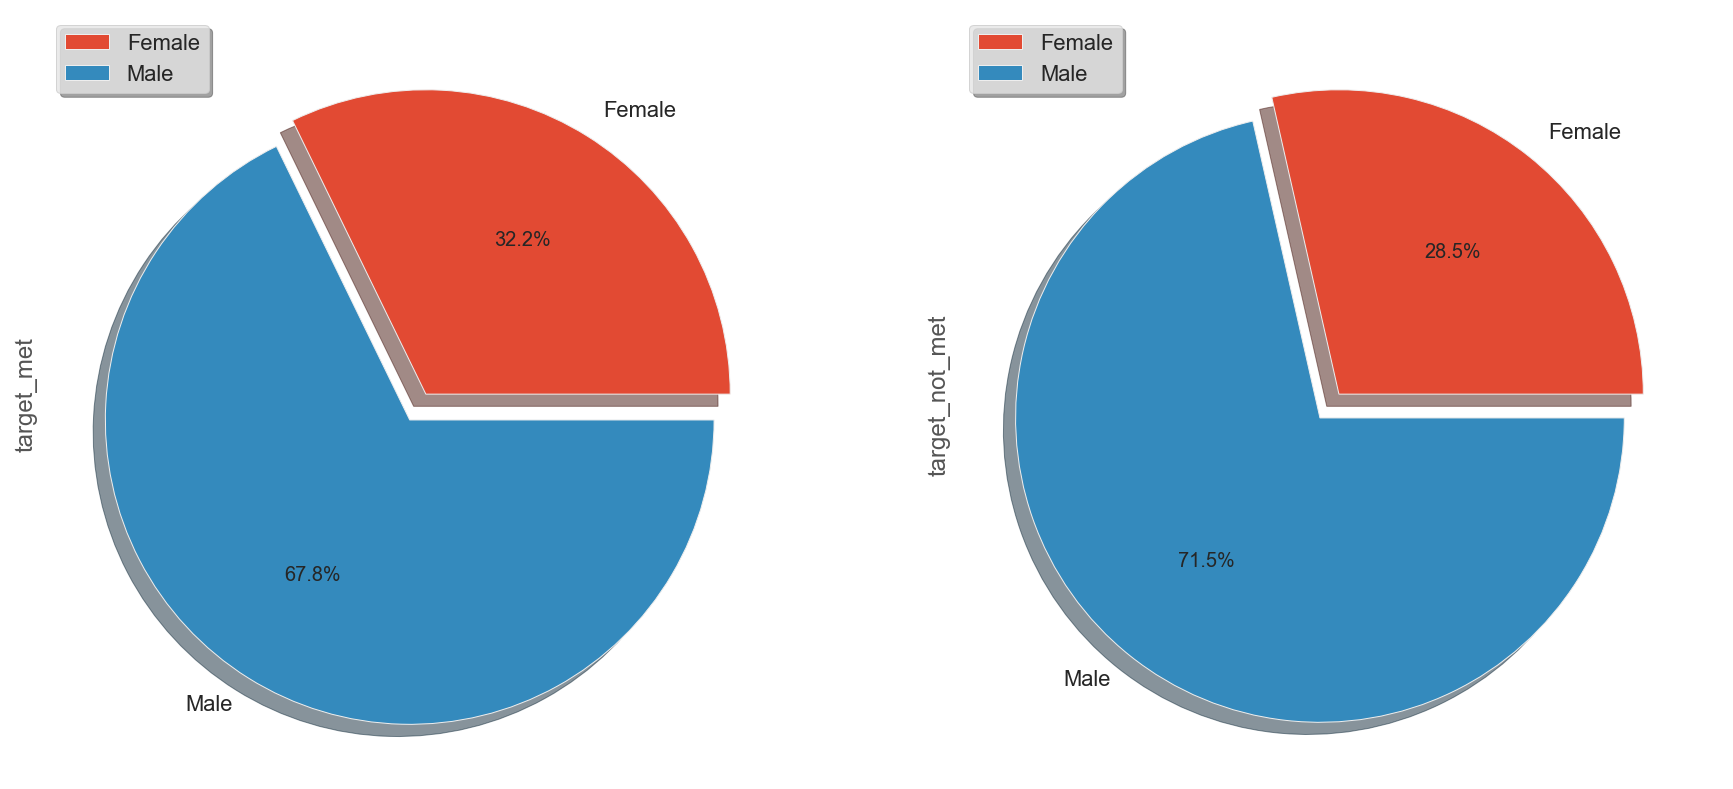

In [110]:
# plt.subplot(121)
# 
ax = target_met_n_not.plot.pie(figsize=size, subplots=True, explode=[0, 0.1], autopct='%1.1f%%', shadow=True)

In [111]:
df_train.Gender.value_counts()

Male      26880
Female    11432
Name: Gender, dtype: int64

##### <font color=green><i>ay !, it seems we have most target met by "Male" and also most target lost by the "Male" ,oops!, maybe b'cus of "Male" are 2x the "Female".</i></font>
well, what can we say about this? should we say men meet the targets more often than the women ? or something ?, 

I'd not agree if you say b'cus:
* 1. we have more "Male" than "Female"
* 2. There might be some bias which we haven't figured out yet, but we might as we go on

# A helper Function

In [390]:
# en-safe the columns
def lower_case_column(df):
    df.columns = [i.lower() for i in df.columns]
    return df
df_train = lower_case_column(df_train)

In [391]:
# a glance once more
df_train.head()

employeeno                               division        qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  previous_award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   training_score_average state_of_origin foreign_schooled marital_status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  past_disciplinary_action previous_intradepartmental_movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  no_of_previous_employers  promoted_or_not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

#### Let pose a question

* 1.  `do people with higher qualification have higher tendency of been promoted ?`
* 2.  `does experience has anything to do (correlate) with promotion ?`
* 3.  `moretocome `

## Lets try and answer the first question...

### Feature engineering 1:
added features:

* 1. Experience
* 2. age

# A helper Function

In [392]:
# We'll be using 2019 because that was when the competition holds,
def add_feature(df, feature, col):
    df[feature] = 2019 - df[col]
    return df

In [393]:
df_train = add_feature(df_train, 'age', 'year_of_birth')

 experience would be current year from year employed;
 so thesame logic as above

In [394]:
df_train = add_feature(df_train, 'experience', 'year_of_recruitment')

In [395]:
df_train.experience.head()

0     8
1     4
2     7
3    10
4     7
Name: experience, dtype: int16

### Question 1:
*  `do people with higher qualification have higher tendency of been promoted ?`

In [396]:
df_train.qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: qualification, dtype: int64

In [397]:
# dic_m = {'promoted':[],
#      'not_promoted':[],
#      'qualification':[]}
# for gender, value in df_train.groupby(['qualification'])['promoted_or_not']:
#     dic_m['promoted'].append(value.value_counts()[1])
#     dic_m['not_promoted'].append(value.value_counts()[0])
#     dic_m['qualification'].append(gender)
    
# promoted_n_not = pd.DataFrame(dic_m).set_index('qualification')

In [398]:
p_or_not = df_train.groupby(['qualification', 'promoted_or_not'])['promoted_or_not'].count()

In [399]:
is_promoted_df = pd.DataFrame(p_or_not.iloc[:, ]).rename(columns={'promoted_or_not':'counter'}).reset_index().sort_values(
    by=['counter', 'promoted_or_not'], 
    ascending=False)

In [400]:
is_promoted_df

qualification  promoted_or_not  counter
0       First Degree or HND                0    23483
2          MSc, MBA and PhD                0     9457
1       First Degree or HND                1     2095
3          MSc, MBA and PhD                1     1012
4  Non-University Education                0      534
5  Non-University Education                1       52

### _summary of the above_ :
> `First Degree or Hnd`:

The company has assumed total of `25578`  First Degree or Hnd employees with `2095` promoted over the years and `23483` still hoping for a lift

> `MSc, MBA and Phd`:

The company has assumed total of `10469`  MSc, MBA and Phd employees with `1012` promoted over the years and `9457` still hoping for a lift

> `Non-University Education`:

The company has assumed total of `586`  Non-University Education employees `52` promoted over the years and `534` still hoping for a lift



can we now say that, yes ! people with `First Degree of Hnd`  have higher chance of been promoted ?

well, that's is bearly true cus we have more `First Degree or Hnd` employee in the company, so, instead of just optimizing our guesses, let do hypothesis testing.

## Hypothesis testing
### Formulated and valid question:
> * is there significant difference between mean promotion and members qualification or certification?
> * does experience has anything to do (correlate) with promotion ?

### The Null Hypothesis and The Alternative Hypothesis:
> * Null Hypotheis($H_0$):  there is significant difference between mean promotion and members qualification or certification
> * Alternative Hypothesis($H_A$):  there isn't significant difference between mean promotion and members qualification or certification


#### Specify the significance level:
> Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more in-depth about those in another lesson. For now, we have decided to make our significance level($\alpha$) = 0.05. So, our confidence interval or non-rejection region would be (1 - $\alpha$) =   95%. 

#### Computing F-statistics and P-value:
Let's take a random sample and see the difference.

In [401]:
msc_mba_PhD = df_train[df_train['qualification'] == 'MSc, MBA and PhD'].promoted_or_not

first_degree_or_HnD = df_train[df_train['qualification'] == 'First Degree or HND'].promoted_or_not

non_university_education = df_train[df_train['qualification'] == 'Non-University Education'].promoted_or_not

In [402]:
msc_mba_PhD.mean()

0.09666634826631006

In [403]:
non_university_education.mean()

0.08873720136518772

In [404]:
first_degree_or_HnD.mean()

0.08190632574869028

In [405]:
print('MSc, MBA and PhD promoted_or_not mean: ', msc_mba_PhD.mean())
print('First Degree or HND promoted_or_not mean: ', first_degree_or_HnD.mean())
print('Non-University Education promoted_or_not: ', non_university_education.mean())
print('The mean difference between them: ',
     abs(msc_mba_PhD.mean() - first_degree_or_HnD.mean() - non_university_education.mean()))

MSc, MBA and PhD promoted_or_not mean:  0.09666634826631006
First Degree or HND promoted_or_not mean:  0.08190632574869028
Non-University Education promoted_or_not:  0.08873720136518772
The mean difference between them:  0.07397717884756794


Now, we have to understand that those three means are not  **the population mean ($\bar{\mu}$)**.  *The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks.* For example, To find the age population mean of Bulgaria; we have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually the distribution start to look more like a **normal distribution**. The more samples we take and the more sample means will be added and, the closer the normal distribution will reach towards population mean. This is where **Central limit theory** comes from. 
Going back to our dataset, like we are saying these means above are part of the whole story. We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us at this point to know the population means of promotion  for First Degree or HND, Non-University Education and MSc, MBA and PhD. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of First Degree or HND, Non-University Education and MSc, MBA and PhD from our train data.

In [406]:
# seperating them
msc_mba_PhD = df_train[df_train['qualification'] == 'MSc, MBA and PhD']

first_degree_or_HnD = df_train[df_train['qualification'] == 'First Degree or HND']

non_university_education = df_train[df_train['qualification'] == 'Non-University Education']

## empty lists for storing mean sample 
msc_mean_sample = []
hnd_mean_sample = []
non_uni_sample = []

for i in range(50):
    msc_mean_sample.append(
    np.mean(random.sample(list(
    msc_mba_PhD['promoted_or_not']), 50) 
                          ))
    hnd_mean_sample.append(
    np.mean(random.sample(list(
    first_degree_or_HnD['promoted_or_not']), 50) 
                          ))
    non_uni_sample.append(
    np.mean(random.sample(list(
    non_university_education['promoted_or_not']), 50) 
                          ))
    

In [407]:
print('MSc, MBA and PhD promoted_or_not sample mean: ', round(np.mean(
msc_mean_sample), 2))
print('First Degree or HND promoted_or_not sample mean: ', round(np.mean(
hnd_mean_sample), 2))
print('Non-University Education promoted_or_no sample mean: ', round(np.mean(
non_uni_sample), 2))
print('The mean difference between them: ', abs(round((np.mean(msc_mean_sample) - np.mean(hnd_mean_sample) - np.mean(non_uni_sample)), 2)))

MSc, MBA and PhD promoted_or_not sample mean:  0.11
First Degree or HND promoted_or_not sample mean:  0.09
Non-University Education promoted_or_no sample mean:  0.09
The mean difference between them:  0.07


According to the samples our `MSc, MBA and PhD samples` ($\bar{x}_m$), `First Degree or HND ` ($\bar{x}_h$) and `Non-University Education` samples($\bar{x}_n$) mean measured difference is ~ 0.07(statistically this is called the point estimate of three population mean). keeping in mind that...
* We randomly select 50 to be in the three group . 
* We know our sample is selected from a broader population(trainning set). 
* We know we could have ended up with a different random sample of 

`MSc, MBA and PhD`, `First Degree or HND`
, `Non-University Education` from the total dataset. 

***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **F-test** to evaluate that. When we perform a **F-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between three population means(3 sample test statistics which we'd be imploring ANOVA (F-statistics).** 

# $$F =\frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}{(df_2+df_1 x)^{(df_1+df_2)/2}(df_1/2, df_2/2)}$$

 However, we will use **scipy.stats** to find the F-statistics. 


In [408]:
scipy.stats.f_oneway(msc_mean_sample, hnd_mean_sample, non_uni_sample)

F_onewayResult(statistic=3.9489301085045767, pvalue=0.02135432520760357)

# The P-value (p-hack)

now the `p-value` is less than our significance level($\alpha$)=0.05. Our observation is statistically significant. Therefore, the null hypothesis is rejected, which is `there is significant difference between mean promotion and members qualification or certification`, 

### so we can bluntly say that:
* Promotion giving isn't qualification dependent

# question 1 answered.

*  `do people with higher qualification have higher tendency of been promoted ?`
> There is no high tendency people with higher qualification  getting promoted based on our hypothesis test.

# Features Relations

In [131]:
# TO-DO

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Experience vs Promotion')

Text(0.5, 0, 'Experience')

Text(0, 0.5, 'Frequency')

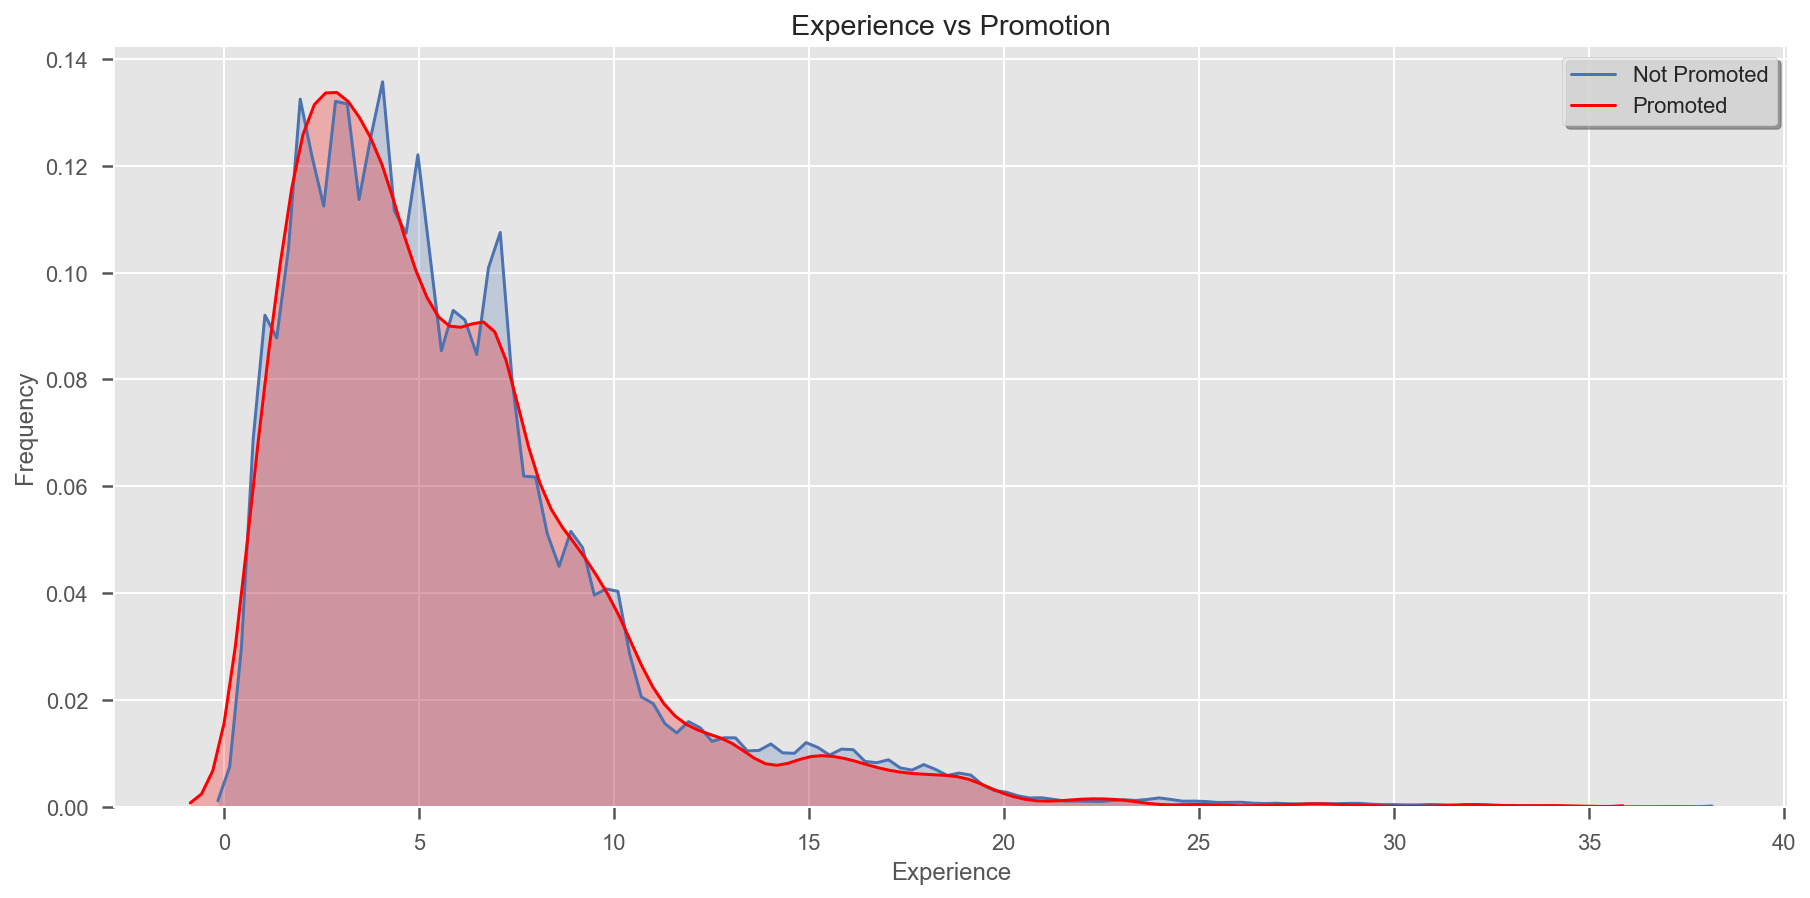

In [133]:
# Kernel Density Plot
resize()
ax = sns.kdeplot(df_train.loc[(df_train['promoted_or_not'] == 0), 'experience'], color='b', shade=True, label='Not Promoted')
ax = sns.kdeplot(df_train.loc[(df_train['promoted_or_not'] == 1), 'experience'], color='red', shade=True, label='Promoted')
plt.title('Experience vs Promotion')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()
                              

There ain't nothing special about this plot anyway or maybe I can't see it yet 

### Promotion by gender and age

Text(0.5, 0.98, 'promotion by gender and age')

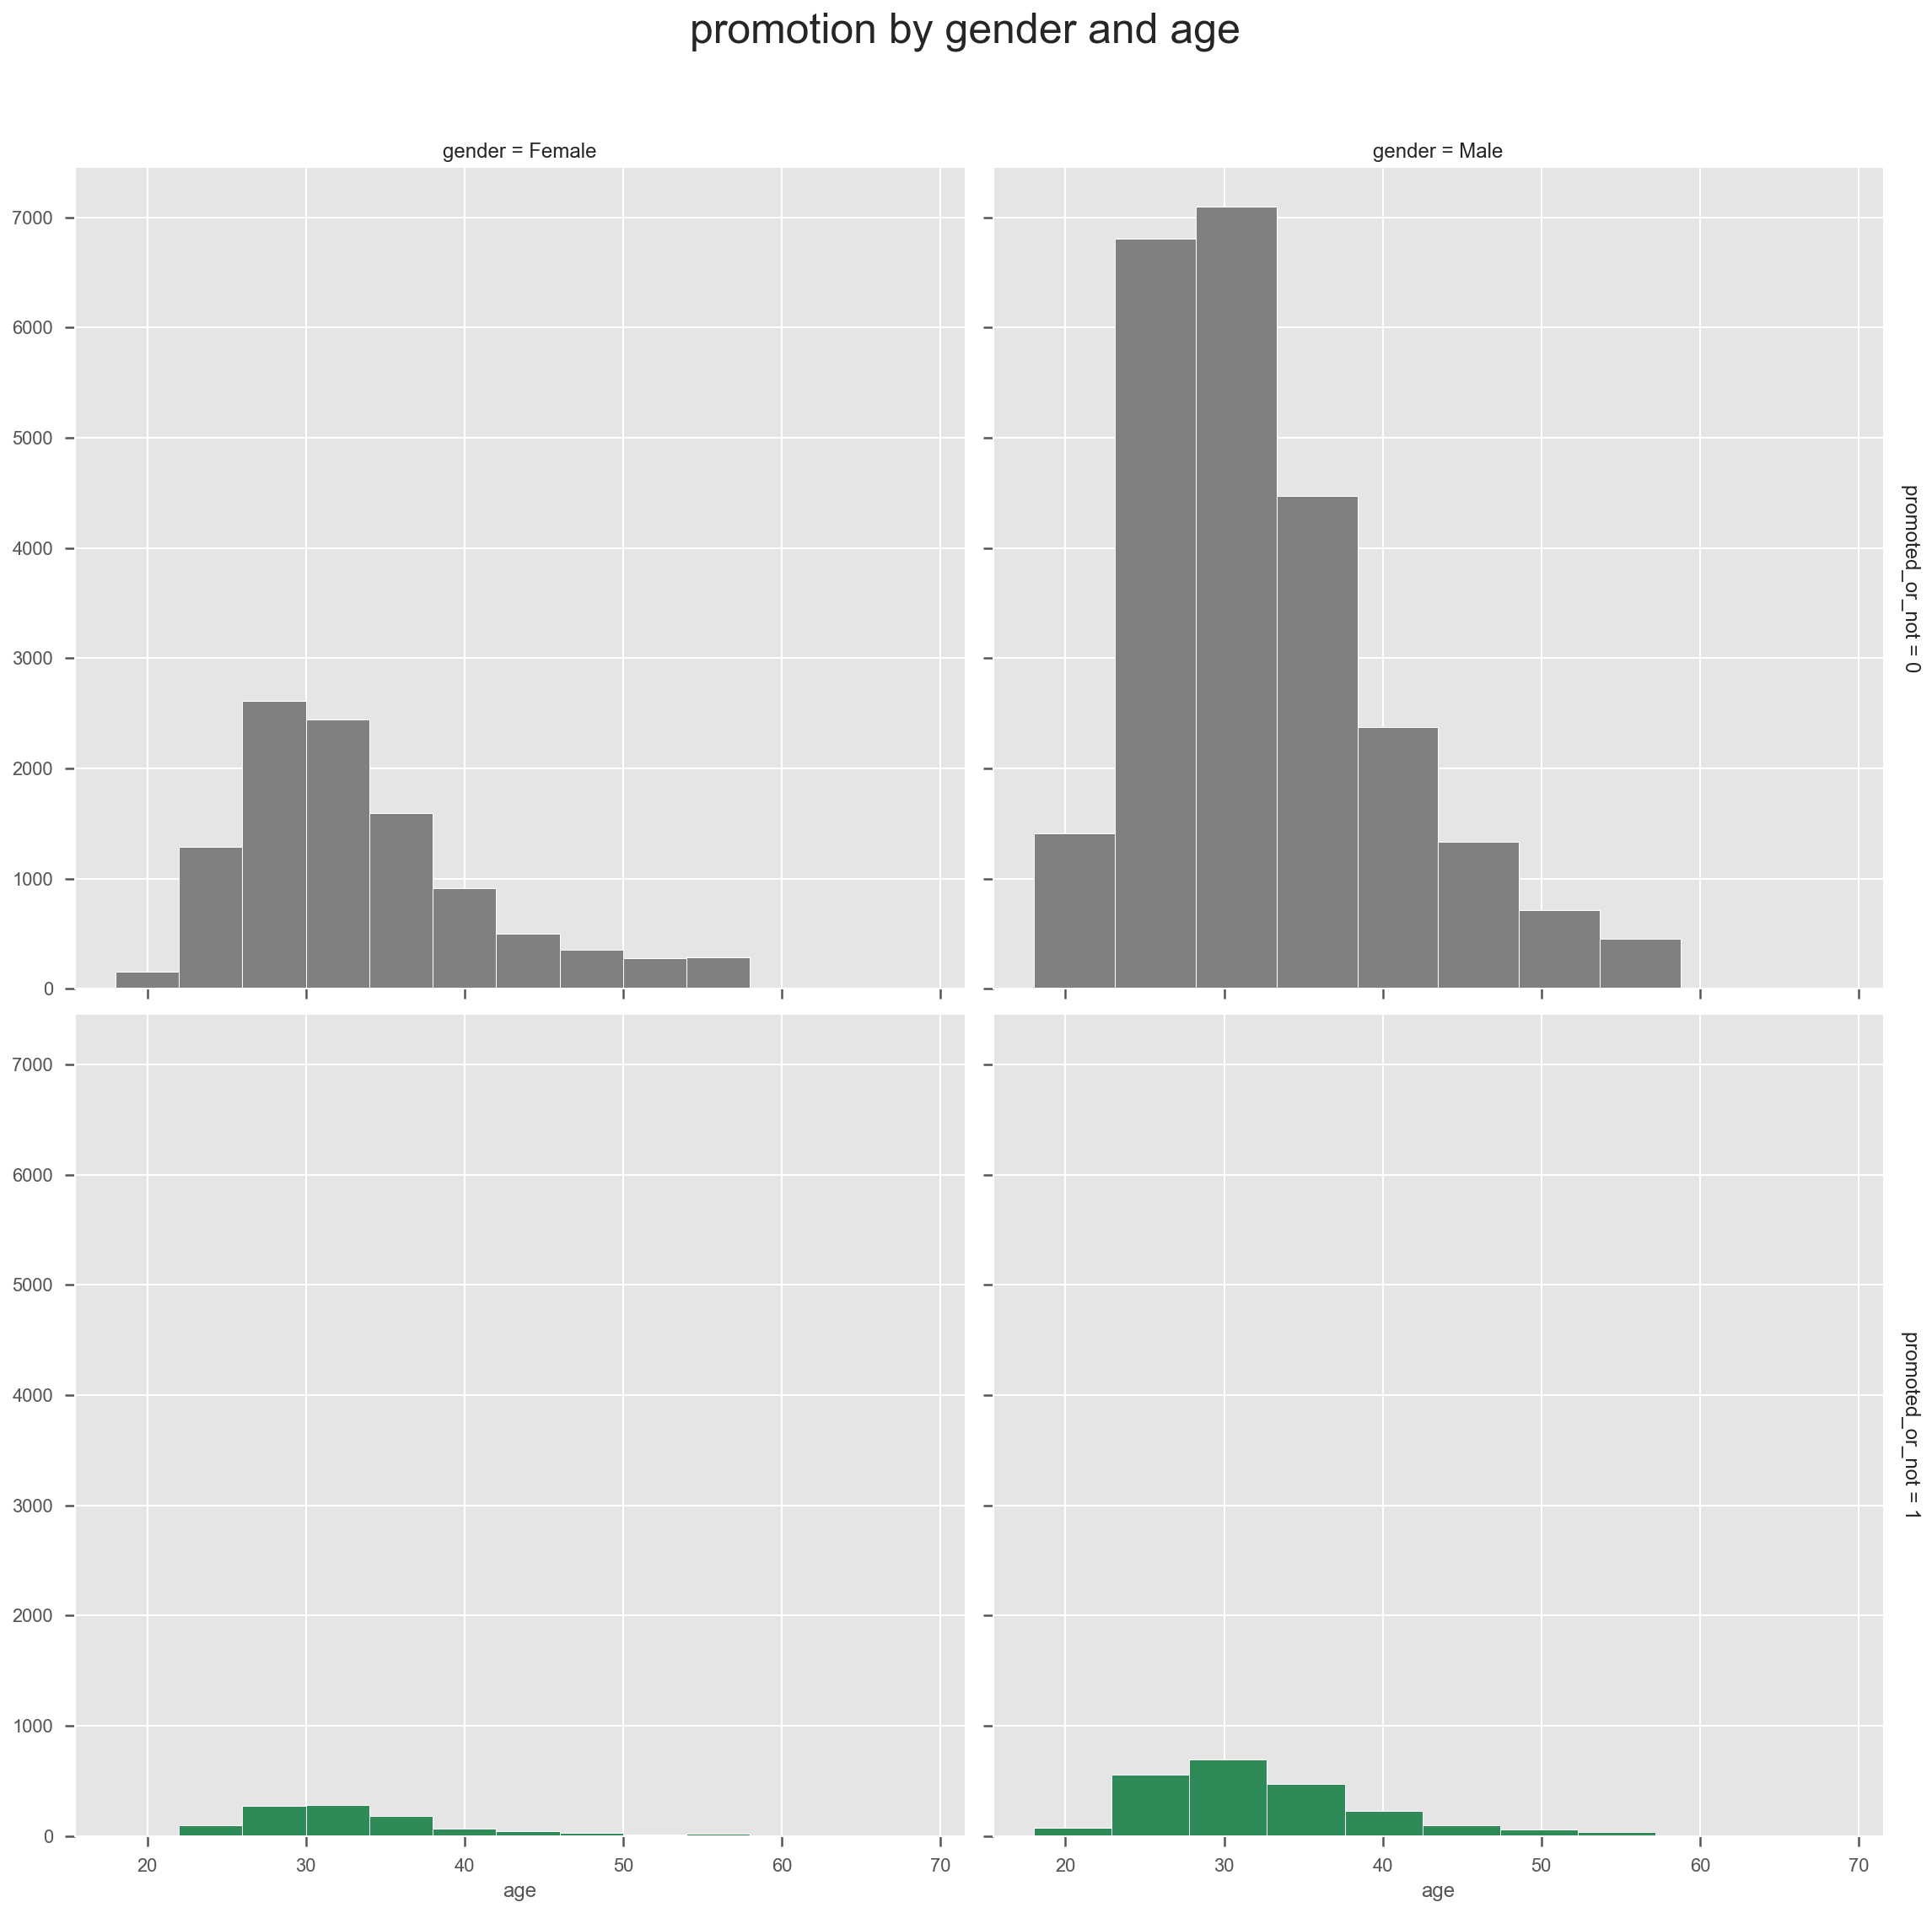

In [134]:
pal = {1:'seagreen', 0:'gray'}
g = sns.FacetGrid(df_train, size=8, col='gender', row='promoted_or_not', margin_titles=True, hue='promoted_or_not', palette=pal)
g = g.map(plt.hist, 'age', edgecolor='white');
g.fig.suptitle('promotion by gender and age', size=25)
plt.subplots_adjust(top=0.90)

Facetgrid is used to visualize multiple variable and their relationships.

> from our viz, we could see which age range get most of the promotion and lot more. 
> like seriously, most of the concentration are on people between the age `25-40`, check it out


Text(0.5, 0.98, 'promotion by gender and age')

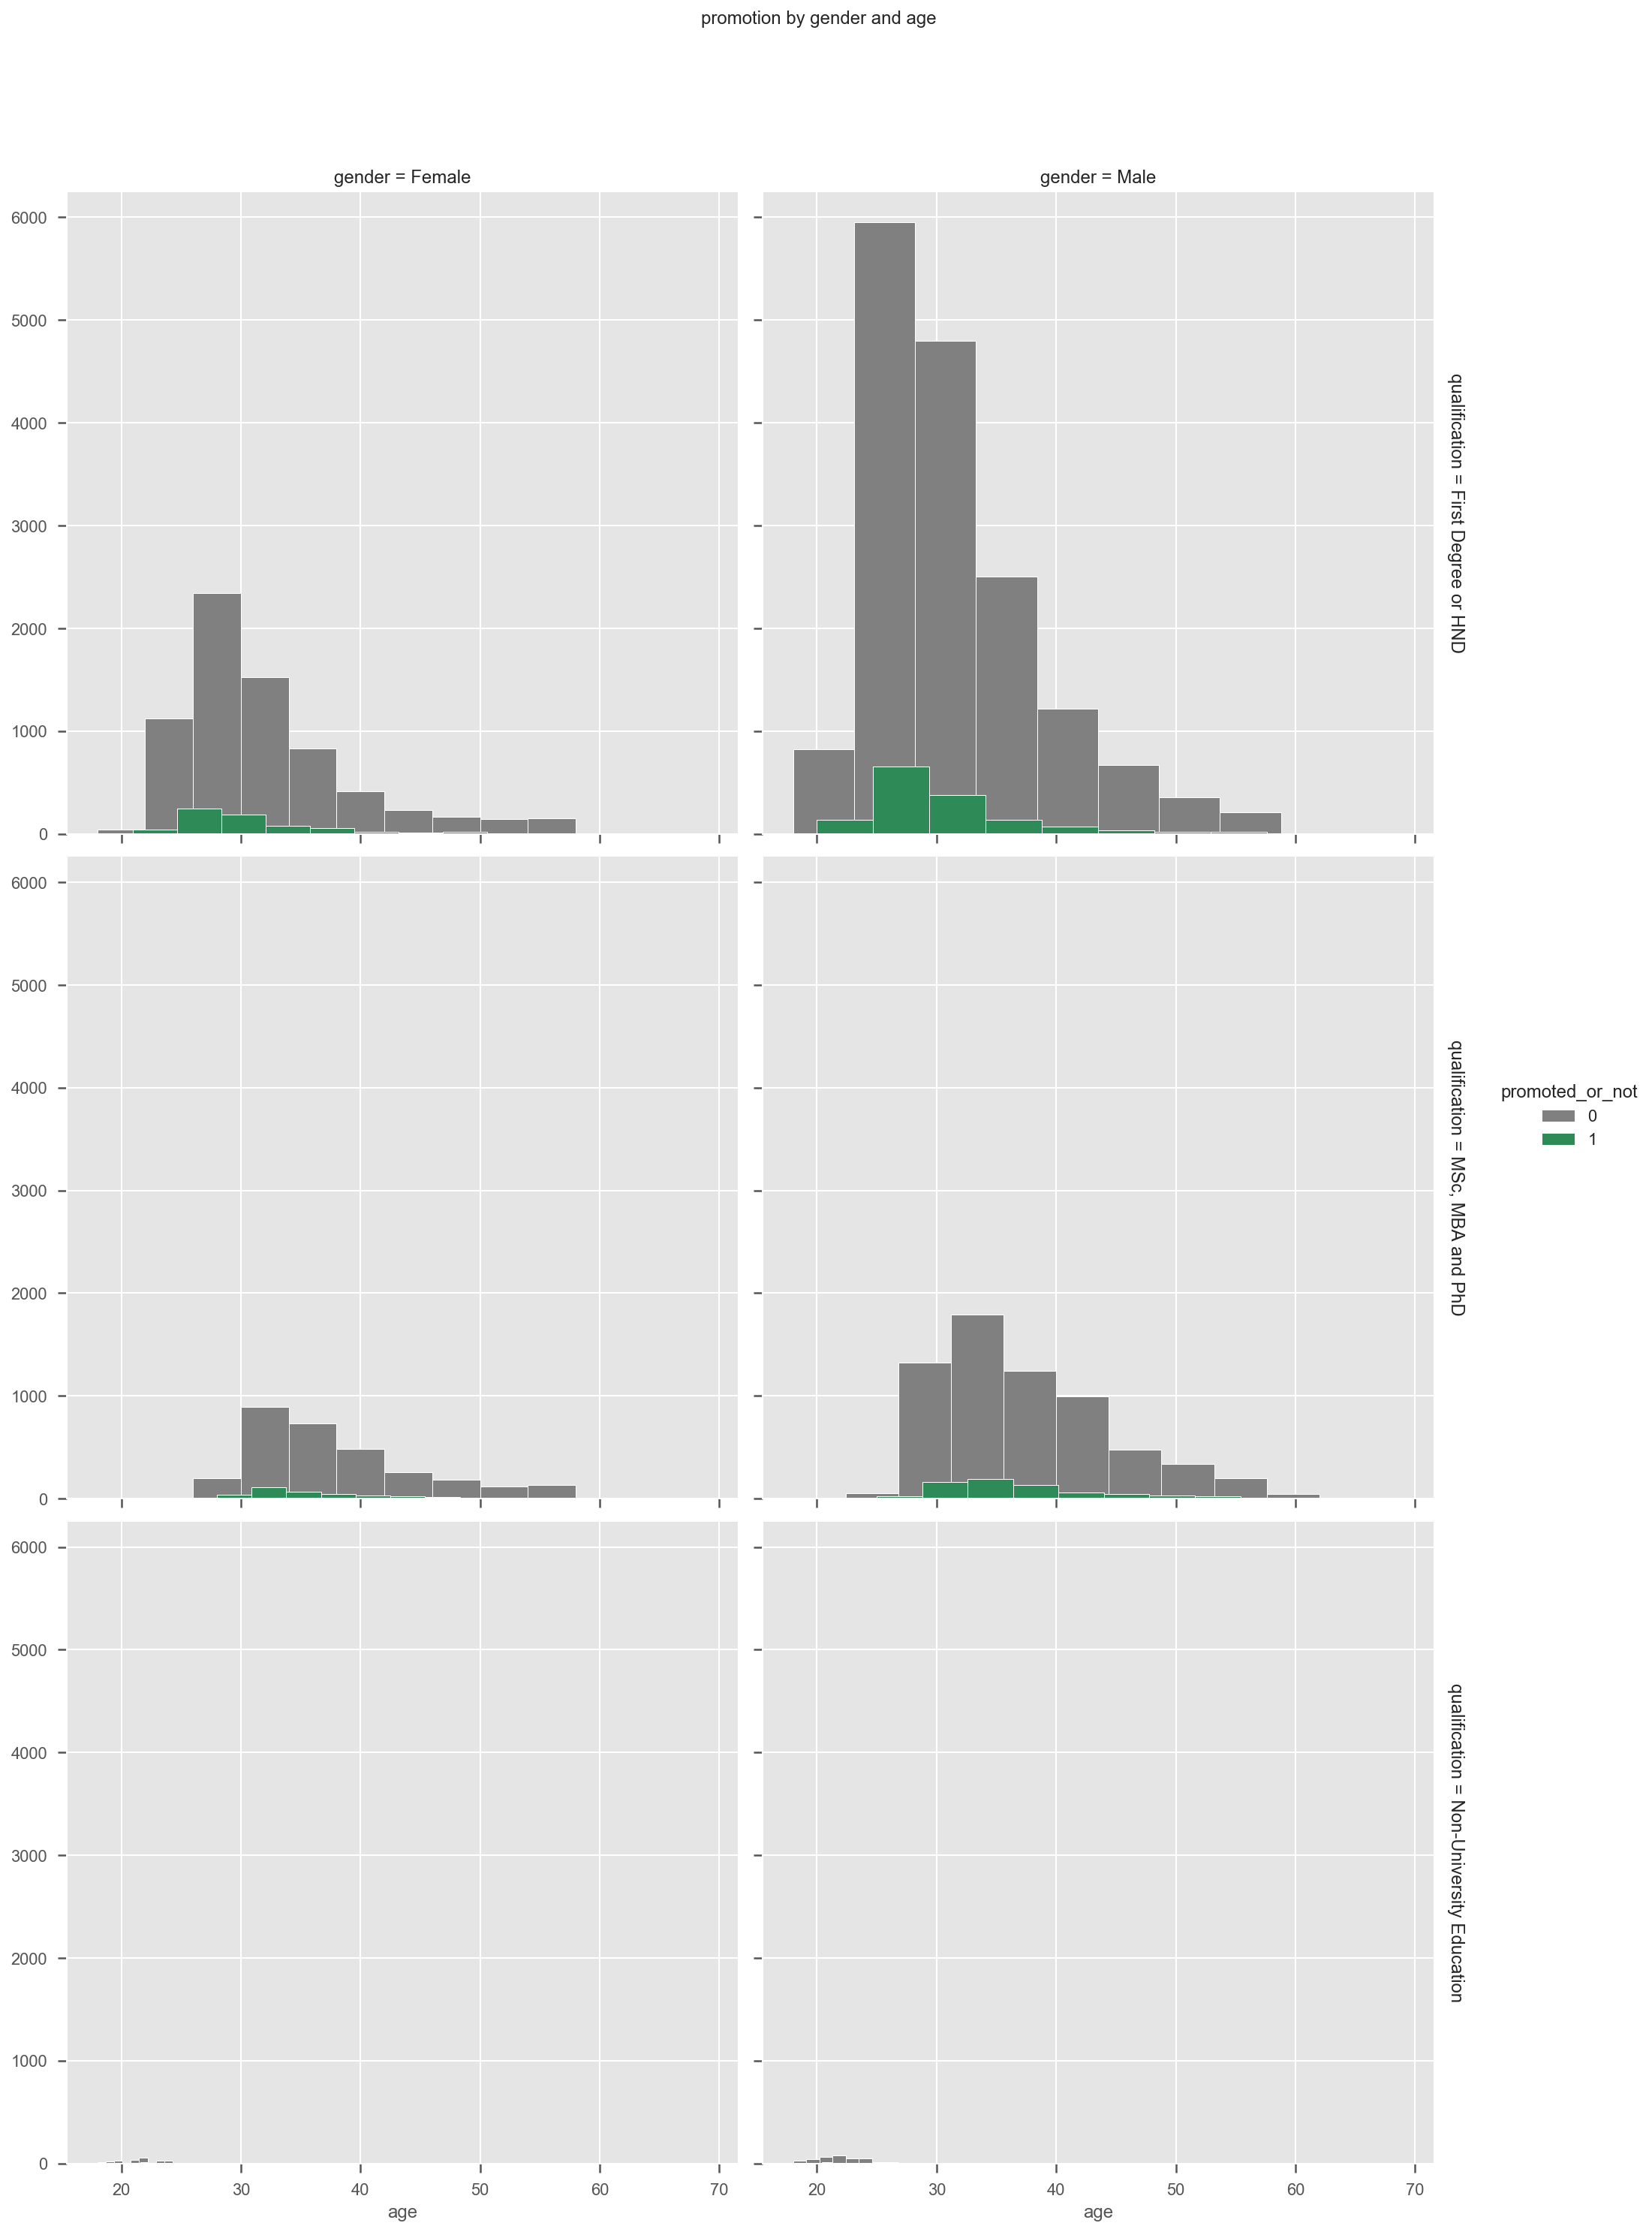

In [135]:
ax = sns.FacetGrid(df_train, size=7, col='gender', row='qualification', margin_titles=True, hue='promoted_or_not', palette=pal)
ax=  ax.map(plt.hist, 'age', edgecolor='white').add_legend();
ax.fig.suptitle('promotion by gender and age')
plt.subplots_adjust(top=0.90)

We have more men with `First Degree or Hnd` that are promoted as well the highest number of Non-promoted workers
***
It seems we've few number of `Non-University Education` workers to the extent they don't seems to have anyone promoted at all

In [85]:
df_train.head()

employeeno                               division        qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  ...  \
0                    12.5                 2011            1  ...   
1                    12.5                 2015            0  ...   
2                     7.5                 2012            0  ...   
3                     2.5                 2009            0  ...   
4                     7.5                 2012            0  ...   

   training_score_average  state_of_origin foreign_schooled marital_status  \
0                      41          ANAMBRA               No        Married   
1                      52          ANAMBRA              Yes        Married   
2                      42          KATSINA              Yes        Married   
3                      42            NIGER              Yes         Single   
4                      77        AKWA IBOM              Yes        Married   

  past_disciplinary_action previous_intradepartmental_movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  no_of_previous_employers promoted_or_not  age  experience  
0                        0               0   33           8  
1                        0               0   28           4  
2                        0               0   32           7  
3                        1               0   37          10  
4                        1               0   29           7  

[5 rows x 21 columns]

<Figure size 1080x504 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Division vs promotion or not')

Text(0.5, 0, 'Division')

Text(0, 0.5, '# of promotion or not')

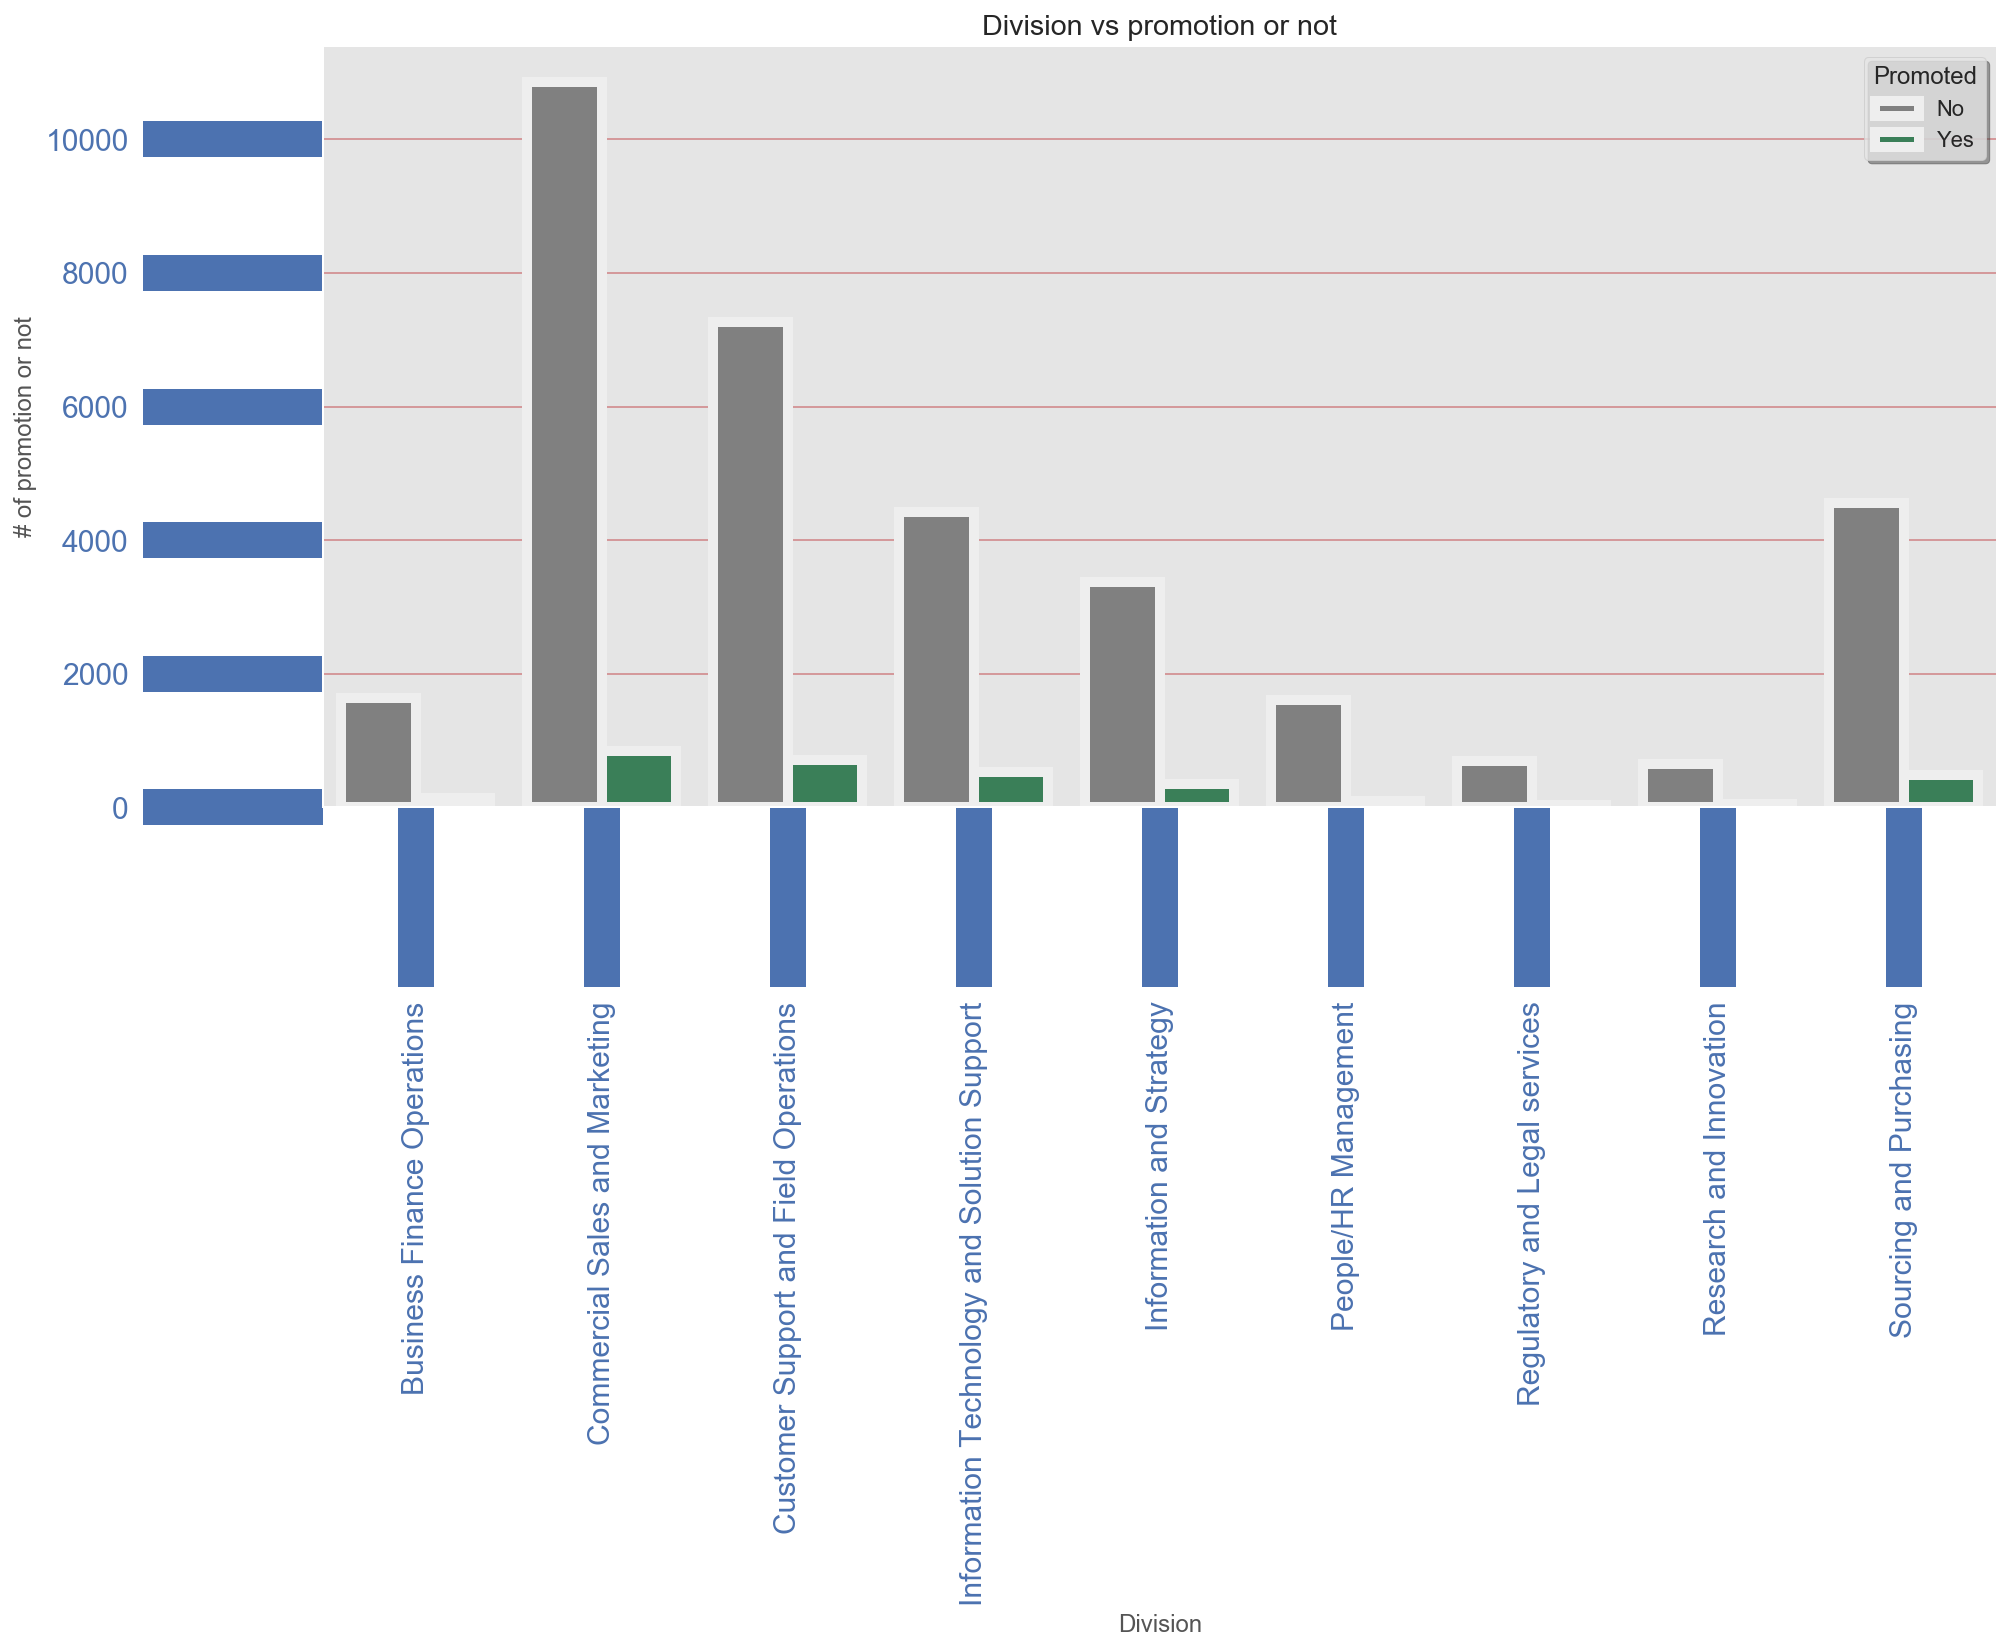

In [145]:
resize()
palette = {1:'seagreen', 0:'gray'}
# plt.subplot
ax = sns.countplot(data=df_train, x='division', hue='promoted_or_not', 
                  linewidth=5, palette=palette,
                  dodge=True)
ax.tick_params(direction='out', labelrotation=.1,
                   length=90, width=18, colors='b',
                   grid_color='r', grid_alpha=0.5, labelsize=15)
plt.xticks(rotation=90, );
plt.title('Division vs promotion or not')
plt.xlabel('Division')
plt.ylabel('# of promotion or not')

# Fixing legends
legends = ax.get_legend()
legends.set_title('Promoted')
legends = legends.texts
legends[0].set_text('No')
legends[1].set_text('Yes')
plt.show()


<Figure size 1440x1080 with 0 Axes>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9DD6E3C18>],
      dtype=object)

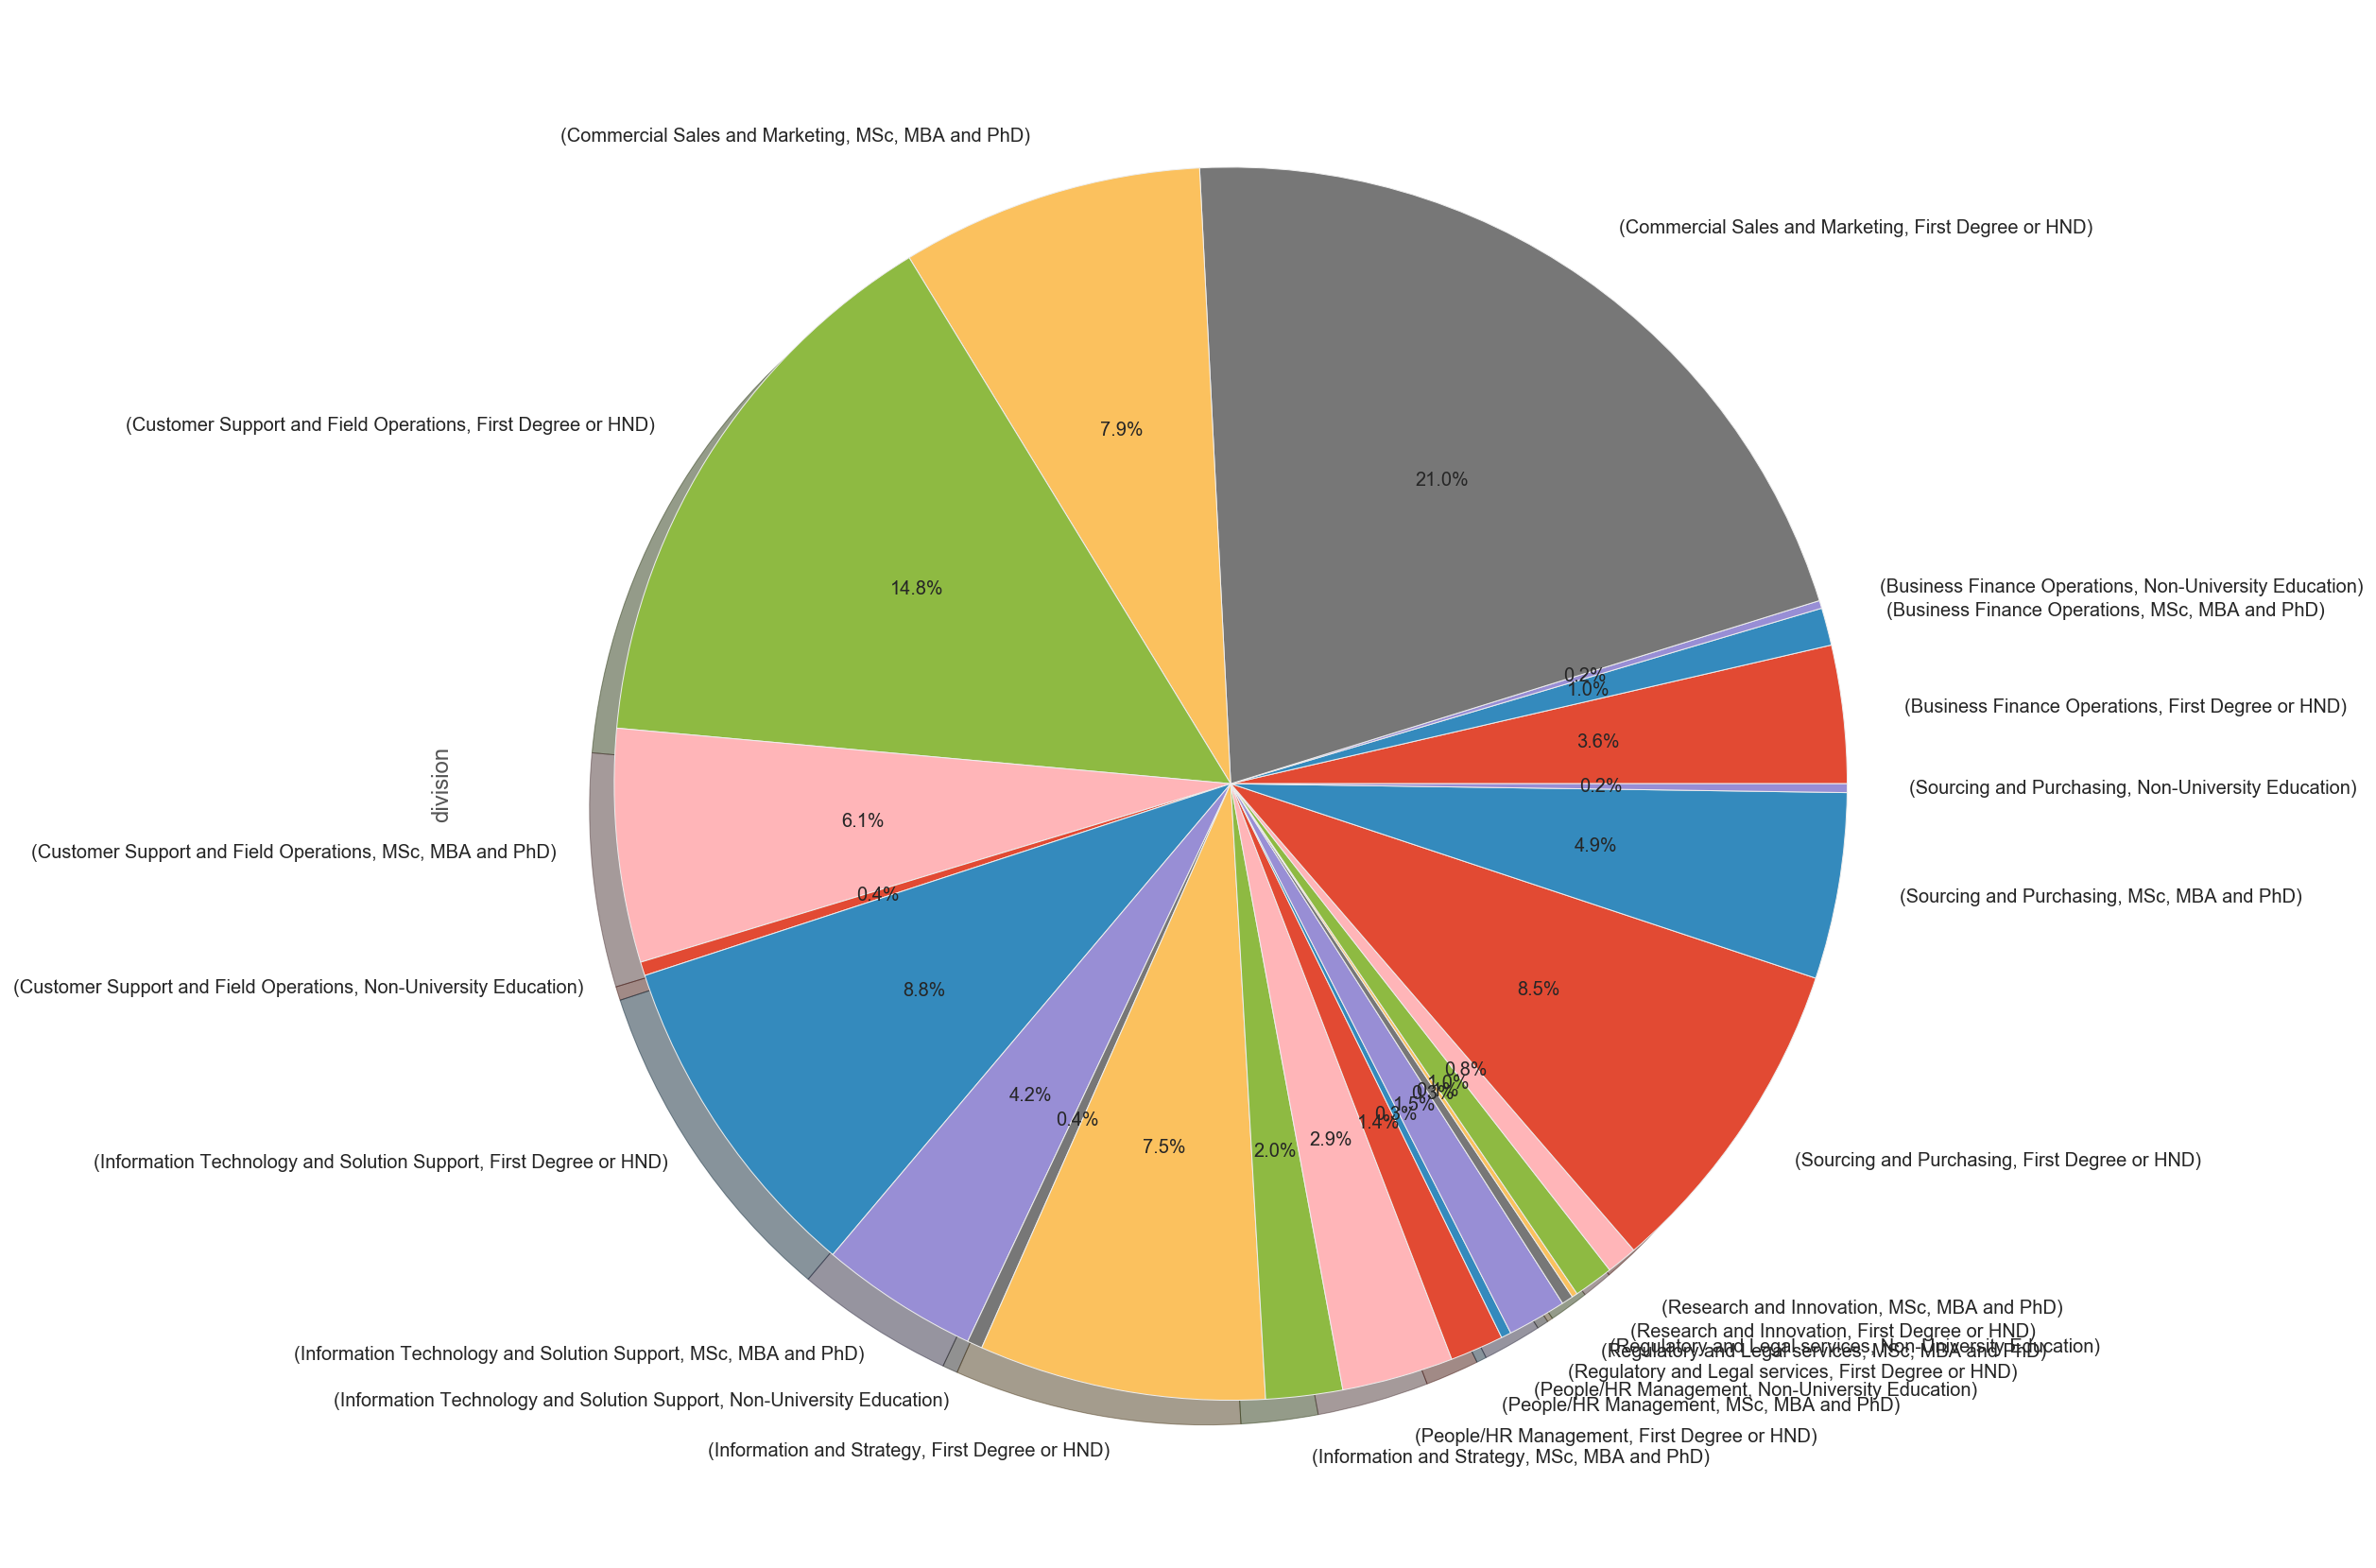

In [151]:
plt.figure(figsize=(20, 15))
df_train.groupby(['division', 'qualification'])['division'].count().plot.pie(fontsize=10, subplots=True, autopct='%1.1f%%', shadow=True)

according to our plot, there're divisions with little no promotion at all, probably maybe because they're too small to be considered. 
***
> I think division `Commercial Sales and Marketing` has the highest number of promoted workers as well as highest of unpromoted workers. We must have got a lot of workers in this division though.

This is a basic assumption...
> I think older people should fall among this division with little or no promoted members because those division tends to require professionals to manage, take for example the `Research and Innovation` division, it's really going to be filled with potential brilliant heads and you know experienced (older) people tends to dominate the field of research, I'm assumming anyway.
****
****
Let's see to that using `FacetGrid` plot

Text(0.5, 0.98, 'Division and Promotion')

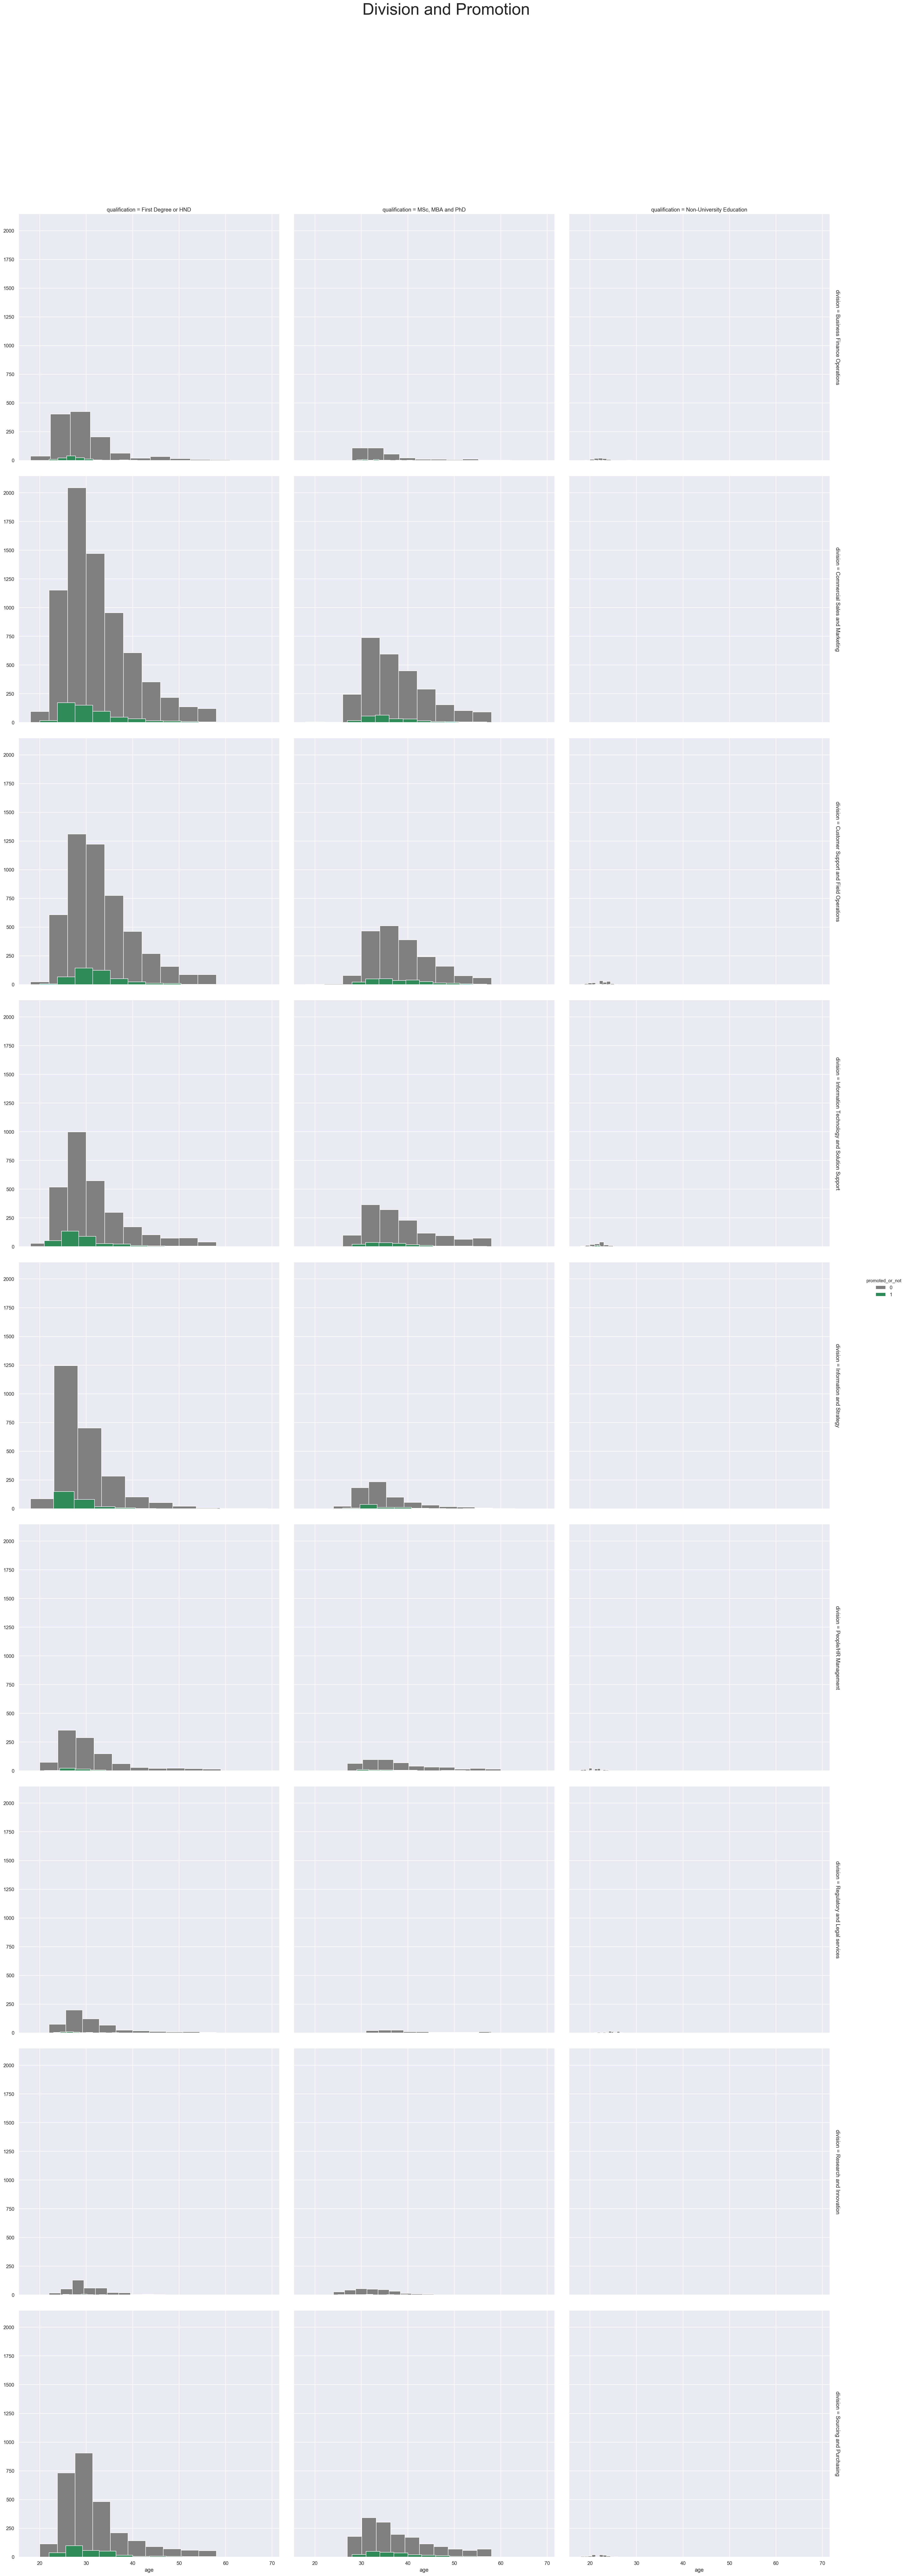

In [82]:
ax = sns.FacetGrid(data=df_train, size=9, row='division', col='qualification',
                   margin_titles=True, hue='promoted_or_not', palette=palette)
ax = ax.map(plt.hist, 'age', edgecolor='white').add_legend()

# plt.tick_params(direction='out', labelrotation=.1,
#                    length=10, width=18, colors='b',
#                    grid_color='r', grid_alpha=0.5)
# plt.yticks(rotation=-10)
# plt.xticks(rotation=-10)

ax.fig.suptitle('Division and Promotion')
plt.subplots_adjust(top=0.90)

In [31]:
df_train[(df_train['age'] == df_train['age'].max())]

employeeno                  division        qualification gender  \
1403  YAK/S/01937  Information and Strategy  First Degree or HND   Male   

     channel_of_recruitment  trainings_attended  year_of_birth  \
1403      Agency and others                   2           1950   

      last_performance_score  year_of_recruitment  targets_met  ...  \
1403                     7.5                 1991            0  ...   

      training_score_average  state_of_origin foreign_schooled marital_status  \
1403                      72             OGUN              Yes        Married   

     past_disciplinary_action previous_intradepartmental_movement  \
1403                       No                                  No   

     no_of_previous_employers promoted_or_not  age  experience  
1403                        0               0   69          28  

[1 rows x 21 columns]

Division and Qualification of people above 50 years old
***
##### _Let see to that with this plot_ ######

In [19]:
division_n_qaul = df_train.where(df_train['age'] > 50).dropna().groupby(['division', 'qualification'])['division'].count().sort_values()

In [20]:
division_n_qaul

division                                     qualification      
Regulatory and Legal services                First Degree or HND     12
Business Finance Operations                  MSc, MBA and PhD        17
Regulatory and Legal services                MSc, MBA and PhD        19
Business Finance Operations                  First Degree or HND     20
Information and Strategy                     First Degree or HND     24
                                             MSc, MBA and PhD        26
People/HR Management                         First Degree or HND     35
                                             MSc, MBA and PhD        50
Information Technology and Solution Support  First Degree or HND    103
Sourcing and Purchasing                      First Degree or HND    121
Customer Support and Field Operations        MSc, MBA and PhD       123
Information Technology and Solution Support  MSc, MBA and PhD       128
Customer Support and Field Operations        First Degree or HND    148

<Figure size 1080x504 with 0 Axes>

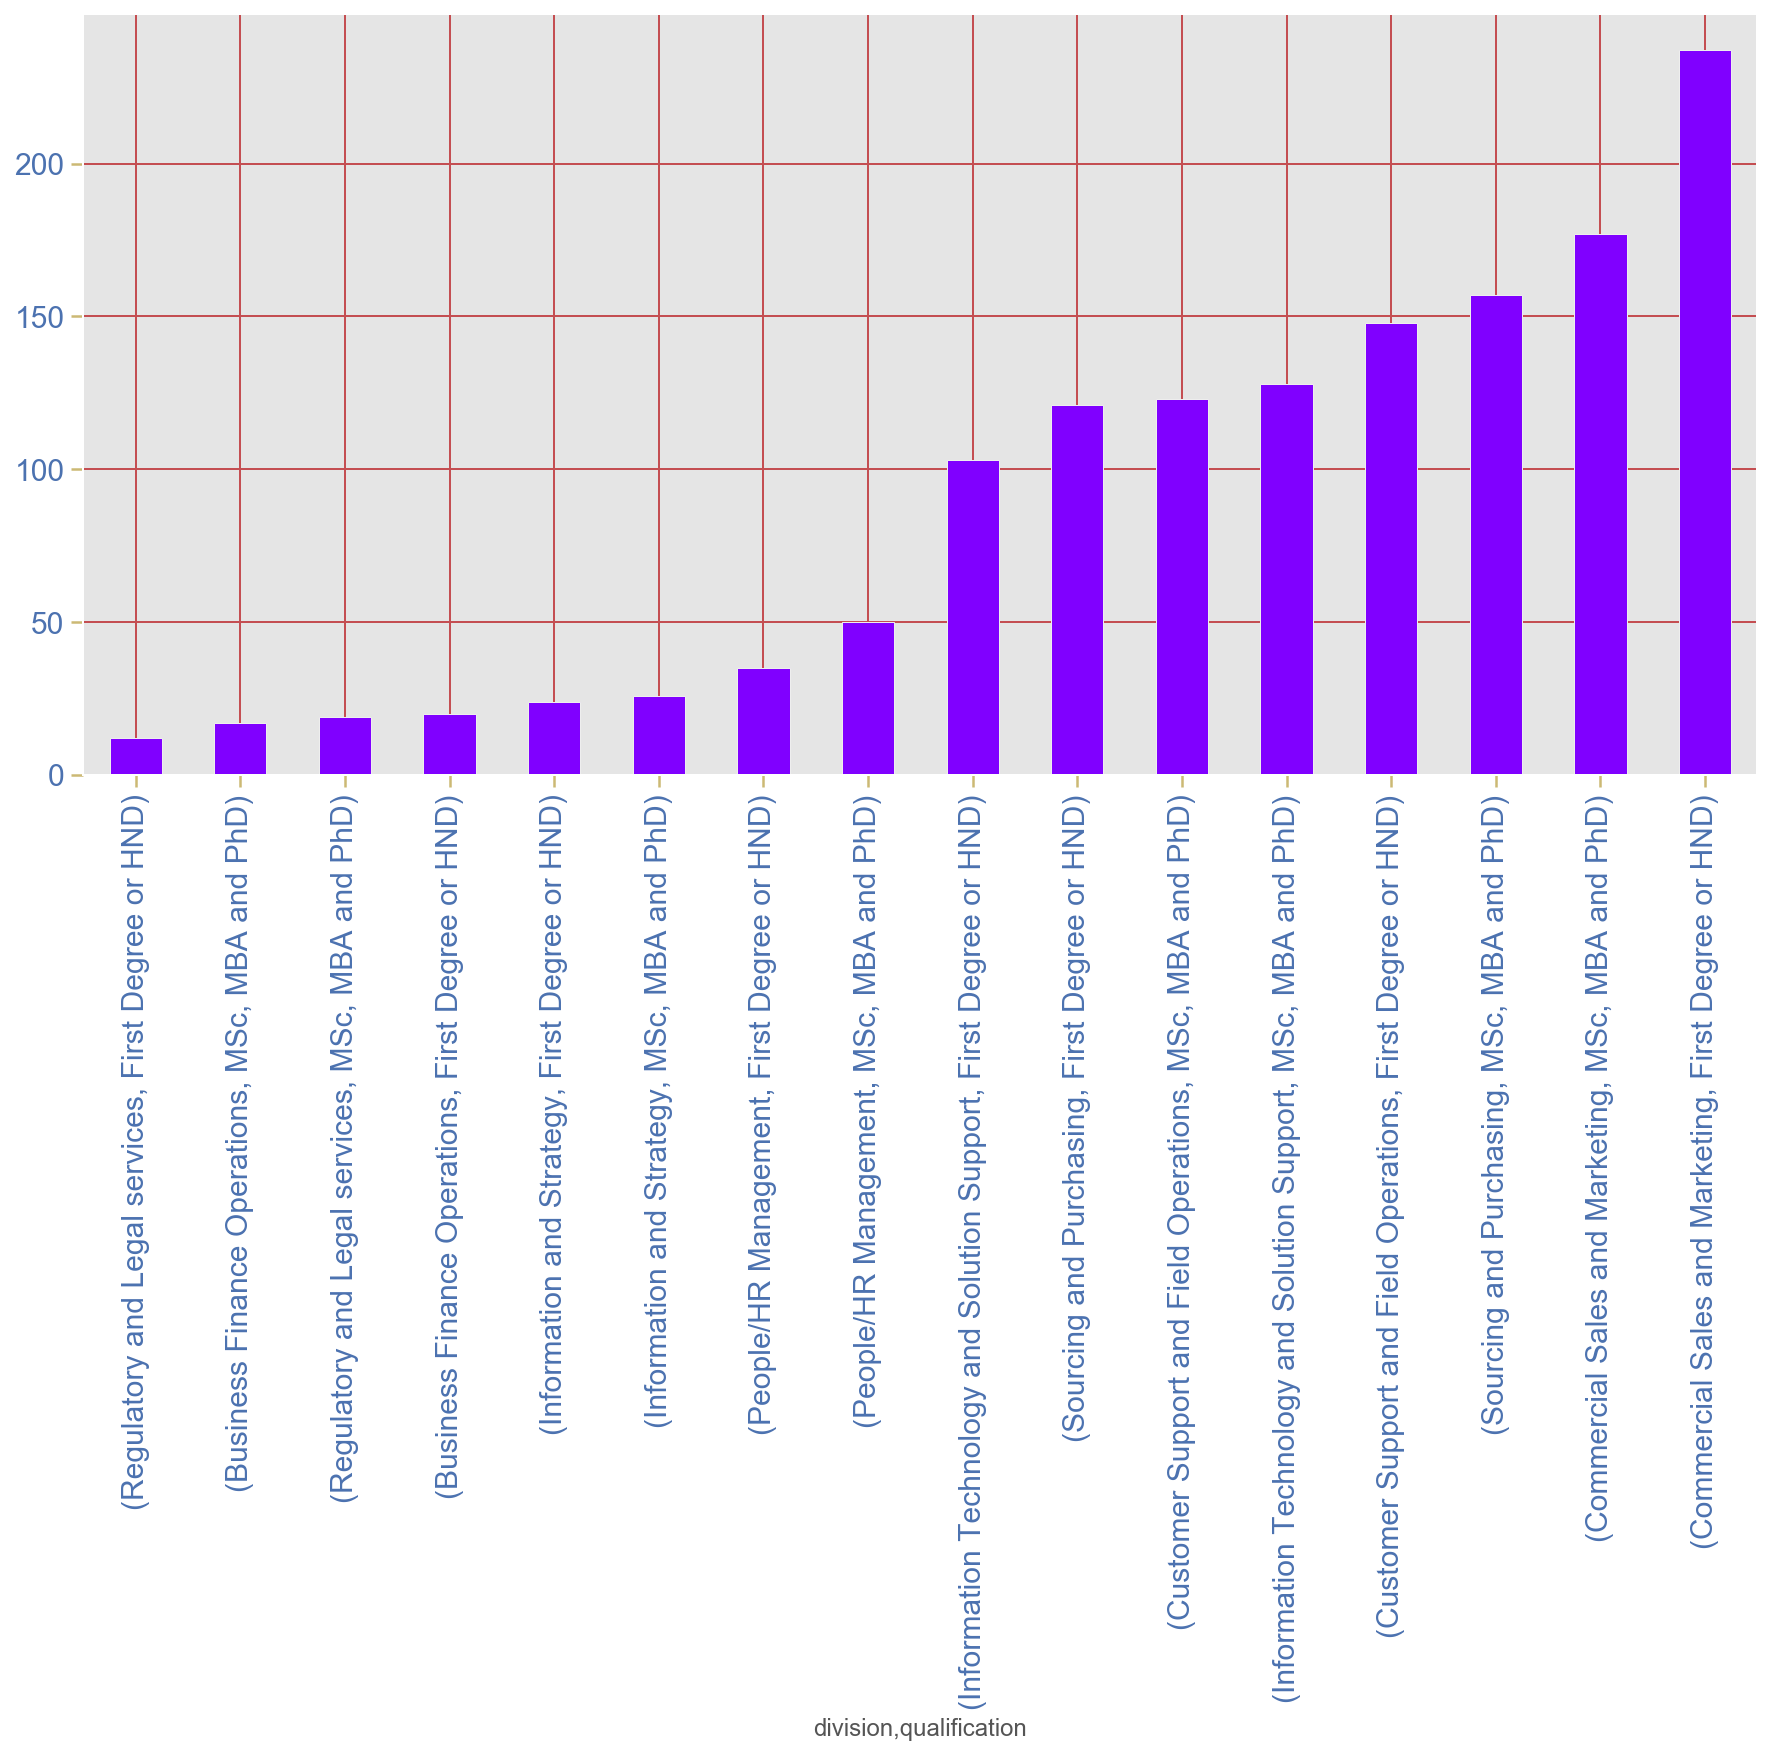

In [22]:
resize()
ax = plt.tick_params(color='y', grid_color='r', labelsize=15, labelcolor='b')
ax = division_n_qaul.plot.bar(colormap='rainbow', ax=ax)

<Figure size 1800x1296 with 0 Axes>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB50A8B550>],
      dtype=object)

Text(0.5, 1.0, "Division 'N Qualification of people\nAge > 50")

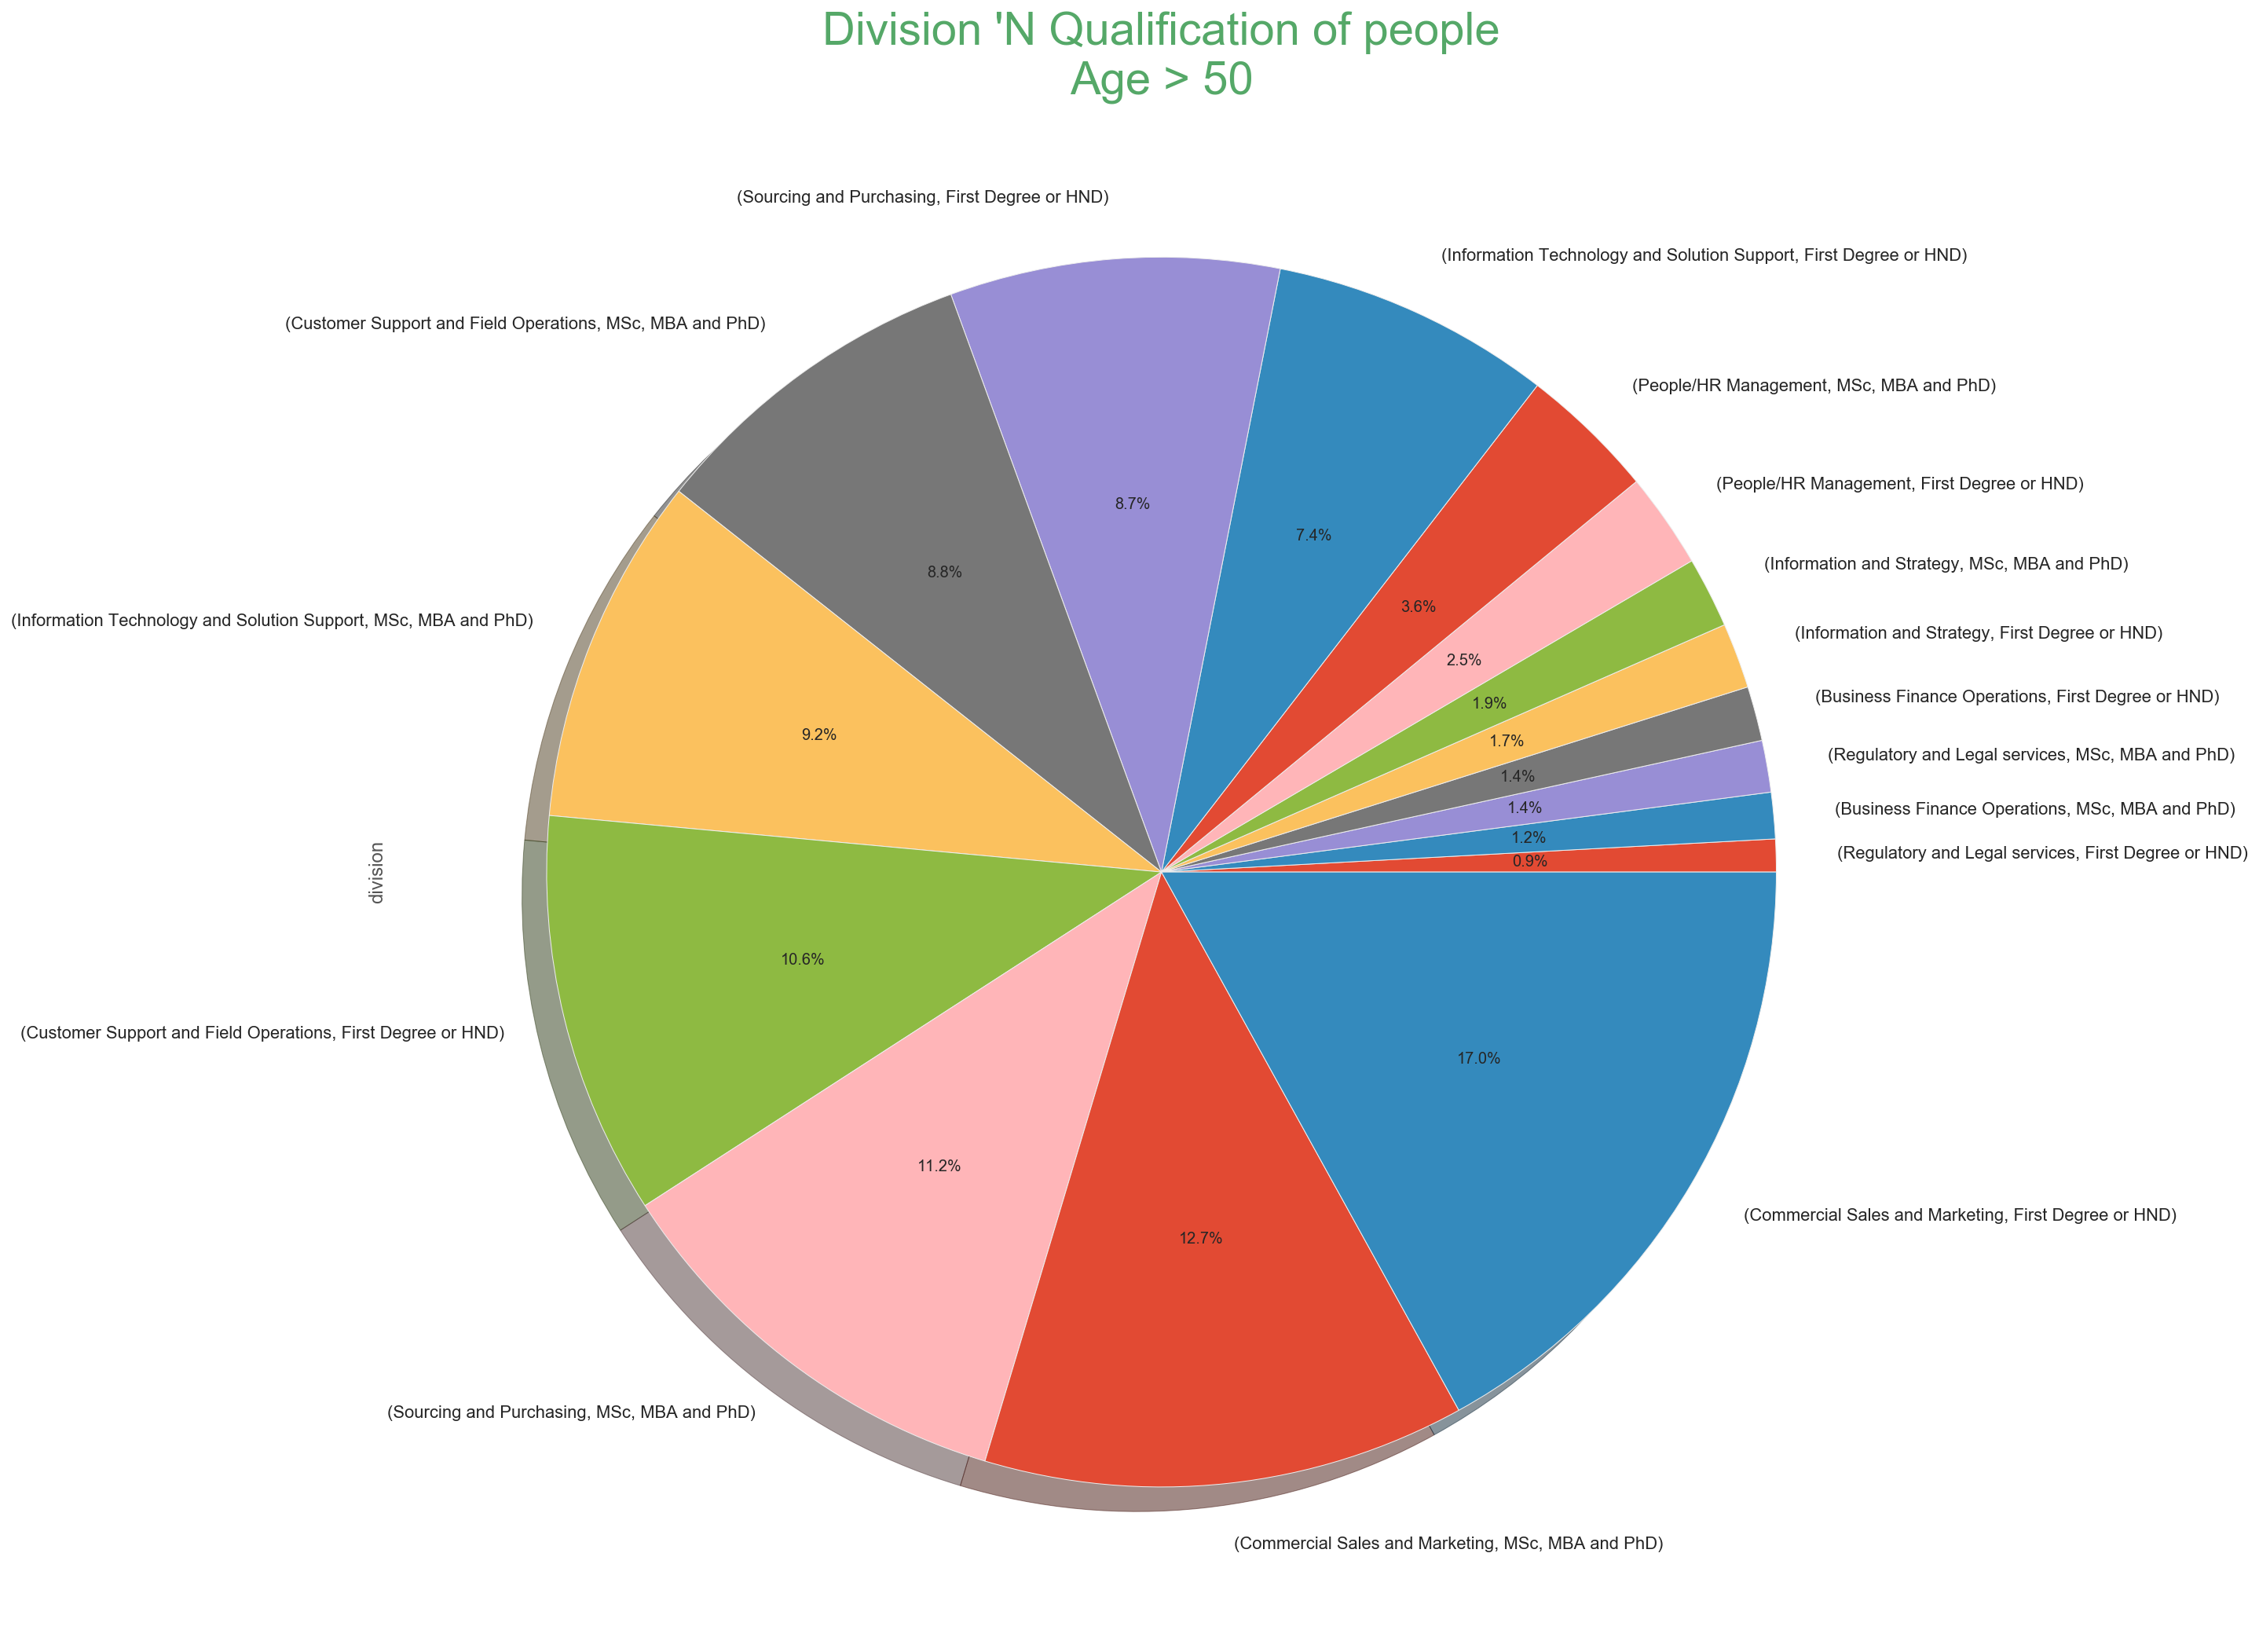

In [23]:
plt.figure(figsize=(25, 18))
division_n_qaul.plot.pie(subplots=True, autopct='%1.1f%%', shadow=True)
plt.title("Division 'N Qualification of people\nAge > 50", color='g', fontsize=29)

Everything here are visualization of most of the things we've said above.    

## Feature Engineering:

Like the name suggest, we're about to add new features,  we should drop some multi-collinear variables i.e (experience and age are correlated) but we won't and we'll do some bucketizing techniques as well


**Note**:
we'll be applying thesame to the **Test data** later on

## Age category

In [23]:
df_train.age.unique()

array([33, 28, 32, 37, 29, 31, 26, 30, 47, 35, 39, 25, 27, 24, 22, 38, 40,
       21, 48, 23, 36, 45, 18, 44, 42, 62, 34, 41, 20, 43, 55, 46, 56, 51,
       53, 49, 50, 54, 58, 57, 52, 69, 19, 61, 67, 64, 63, 60, 59],
      dtype=int64)

lets do some feature engineering

# A helper Fuction

In [24]:
def age_cat(age):
    if age <= 20:
        return 'teen'
    if age <= 25:
        return 'youth'
    if age <= 45:
        return 'mid_age'
    else:
        return 'old'


In [25]:
df_train['age_cat'] = df_train.age.map(age_cat)

In [26]:
df_train.age_cat.value_counts()

mid_age    29793
youth       5212
old         3003
teen         304
Name: age_cat, dtype: int64

## Performance
categorize performance levels

In [27]:
df_train.last_performance_score.unique()

array([12.5,  7.5,  2.5, 10. ,  0. ,  5. ])

# A helper Function

In [28]:
def performance_level(dpoint):
    if dpoint <= 2:
        return 'very_poor'
    if dpoint <= 4:
        return 'poor'
    if dpoint <= 6.5:
        return 'average'
    if dpoint <= 10:
        return 'good'
    else:
        return 'excellent'

In [29]:
df_train['performance_level'] = df_train.last_performance_score.map(performance_level)

In [30]:
df_train.performance_level.unique()
df_train.performance_level.value_counts()

array(['excellent', 'good', 'poor', 'very_poor', 'average'], dtype=object)

good         19925
excellent     8213
poor          4325
average       2944
very_poor     2905
Name: performance_level, dtype: int64

## transform colums and variable to lower-case and replace " " with _
***
Let's do some transformation to our variables. we're aiming to make them _safe_ to work with
by applying what we described above

In [32]:
df_train.head()

employeeno                               division        qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  ...  \
0                    12.5                 2011            1  ...   
1                    12.5                 2015            0  ...   
2                     7.5                 2012            0  ...   
3                     2.5                 2009            0  ...   
4                     7.5                 2012            0  ...   

   foreign_schooled  marital_status past_disciplinary_action  \
0                No         Married                       No   
1               Yes         Married                       No   
2               Yes         Married                       No   
3               Yes          Single                       No   
4               Yes         Married                       No   

  previous_intradepartmental_movement no_of_previous_employers  \
0                                  No                        0   
1                                  No                        0   
2                                  No                        0   
3                                  No                        1   
4                                  No                        1   

  promoted_or_not age experience  age_cat  performance_level  
0               0  33          8  mid_age          excellent  
1               0  28          4  mid_age          excellent  
2               0  32          7  mid_age               good  
3               0  37         10  mid_age               poor  
4               0  29          7  mid_age               good  

[5 rows x 23 columns]

# A helper Function

In [31]:
def upa_to_lowa_sp_to_unds(dpoint):
    if not isinstance(dpoint, str):
        # must be a string
        raise TypeError(f'dtype must be "str" not "{type(dpoint).__name__}"')
    else:
        return '_'.join(dpoint.lower().split())

In [32]:
# needed columns
needed_col1 = ['division', 'qualification', 'gender', 'channel_of_recruitment', 'foreign_schooled',
'marital_status', 'past_disciplinary_action', 'previous_intradepartmental_movement']

In [33]:
# df_train[needed_col1] = df_train[needed_col1].map(upa_to_lowa_sp_to_unds)
for col in needed_col1:
    df_train[col] = df_train[col].map(upa_to_lowa_sp_to_unds)

## Marital Status and Age categories

In [36]:
df_train.head()

employeeno                               division        qualification  \
0  YAK/S/00001         commercial_sales_and_marketing     msc,_mba_and_phd   
1  YAK/S/00002  customer_support_and_field_operations  first_degree_or_hnd   
2  YAK/S/00003         commercial_sales_and_marketing  first_degree_or_hnd   
3  YAK/S/00004         commercial_sales_and_marketing  first_degree_or_hnd   
4  YAK/S/00006               information_and_strategy  first_degree_or_hnd   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0  female  direct_internal_process                   2           1986   
1    male        agency_and_others                   2           1991   
2    male  direct_internal_process                   2           1987   
3    male        agency_and_others                   3           1982   
4    male  direct_internal_process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  ...  \
0                    12.5                 2011            1  ...   
1                    12.5                 2015            0  ...   
2                     7.5                 2012            0  ...   
3                     2.5                 2009            0  ...   
4                     7.5                 2012            0  ...   

   foreign_schooled  marital_status past_disciplinary_action  \
0                no         married                       no   
1               yes         married                       no   
2               yes         married                       no   
3               yes          single                       no   
4               yes         married                       no   

  previous_intradepartmental_movement no_of_previous_employers  \
0                                  no                        0   
1                                  no                        0   
2                                  no                        0   
3                                  no                        1   
4                                  no                        1   

  promoted_or_not age experience  age_cat  performance_level  
0               0  33          8  mid_age          excellent  
1               0  28          4  mid_age          excellent  
2               0  32          7  mid_age               good  
3               0  37         10  mid_age               poor  
4               0  29          7  mid_age               good  

[5 rows x 23 columns]

In [24]:
marital_nd_age_cat = df_train.groupby(['age_cat', 'marital_status'])['marital_status'].count().sort_values()

In [25]:
marital_nd_age_cat

age_cat  marital_status
teen     not_sure              5
old      not_sure             25
youth    not_sure             53
teen     single               61
         married             238
mid_age  not_sure            280
old      single              575
youth    single              985
old      married            2403
youth    married            4174
mid_age  single             5306
         married           24207
Name: marital_status, dtype: int64

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Marital status and Age category')

Text(0.5, 0, 'age_category, marital_status')

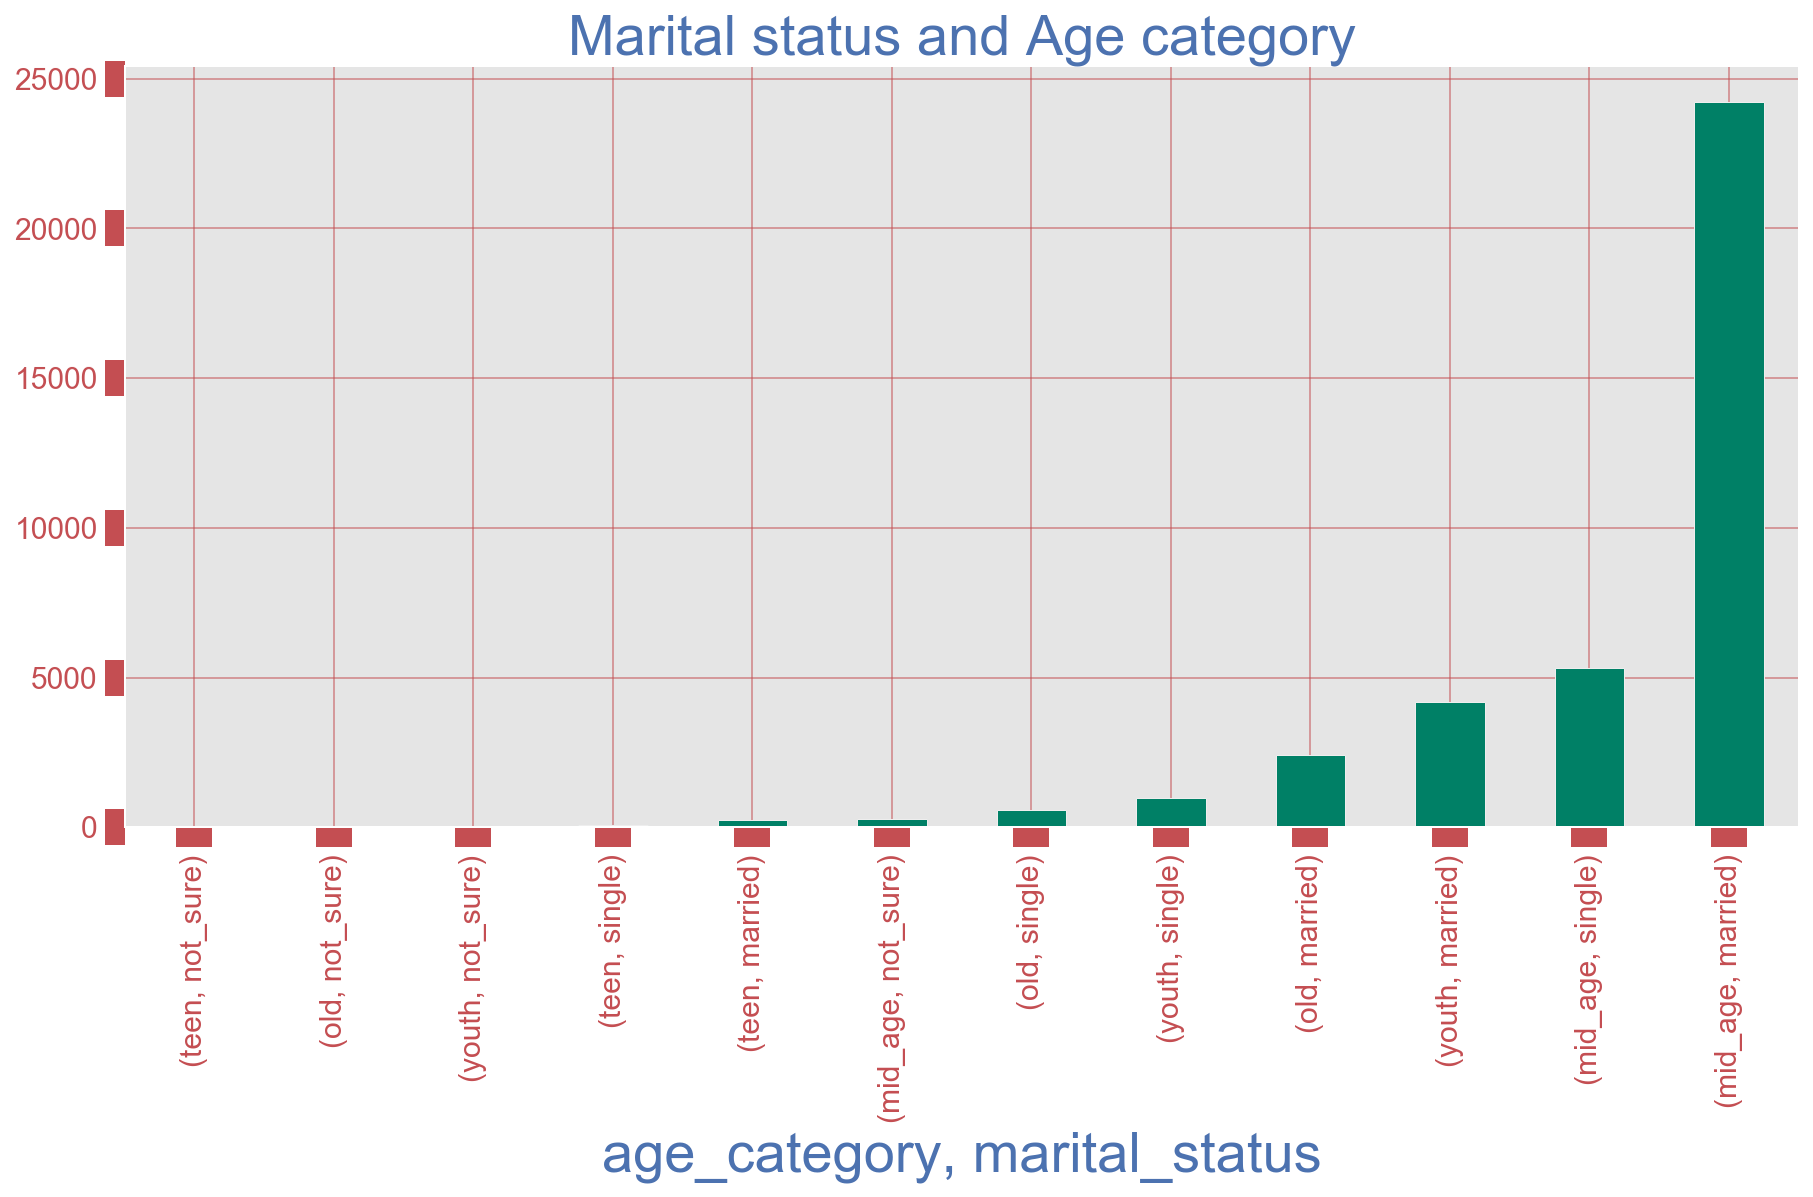

In [40]:
resize()
ax = plt.tick_params(direction='out', labelrotation=.1,
                   length=10, width=18, colors='r',
                   grid_color='r', grid_alpha=0.5, labelsize=15)
marital_nd_age_cat.plot.bar(colormap='summer', ax=ax, title='Marital status and Age cat.')
plt.title('Marital status and Age category', fontsize=28, color='b')
plt.xlabel('age_category, marital_status', fontsize=28, color='b')

we have more middle aged that are married in our observation, the **old-single** might be due to lost of their partner or something related one way or the other. we have more `youth` that are married compare to `older` ones and there seems to be some `teens` that are married. Like I said before definetly something seems wrong somehow.

Well, we won't be digging into that in this notebook.

## Performance and Promotion

In [41]:
perf_leve_nd_promotion = df_train.groupby(['performance_level', 'promoted_or_not'])['promoted_or_not'].count().sort_values()

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Performance and Promotion')

Text(0.5, 0, 'performance_level, promoted_or_not')

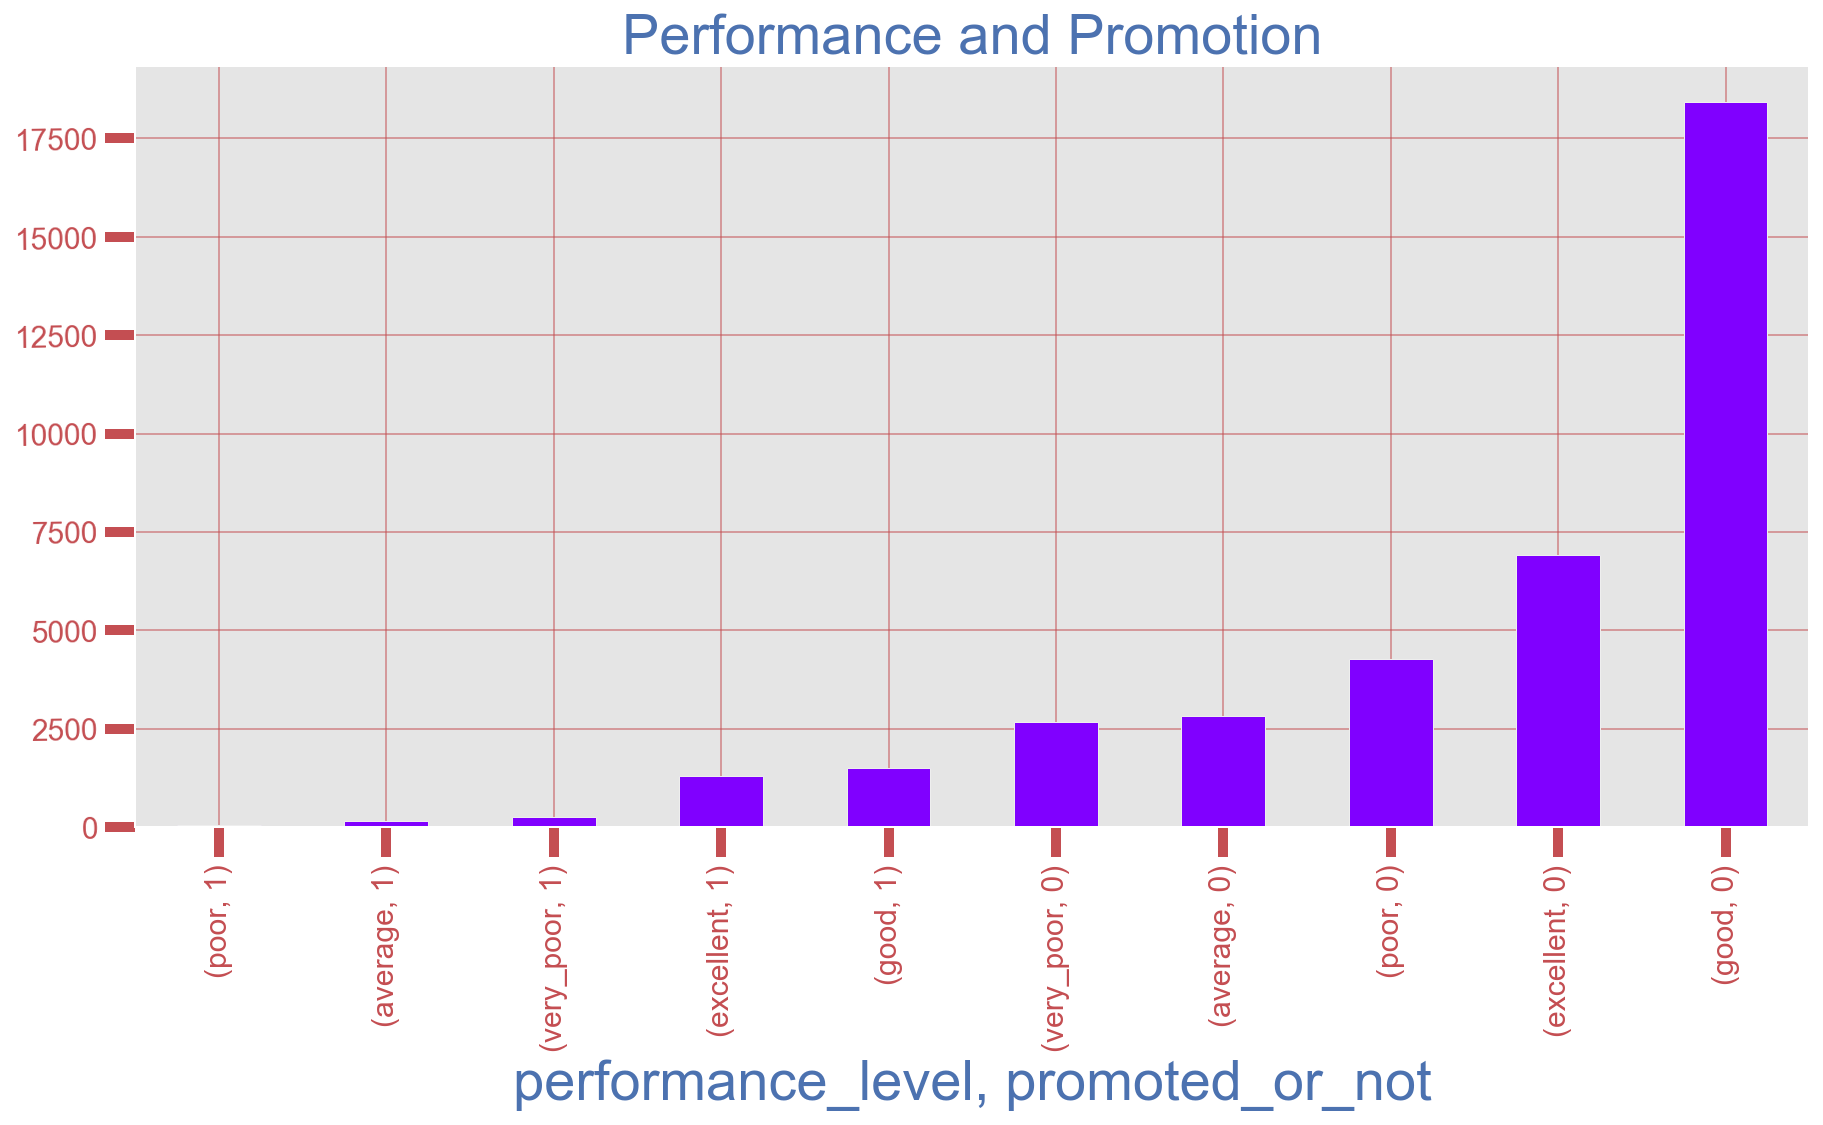

In [51]:
resize()
ax = plt.tick_params(direction='out', labelrotation=.9,
                   length=15, width=5, colors='r',
                   grid_color='r', grid_alpha=0.5, labelsize=15)
perf_leve_nd_promotion.plot.bar(colormap='rainbow', ax=ax)
plt.title('Performance and Promotion', fontsize=28, color='b')
plt.xlabel('performance_level, promoted_or_not', fontsize=28, color='b')

In [44]:
perf_leve_nd_promotion

performance_level  promoted_or_not
poor               1                     59
average            1                    138
very_poor          1                    246
excellent          1                   1299
good               1                   1499
very_poor          0                   2659
average            0                   2806
poor               0                   4266
excellent          0                   6914
good               0                  18426
Name: promoted_or_not, dtype: int64

***
group of `Last performance scores` between **6.5** and **10** a.k.a `good`_performance_ have highest number of Non-promoted workers. 

<center><b><font color=blue><i>((((()))))_ _((((()))))_ _((((()))))_ _((((()))))_ _((((()))))_ _((((()))))_ _((((()))))</i></font></center>

we  can say, promotion giving is roughly or bit dependent of performance, take a calm look at the plot. saying that is more of optimistic guess; so for a valid answer we'd setup an **_hypothesis_**.
*** 
> `good performance`:
* has the highest number of unpromoted workers, total of **18426**
* has the number of promoted workers, total of **1499**
* Total Workers in this group =  **19925**

> `excellent performance`:
* has total of **6914** unpromoted workers
* has total of **1299** promoted workers
* Total Workers in this group = **8213**

> `average performance`:
* has total of **2806** unpromoted workers
* has total of **138** promoted workers
* Total Workers in this group = **2944**

> `poor performance`:
* has total of **4266** unpromoted workers
* has total of **59** promoted workers
* Total Workers in this group = **4325**

> `very poor performance`:
* has total of **2659** unpromoted workers
* has total of **246** promoted workers
* Total Workers in this group = **2905**

## Correlation between variables
###### _Pearson Correlation_

#### _Uni-variate correlation_

In [45]:
uni_correlation = pd.DataFrame(df_train.corr()['promoted_or_not'].sort_values(ascending=False))
uni_correlation

promoted_or_not
promoted_or_not                1.000000
targets_met                    0.224518
previous_award                 0.201434
training_score_average         0.178448
last_performance_score         0.119690
year_of_birth                  0.017991
year_of_recruitment            0.012287
experience                    -0.012287
age                           -0.017991
trainings_attended            -0.024345

<Figure size 1080x504 with 0 Axes>

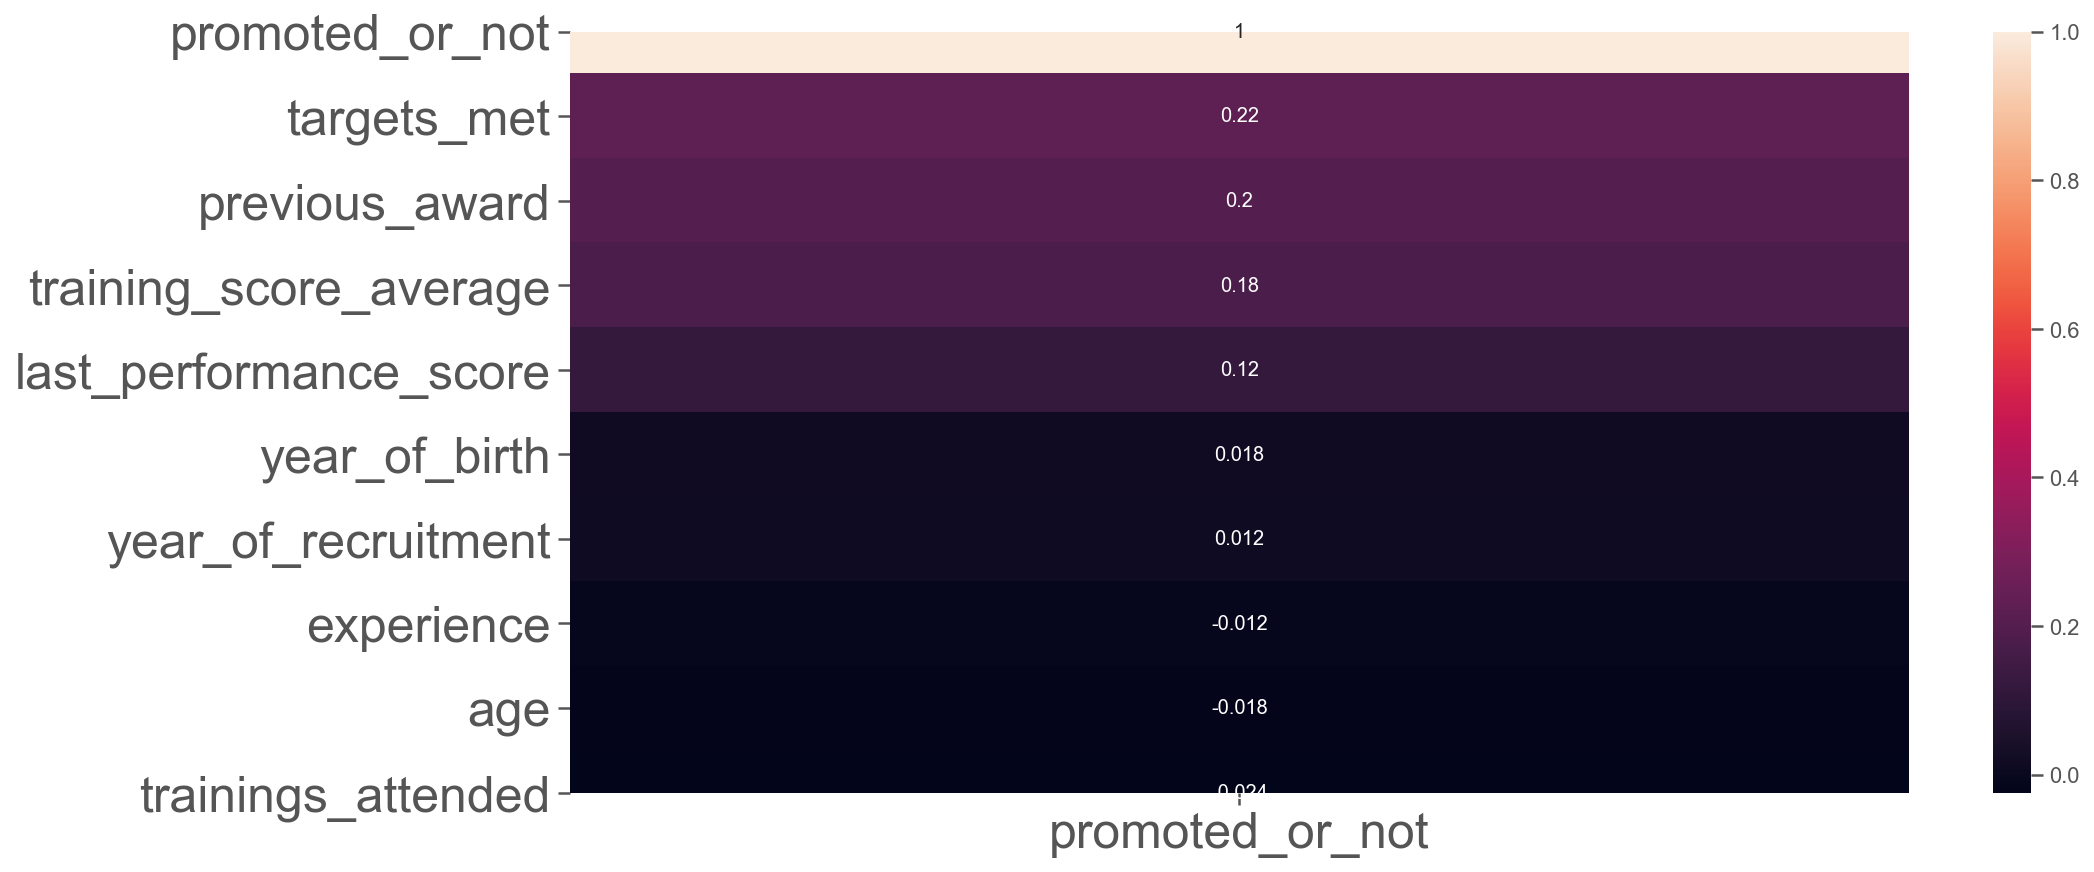

In [46]:
resize()
ax = plt.tick_params(labelsize=25)
sns.heatmap(uni_correlation,
           annot=True, ax=ax)

We can see which variable correlate more with our target and take a look at the `experience` variable we added; it more correlated than some other variables, isn't that cool ?, well, we all know **_correlation doesn't mean causation_** so we can't say anything legit yet.

### _Multi-variate correlation_

In [47]:
multi_correlation = df_train.corr()
multi_correlation

trainings_attended  year_of_birth  \
trainings_attended                1.000000       0.078710   
year_of_birth                     0.078710       1.000000   
last_performance_score           -0.062042      -0.175572   
year_of_recruitment               0.056215       0.654666   
targets_met                      -0.044789       0.025337   
previous_award                   -0.007409       0.013627   
training_score_average            0.041065       0.048390   
promoted_or_not                  -0.024345       0.017991   
age                              -0.078710      -1.000000   
experience                       -0.056215      -0.654666   

                        last_performance_score  year_of_recruitment  \
trainings_attended                   -0.062042             0.056215   
year_of_birth                        -0.175572             0.654666   
last_performance_score                1.000000            -0.190333   
year_of_recruitment                  -0.190333             1.000000   
targets_met                           0.276350             0.076910   
previous_award                        0.026587             0.041995   
training_score_average                0.057836             0.037477   
promoted_or_not                       0.119690             0.012287   
age                                   0.175572            -0.654666   
experience                            0.190333            -1.000000   

                        targets_met  previous_award  training_score_average  \
trainings_attended        -0.044789       -0.007409                0.041065   
year_of_birth              0.025337        0.013627                0.048390   
last_performance_score     0.276350        0.026587                0.057836   
year_of_recruitment        0.076910        0.041995                0.037477   
targets_met                1.000000        0.092934                0.077201   
previous_award             0.092934        1.000000                0.072360   
training_score_average     0.077201        0.072360                1.000000   
promoted_or_not            0.224518        0.201434                0.178448   
age                       -0.025337       -0.013627               -0.048390   
experience                -0.076910       -0.041995               -0.037477   

                        promoted_or_not       age  experience  
trainings_attended            -0.024345 -0.078710   -0.056215  
year_of_birth                  0.017991 -1.000000   -0.654666  
last_performance_score         0.119690  0.175572    0.190333  
year_of_recruitment            0.012287 -0.654666   -1.000000  
targets_met                    0.224518 -0.025337   -0.076910  
previous_award                 0.201434 -0.013627   -0.041995  
training_score_average         0.178448 -0.048390   -0.037477  
promoted_or_not                1.000000 -0.017991   -0.012287  
age                           -0.017991  1.000000    0.654666  
experience                    -0.012287  0.654666    1.000000

In [48]:
# sorting the values for easy look-out
multi_correlation = multi_correlation.sort_values(axis=0, by=multi_correlation.columns.tolist(), ascending=True)
multi_correlation

trainings_attended  year_of_birth  \
age                              -0.078710      -1.000000   
last_performance_score           -0.062042      -0.175572   
experience                       -0.056215      -0.654666   
targets_met                      -0.044789       0.025337   
promoted_or_not                  -0.024345       0.017991   
previous_award                   -0.007409       0.013627   
training_score_average            0.041065       0.048390   
year_of_recruitment               0.056215       0.654666   
year_of_birth                     0.078710       1.000000   
trainings_attended                1.000000       0.078710   

                        last_performance_score  year_of_recruitment  \
age                                   0.175572            -0.654666   
last_performance_score                1.000000            -0.190333   
experience                            0.190333            -1.000000   
targets_met                           0.276350             0.076910   
promoted_or_not                       0.119690             0.012287   
previous_award                        0.026587             0.041995   
training_score_average                0.057836             0.037477   
year_of_recruitment                  -0.190333             1.000000   
year_of_birth                        -0.175572             0.654666   
trainings_attended                   -0.062042             0.056215   

                        targets_met  previous_award  training_score_average  \
age                       -0.025337       -0.013627               -0.048390   
last_performance_score     0.276350        0.026587                0.057836   
experience                -0.076910       -0.041995               -0.037477   
targets_met                1.000000        0.092934                0.077201   
promoted_or_not            0.224518        0.201434                0.178448   
previous_award             0.092934        1.000000                0.072360   
training_score_average     0.077201        0.072360                1.000000   
year_of_recruitment        0.076910        0.041995                0.037477   
year_of_birth              0.025337        0.013627                0.048390   
trainings_attended        -0.044789       -0.007409                0.041065   

                        promoted_or_not       age  experience  
age                           -0.017991  1.000000    0.654666  
last_performance_score         0.119690  0.175572    0.190333  
experience                    -0.012287  0.654666    1.000000  
targets_met                    0.224518 -0.025337   -0.076910  
promoted_or_not                1.000000 -0.017991   -0.012287  
previous_award                 0.201434 -0.013627   -0.041995  
training_score_average         0.178448 -0.048390   -0.037477  
year_of_recruitment            0.012287 -0.654666   -1.000000  
year_of_birth                  0.017991 -1.000000   -0.654666  
trainings_attended            -0.024345 -0.078710   -0.056215

Let get this into a heat map to see what's going on

Text(0.5, 1, 'Correlation among features')

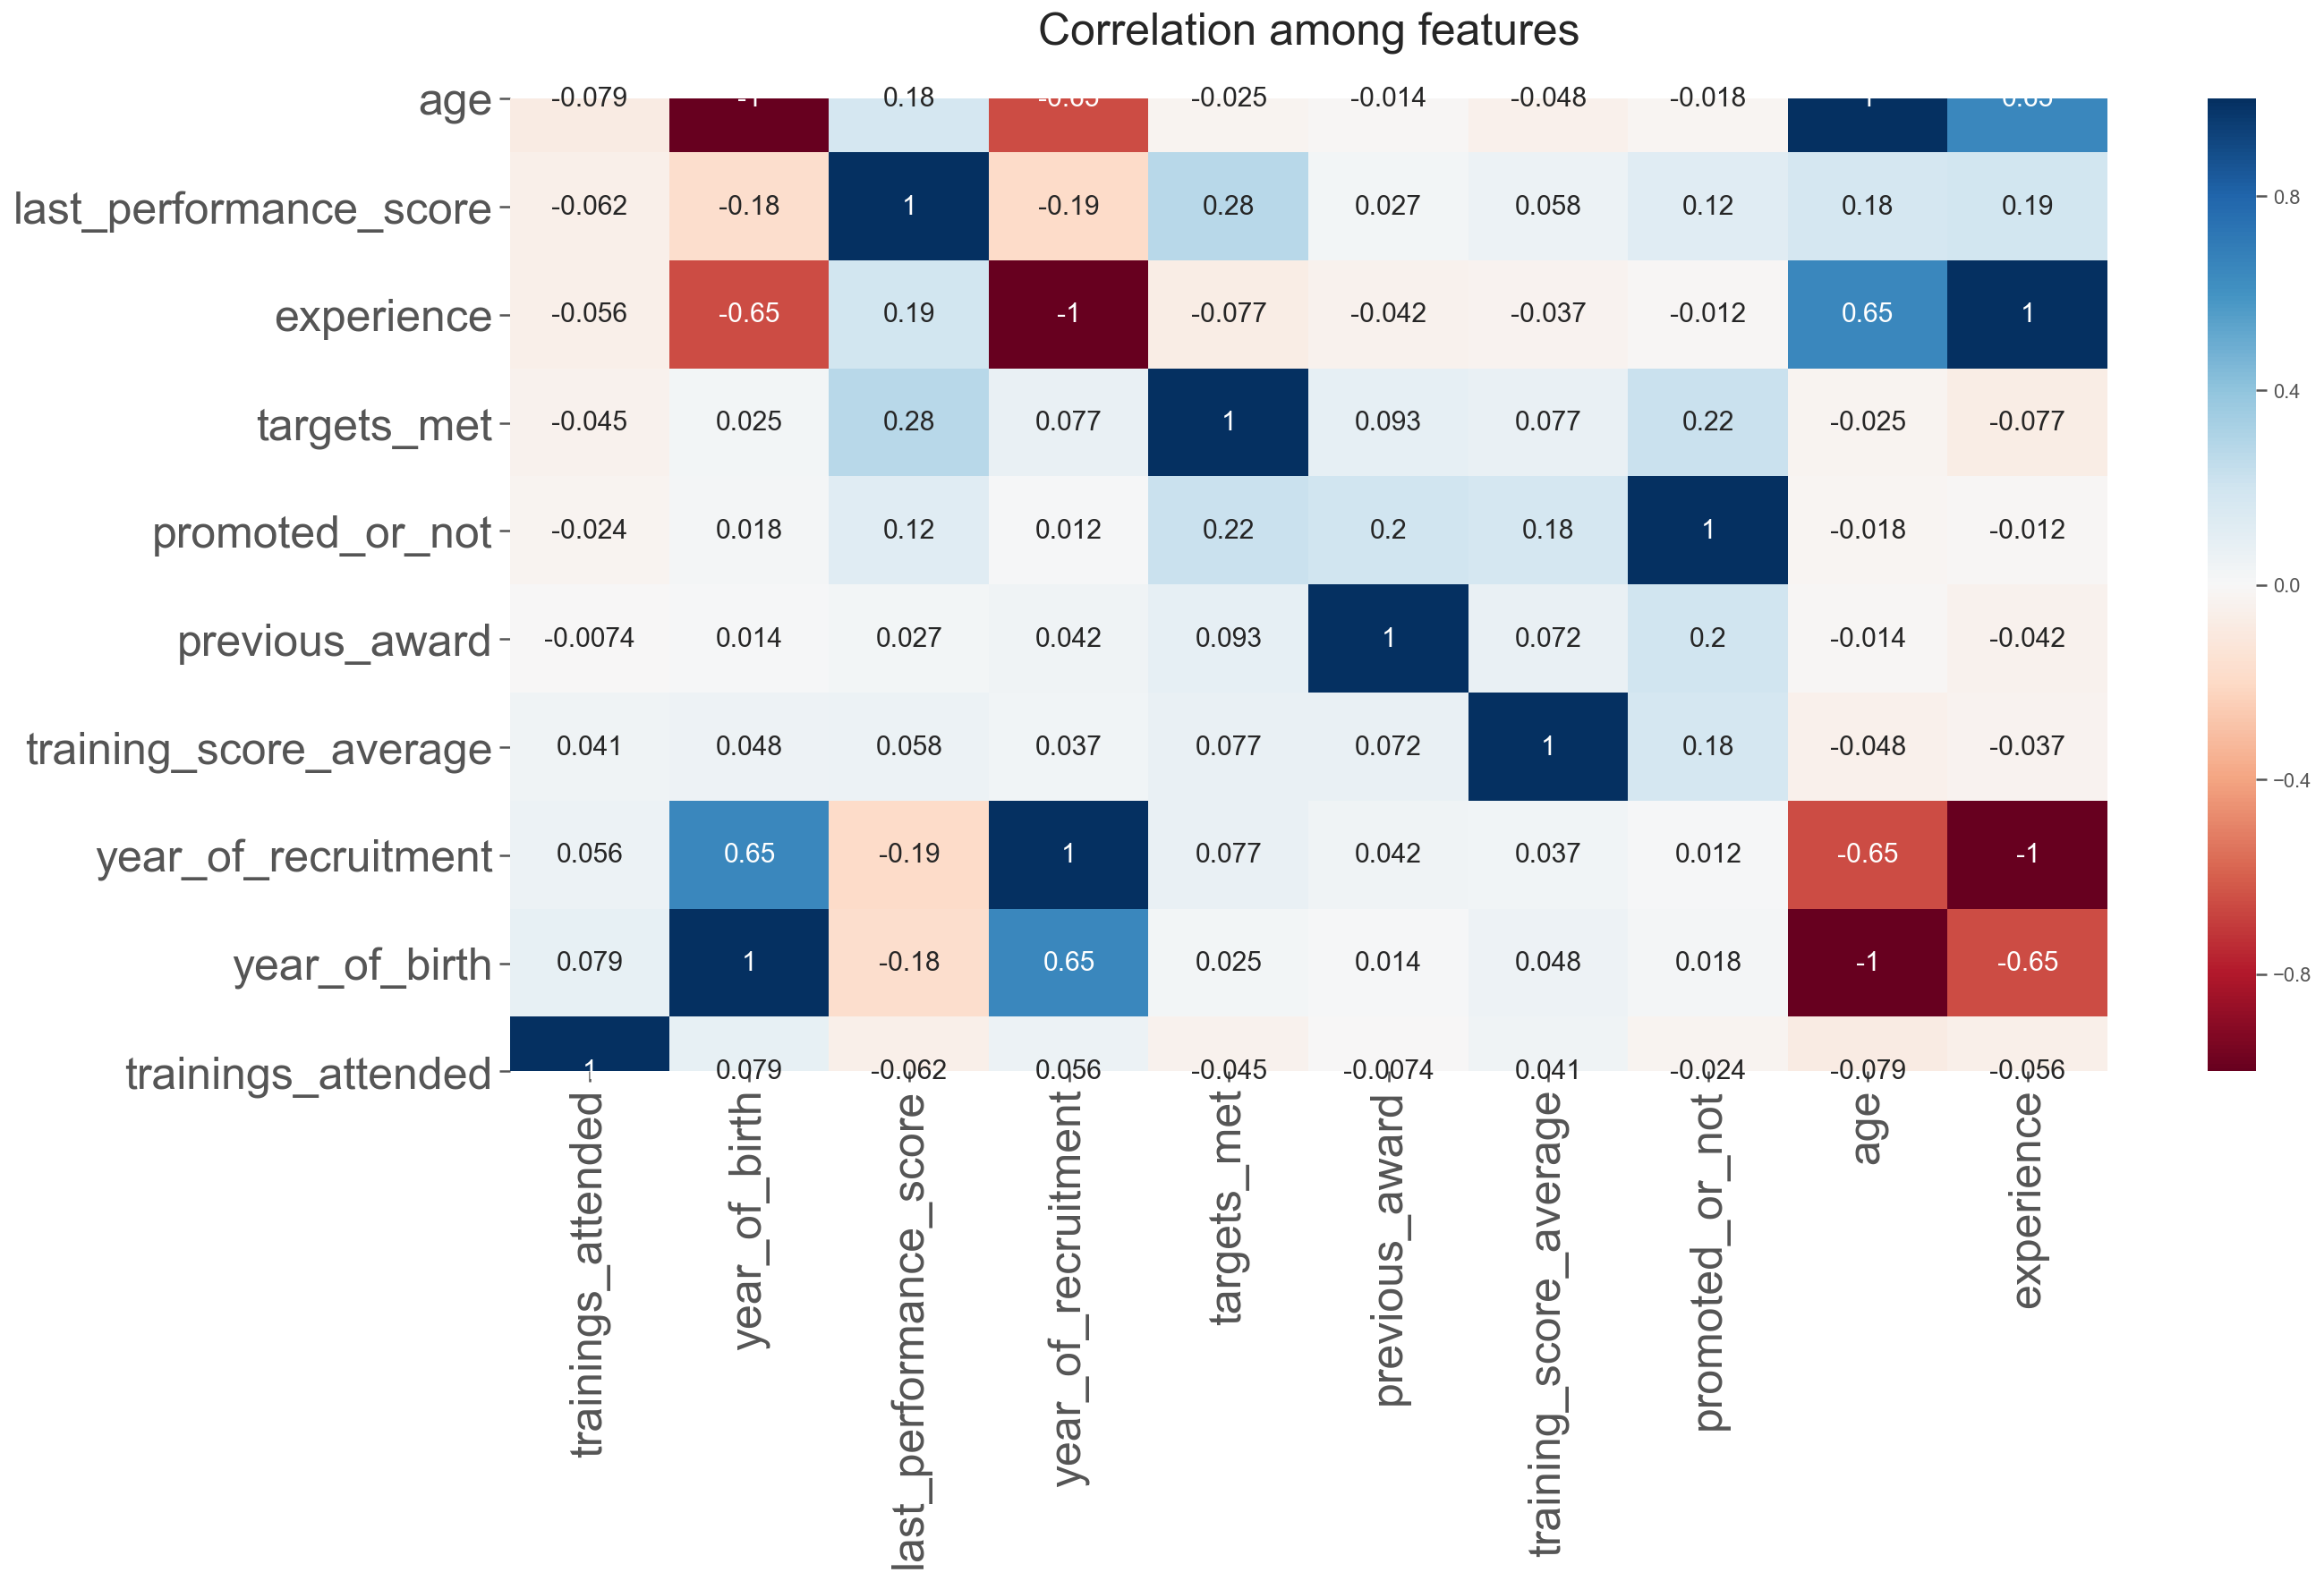

In [52]:
ax = plt.figure(figsize=(20, 10))
# rcParams['font.size'] = 15
sns.heatmap(multi_correlation,
           cmap='RdBu',
           annot=True,
           linecolor='gray',
           center=0,
           )
plt.tick_params(labelsize=25)
plt.title('Correlation among features', pad=30, fontsize=25)
plt.show()
plt.close('all')

* you can see how correlated **age** is with **experience**, that's a sign of multi-collinearity
 * what sould we do ?
   * drop one of 'em  or
   * leave 'em like that ?
* **targets mets**, **previous award** and one other seems to correlate with our targeted variable **promoted_or_not** fairly well
***
###### _guess what_?
No two varible are too correlated at least, you know under normal circumstances we'll have to setup a threshold of something around .8 to .9, that is we'll drop variables with such correlating coeffiecient from our data.

### Applying all transformations and features to our <font color=red>_test data_</font> unit

In [34]:
df_test = reduce_memory(df_test)

df_test = lower_case_column(df_test) # columns into lower case
df_test = add_feature(df_test, 'age', 'year_of_birth') # Age
df_test = add_feature(df_test, 'experience', 'year_of_recruitment') # Experience

df_test['age_cat'] = df_test.age.map(age_cat) # Group age into categories
df_test['performance_level'] = df_test.last_performance_score.map(performance_level)

for col in needed_col1:
    df_test[col] = df_test[col].map(upa_to_lowa_sp_to_unds) # .
print('All Done !')

Memory usage of our dataframe is 2.27 MB
Memory usage after optimization is 1.10 MB
Percent reduced is 51.45%
All Done !


In [30]:
df_test.head()

employeeno                                     division  \
0  YAK/S/00005  information_technology_and_solution_support   
1  YAK/S/00011  information_technology_and_solution_support   
2  YAK/S/00015                      research_and_innovation   
3  YAK/S/00016        customer_support_and_field_operations   
4  YAK/S/00017  information_technology_and_solution_support   

         qualification gender   channel_of_recruitment  trainings_attended  \
0  first_degree_or_hnd   male        agency_and_others                   2   
1                  NaN   male  direct_internal_process                   2   
2     msc,_mba_and_phd   male  direct_internal_process                   2   
3  first_degree_or_hnd   male        agency_and_others                   2   
4  first_degree_or_hnd   male        agency_and_others                   2   

   year_of_birth  last_performance_score  year_of_recruitment  targets_met  \
0           1976                     7.5                 2017            0   
1           1991                     0.0                 2018            0   
2           1984                     7.5                 2012            0   
3           1984                     2.5                 2009            0   
4           1983                     7.5                 2014            1   

   ...  foreign_schooled  marital_status past_disciplinary_action  \
0  ...               yes         married                       no   
1  ...               yes         married                       no   
2  ...               yes         married                       no   
3  ...                no          single                       no   
4  ...               yes         married                       no   

  previous_intradepartmental_movement no_of_previous_employers  \
0                                  no                        1   
1                                  no                        1   
2                                  no                        1   
3                                  no                        1   
4                                  no                        0   

  promoted_or_not age experience  age_cat  performance_level  
0             NaN  43          2  mid_age               good  
1             NaN  28          1  mid_age          very_poor  
2             NaN  35          7  mid_age               good  
3             NaN  35         10  mid_age               poor  
4             NaN  36          5  mid_age               good  

[5 rows x 23 columns]

I think, we're kinda set for the moment, at least we've transform it up-to the level of **train set**

# Missing values

In [194]:
df_test.isnull().any()
df_train[df_train.qualification.isnull()].head()

employeeno                             False
division                               False
qualification                           True
gender                                 False
channel_of_recruitment                 False
trainings_attended                     False
year_of_birth                          False
last_performance_score                 False
year_of_recruitment                    False
targets_met                            False
previous_award                         False
training_score_average                 False
state_of_origin                        False
foreign_schooled                       False
marital_status                         False
past_disciplinary_action               False
previous_intradepartmental_movement    False
no_of_previous_employers               False
promoted_or_not                         True
age                                    False
experience                             False
age_cat                                False
performanc

employeeno                               division qualification  gender  \
15   YAK/S/00022  customer_support_and_field_operations           NaN    male   
22   YAK/S/00033         commercial_sales_and_marketing           NaN  female   
28   YAK/S/00044         commercial_sales_and_marketing           NaN    male   
60   YAK/S/00091         commercial_sales_and_marketing           NaN  female   
137  YAK/S/00190  customer_support_and_field_operations           NaN  female   

      channel_of_recruitment  trainings_attended  year_of_birth  \
15   direct_internal_process                   2           1980   
22   direct_internal_process                   2           1997   
28         agency_and_others                   4           1997   
60   direct_internal_process                   2           2001   
137        agency_and_others                   2           1988   

     last_performance_score  year_of_recruitment  targets_met  ...  \
15                     10.0                 2008            0  ...   
22                      2.5                 2017            0  ...   
28                      5.0                 2017            0  ...   
60                      0.0                 2018            0  ...   
137                    10.0                 2010            0  ...   

     foreign_schooled  marital_status past_disciplinary_action  \
15                yes         married                       no   
22                yes         married                       no   
28                yes         married                       no   
60                yes          single                       no   
137               yes          single                       no   

    previous_intradepartmental_movement no_of_previous_employers  \
15                                   no                        1   
22                                   no                        1   
28                                   no                        1   
60                                   no                        2   
137                                  no                        5   

    promoted_or_not age experience  age_cat  performance_level  
15                0  39         11  mid_age               good  
22                0  22          2    youth               poor  
28                0  22          2    youth            average  
60                0  18          1     teen          very_poor  
137               0  31          9  mid_age               good  

[5 rows x 23 columns]

I think we only have *** Null values *** in the `qualification` field
*** 
let do some justice to that anyway!

In [383]:
gc.collect()

5195

# We're gonna leave that cus it's way too minor

## Categorical Encoding
###### let's deal with our categorical variables before we move on to solving of missing values

<font color=blue> Let's do some manual Encoding

let check for categorical ***dtype*** in our data

In [36]:
cat_cols_train = [colname for colname in df_train.columns 
            if df_train[colname].dtype.name in ['category', 'object']]
cat_cols_test = [colname for colname in df_test.columns 
            if df_test[colname].dtype.name in ['category', 'object']]

In [37]:
cat_cols_train
cat_cols_test

['employeeno',
 'division',
 'qualification',
 'gender',
 'channel_of_recruitment',
 'state_of_origin',
 'foreign_schooled',
 'marital_status',
 'past_disciplinary_action',
 'previous_intradepartmental_movement',
 'no_of_previous_employers',
 'age_cat',
 'performance_level']

['employeeno',
 'division',
 'qualification',
 'gender',
 'channel_of_recruitment',
 'state_of_origin',
 'foreign_schooled',
 'marital_status',
 'past_disciplinary_action',
 'previous_intradepartmental_movement',
 'no_of_previous_employers',
 'age_cat',
 'performance_level']

# Nominal Features (with more than 2 and less than 15 values)
- Let's see the distribution of the feature and target Ratio for each value in nominal features

In [38]:
#               Train
#***********-----------***********#
norminal_train = [colname for colname in df_train.columns if df_train[[colname]].nunique().values in range(3, 15)]
df_train[norminal_train].nunique().astype(np.int16)

#              Test
#**********-----------************#
norminal_test = [colname for colname in df_test.columns if df_test[[colname]].nunique().values in range(3, 15)]
df_test[norminal_test].nunique().astype(np.int16)

division                     9
qualification                3
channel_of_recruitment       3
trainings_attended          10
last_performance_score       6
marital_status               3
no_of_previous_employers     7
age_cat                      4
performance_level            5
dtype: int16

division                    9
qualification               3
channel_of_recruitment      3
trainings_attended          9
last_performance_score      6
marital_status              3
no_of_previous_employers    7
age_cat                     4
performance_level           5
dtype: int16

In [39]:
#Looking the V's features

def ploting_cat_fet(df, target, cols, vis_row=10, vis_col=2):
    import matplotlib.gridspec as gridspec # to do the grid of plots
    total = len(df)
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(df_train[cols]): 
        tmp = pd.crosstab(df_train[col], df_train[target], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=df_train, order=list(tmp[col].values) , color='green') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()
    gc.collect()

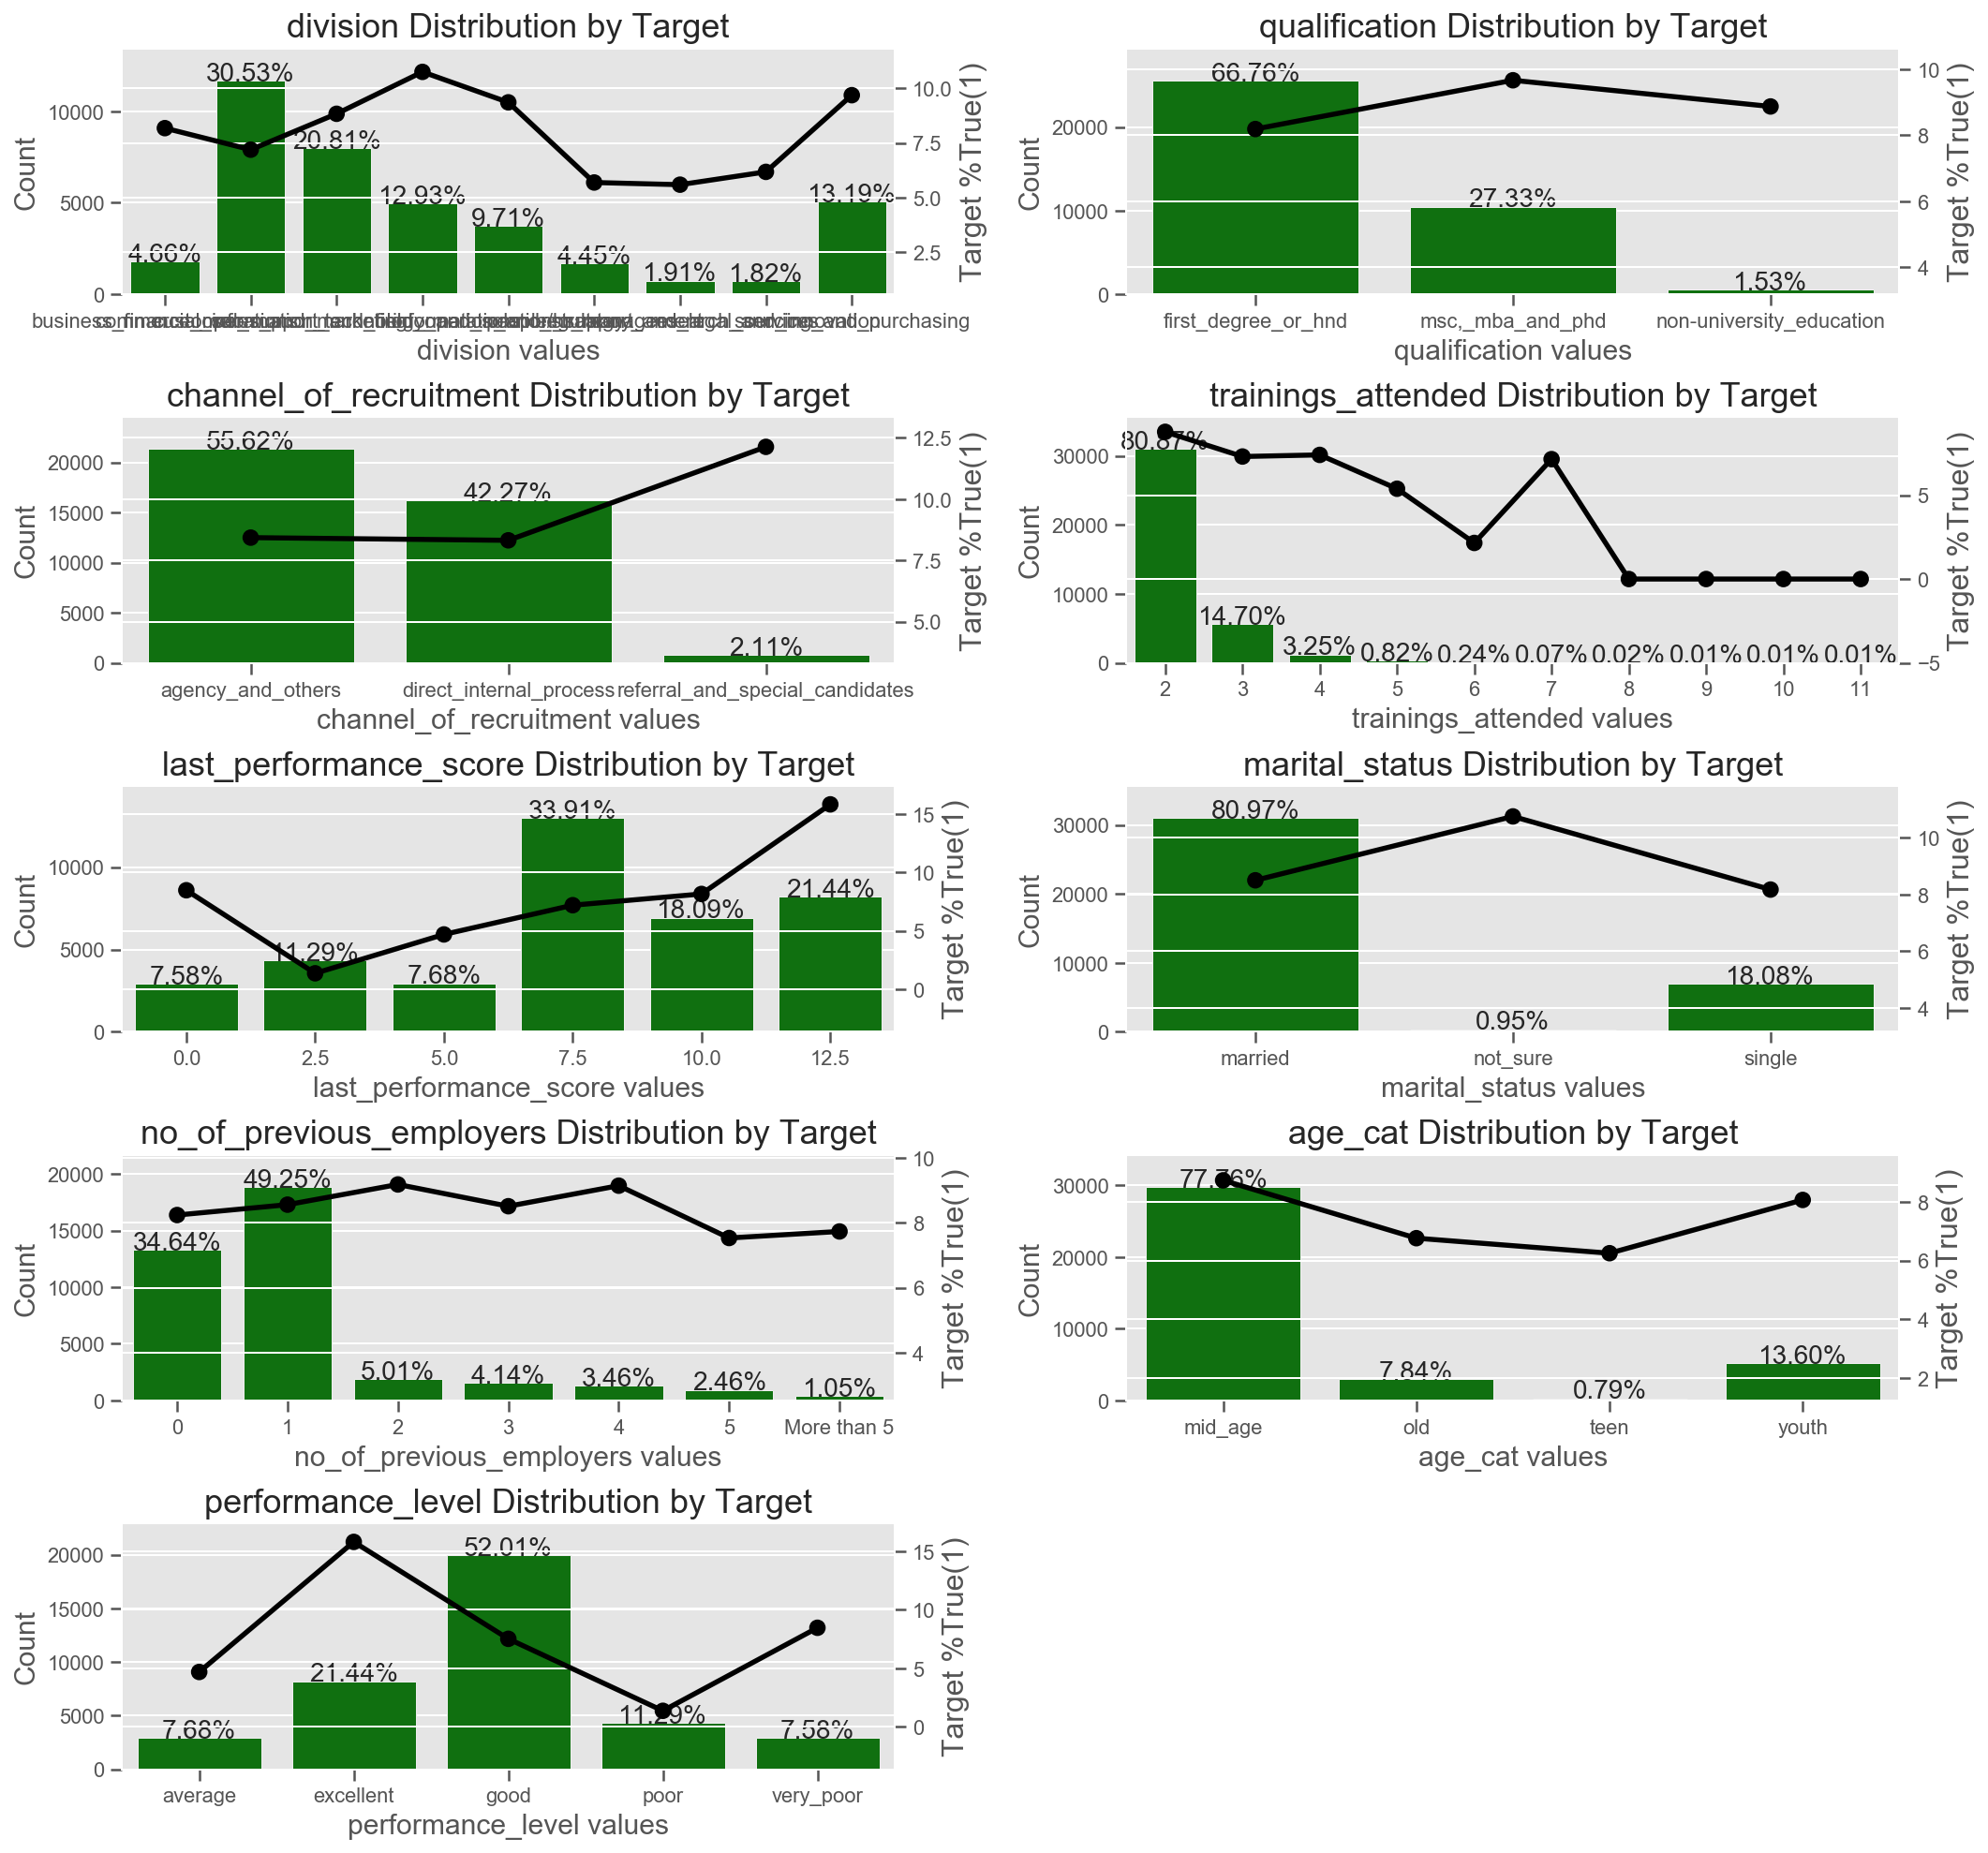

In [121]:
ploting_cat_fet(df_train, 'promoted_or_not', norminal_train)

# Binary Features

In [40]:
#Looking the V's features
# a helper function
def bin_ft(df, bin_cols, target, vrow=3, vcol=2):
    import matplotlib.gridspec as gridspec # to do the grid of plots
    grid = gridspec.GridSpec(vrow, vcol) # The grid of chart
    plt.figure(figsize=(16,20)) # size of figure
    total = len(df)
    # loop to get column and the count of plots 
    for n, col in enumerate(df[bin_cols]): 
        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=df, hue=target, palette='hls') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                   height + 3,
                   '{:1.2f}%'.format(height/total*100),
                   ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    
    plt.show()
    gc.collect()

In [216]:
df_train.head()

employeeno                               division        qualification  \
0  YAK/S/00001         commercial_sales_and_marketing     msc,_mba_and_phd   
1  YAK/S/00002  customer_support_and_field_operations  first_degree_or_hnd   
2  YAK/S/00003         commercial_sales_and_marketing  first_degree_or_hnd   
3  YAK/S/00004         commercial_sales_and_marketing  first_degree_or_hnd   
4  YAK/S/00006               information_and_strategy  first_degree_or_hnd   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0  female  direct_internal_process                   2           1986   
1    male        agency_and_others                   2           1991   
2    male  direct_internal_process                   2           1987   
3    male        agency_and_others                   3           1982   
4    male  direct_internal_process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  ...  \
0                    12.5                 2011            1  ...   
1                    12.5                 2015            0  ...   
2                     7.5                 2012            0  ...   
3                     2.5                 2009            0  ...   
4                     7.5                 2012            0  ...   

   foreign_schooled  marital_status past_disciplinary_action  \
0                no         married                       no   
1               yes         married                       no   
2               yes         married                       no   
3               yes          single                       no   
4               yes         married                       no   

  previous_intradepartmental_movement no_of_previous_employers  \
0                                  no                        0   
1                                  no                        0   
2                                  no                        0   
3                                  no                        1   
4                                  no                        1   

  promoted_or_not age experience  age_cat  performance_level  
0               0  33          8  mid_age          excellent  
1               0  28          4  mid_age          excellent  
2               0  32          7  mid_age               good  
3               0  37         10  mid_age               poor  
4               0  29          7  mid_age               good  

[5 rows x 23 columns]

In [41]:
print('Train:')
binary_train = [colname for colname in df_train.columns if df_train[[colname]].nunique().values <= 2]
df_train[binary_train].nunique().astype(np.int16)

print('\n\n')

print('Trest: ')
binary_test = [colname for colname in df_test.columns if df_test[[colname]].nunique().values <= 2]
df_test[binary_test].nunique().astype(np.int16)

Train:


gender                                 2
targets_met                            2
previous_award                         2
foreign_schooled                       2
past_disciplinary_action               2
previous_intradepartmental_movement    2
promoted_or_not                        2
dtype: int16




Trest: 


gender                                 2
targets_met                            2
previous_award                         2
foreign_schooled                       2
past_disciplinary_action               2
previous_intradepartmental_movement    2
dtype: int16

gender                                 2
targets_met                            2
previous_award                         2
foreign_schooled                       2
past_disciplinary_action               2
previous_intradepartmental_movement    2
promoted_or_not                        2
dtype: int16

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


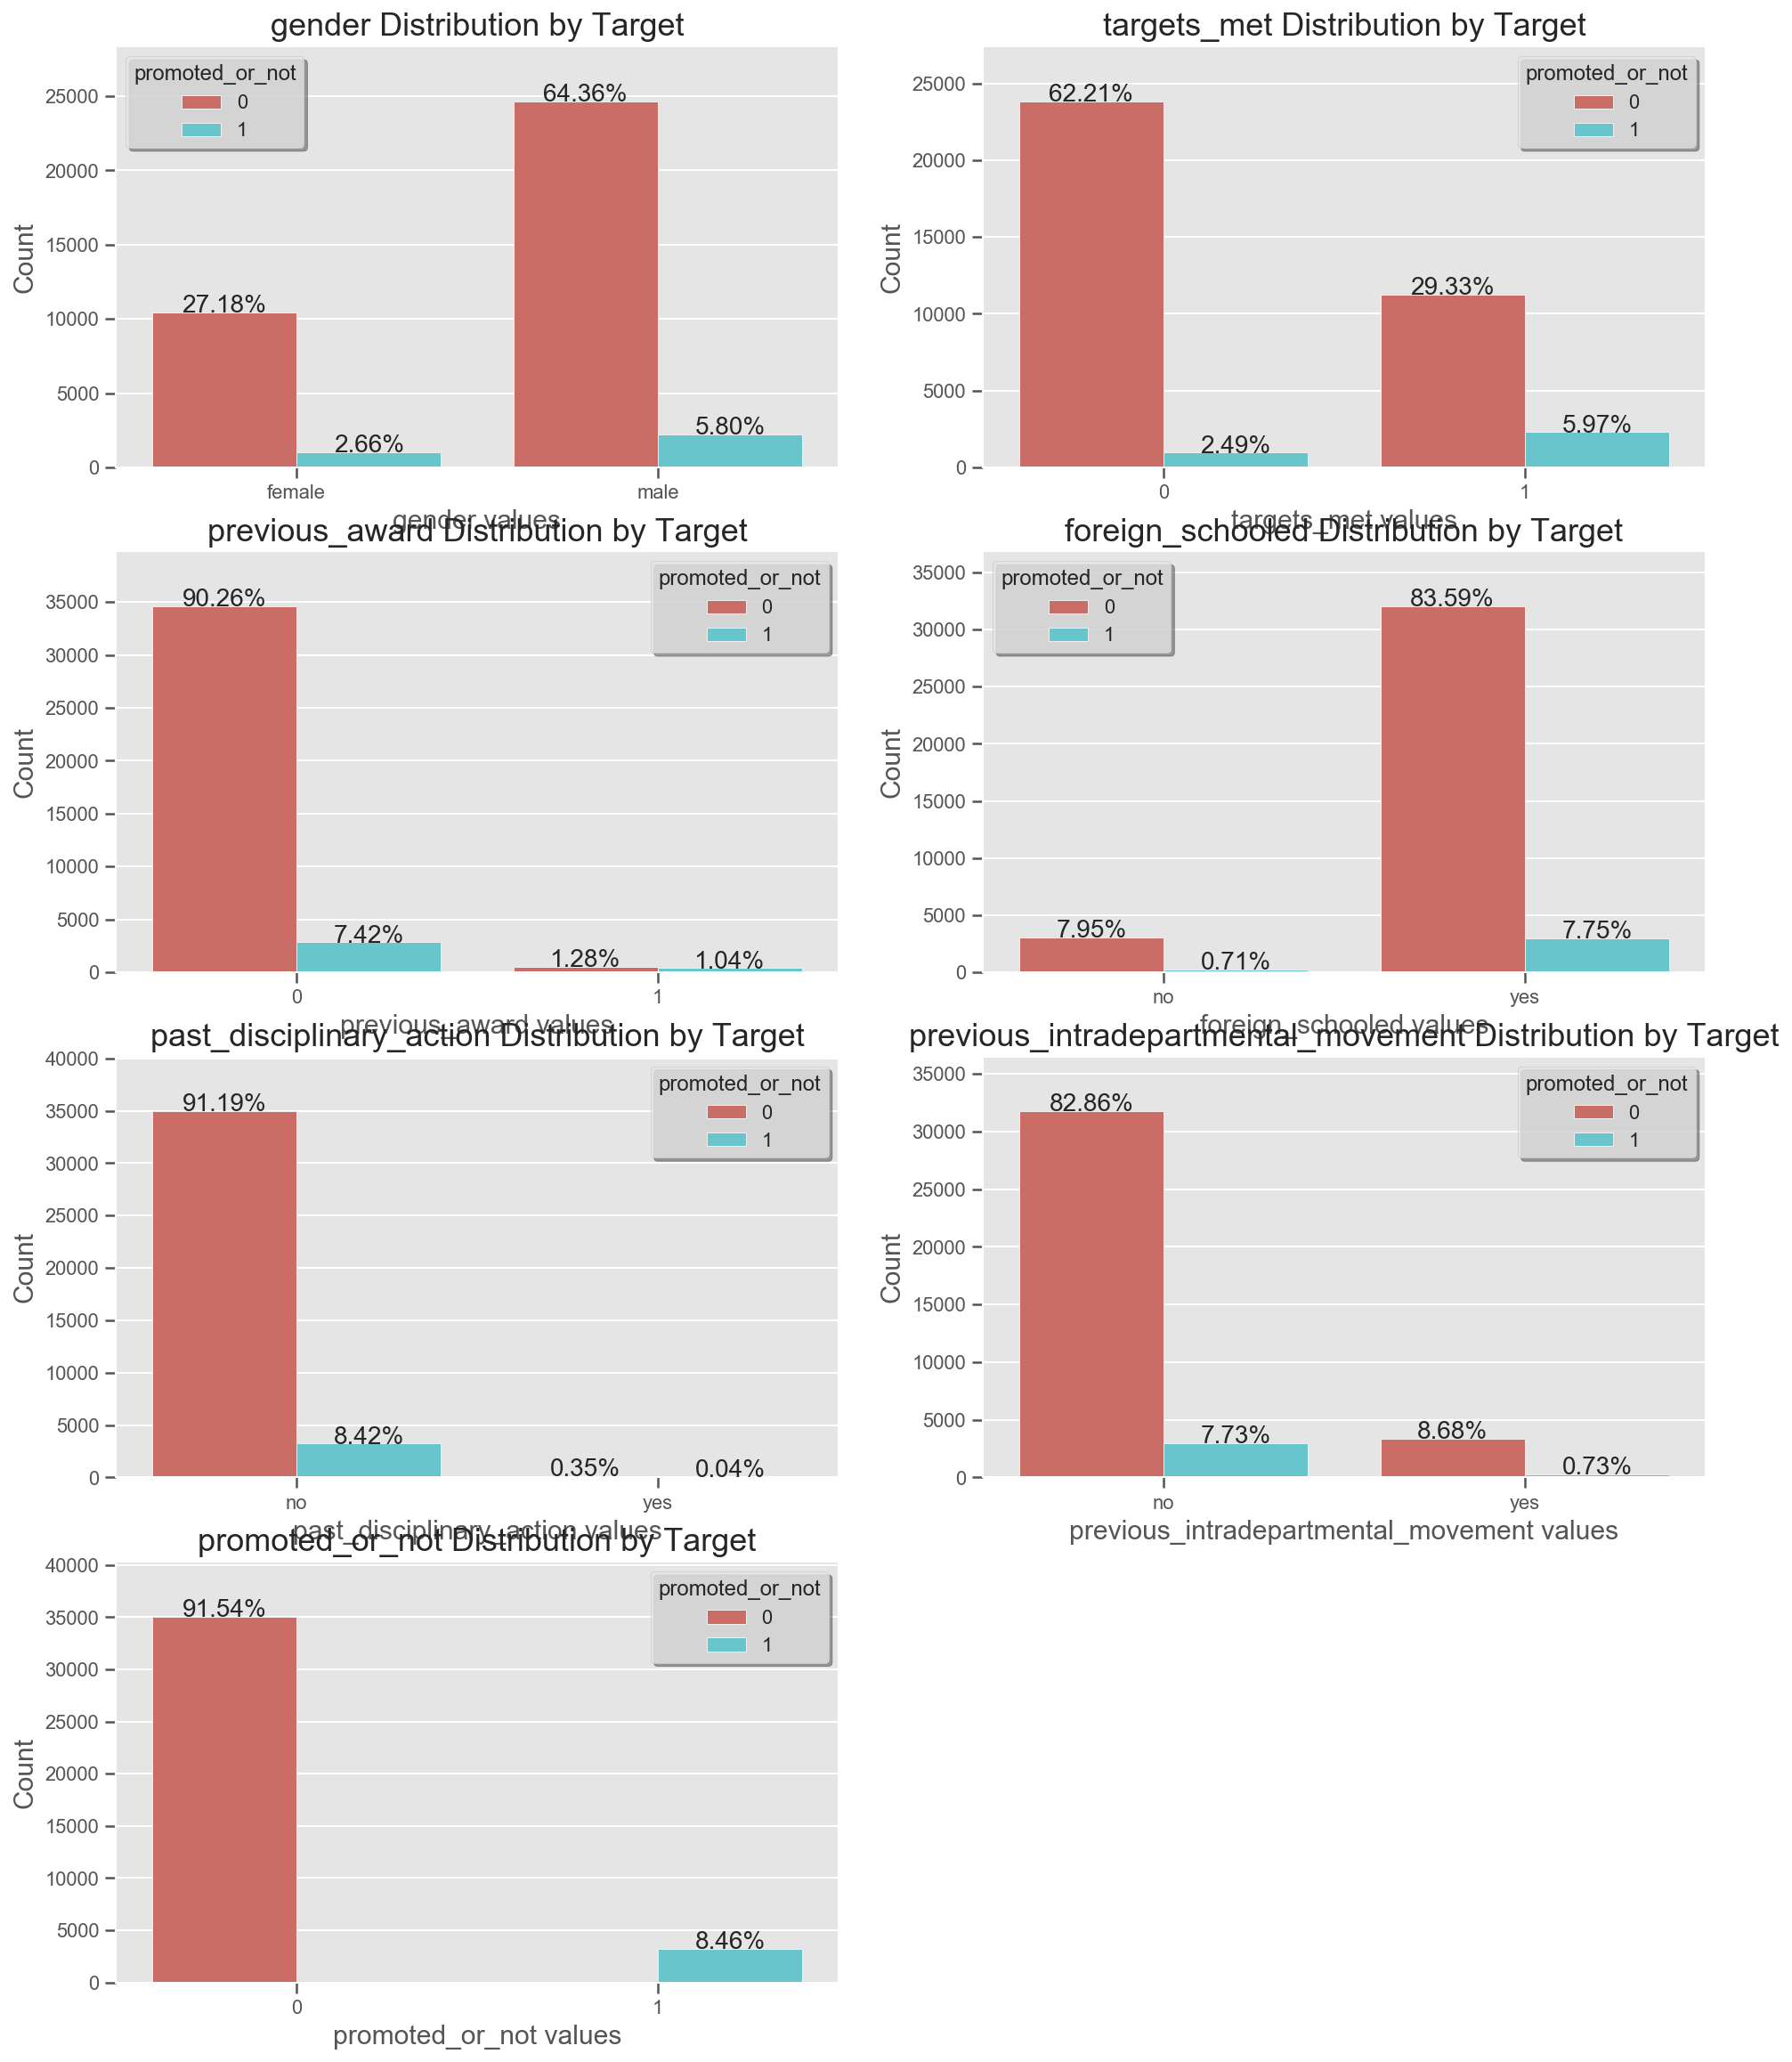

In [38]:
bin_ft(df_train, binary, 'promoted_or_not', vrow=4, vcol=2)

## I think you can see for yourself a lot the plot is saying .

All the values with highest % of True values on target, are the category's with lowest frequency on the nominal category's. 
We need to handle with all these features;<br>
As it is nominal and don't have so many values by category's we can transform it in dummy features;

# Binary Encoding for our ***Binary Features***.

###### <font color=orange><i>let's do it!</i>

In [42]:
binary_cat_col_train = [colname for colname in df_train.columns
                  if df_train[[colname]].nunique().values <= 2 
                  and df_train[colname].dtype.name 
                  in ['object', 'category']]

binary_cat_col_test = [colname for colname in df_test.columns
                  if df_test[[colname]].nunique().values <= 2 
                  and df_test[colname].dtype.name 
                  in ['object', 'category']]
# binary cat columns

In [43]:
df_test['promoted_or_not'] = np.nan # gotcha!

<s>we have successfully done the concatenation, so let move on.......</s>

In [44]:
bin_dict = {'yes':1, 'no':0, 'true':1, 'false':0, 'male':1, 'female':0}

In [45]:
# Train
for col in binary_cat_col_train:
    df_train[col] = df_train[col].map(bin_dict) 

# Test
for col in binary_cat_col_test:
    df_test[col] = df_test[col].map(bin_dict)

In [41]:
# and here we go !...
df_train.head()
df_test.head()

employeeno                               division        qualification  \
0  YAK/S/00001         commercial_sales_and_marketing     msc,_mba_and_phd   
1  YAK/S/00002  customer_support_and_field_operations  first_degree_or_hnd   
2  YAK/S/00003         commercial_sales_and_marketing  first_degree_or_hnd   
3  YAK/S/00004         commercial_sales_and_marketing  first_degree_or_hnd   
4  YAK/S/00006               information_and_strategy  first_degree_or_hnd   

   gender   channel_of_recruitment  trainings_attended  year_of_birth  \
0       0  direct_internal_process                   2           1986   
1       1        agency_and_others                   2           1991   
2       1  direct_internal_process                   2           1987   
3       1        agency_and_others                   3           1982   
4       1  direct_internal_process                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  ...  \
0                    12.5                 2011            1  ...   
1                    12.5                 2015            0  ...   
2                     7.5                 2012            0  ...   
3                     2.5                 2009            0  ...   
4                     7.5                 2012            0  ...   

   foreign_schooled  marital_status past_disciplinary_action  \
0                 0         married                        0   
1                 1         married                        0   
2                 1         married                        0   
3                 1          single                        0   
4                 1         married                        0   

   previous_intradepartmental_movement no_of_previous_employers  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   
3                                    0                        1   
4                                    0                        1   

   promoted_or_not  age experience  age_cat  performance_level  
0                0   33          8  mid_age          excellent  
1                0   28          4  mid_age          excellent  
2                0   32          7  mid_age               good  
3                0   37         10  mid_age               poor  
4                0   29          7  mid_age               good  

[5 rows x 23 columns]

employeeno                                     division  \
0  YAK/S/00005  information_technology_and_solution_support   
1  YAK/S/00011  information_technology_and_solution_support   
2  YAK/S/00015                      research_and_innovation   
3  YAK/S/00016        customer_support_and_field_operations   
4  YAK/S/00017  information_technology_and_solution_support   

         qualification  gender   channel_of_recruitment  trainings_attended  \
0  first_degree_or_hnd       1        agency_and_others                   2   
1                  NaN       1  direct_internal_process                   2   
2     msc,_mba_and_phd       1  direct_internal_process                   2   
3  first_degree_or_hnd       1        agency_and_others                   2   
4  first_degree_or_hnd       1        agency_and_others                   2   

   year_of_birth  last_performance_score  year_of_recruitment  targets_met  \
0           1976                     7.5                 2017            0   
1           1991                     0.0                 2018            0   
2           1984                     7.5                 2012            0   
3           1984                     2.5                 2009            0   
4           1983                     7.5                 2014            1   

   ...  foreign_schooled  marital_status past_disciplinary_action  \
0  ...                 1         married                        0   
1  ...                 1         married                        0   
2  ...                 1         married                        0   
3  ...                 0          single                        0   
4  ...                 1         married                        0   

   previous_intradepartmental_movement no_of_previous_employers  age  \
0                                    0                        1   43   
1                                    0                        1   28   
2                                    0                        1   35   
3                                    0                        1   35   
4                                    0                        0   36   

   experience  age_cat  performance_level  promoted_or_not  
0           2  mid_age               good              NaN  
1           1  mid_age          very_poor              NaN  
2           7  mid_age               good              NaN  
3          10  mid_age               poor              NaN  
4           5  mid_age               good              NaN  

[5 rows x 23 columns]

### <font color=green> I think we've done justice to The ***BINARY COLUMNS***.</font>

### <font color=blue><i><u> I can see only few ***Ordinal variable*** one which I created, so we're gonna transform them too</u></i></font>

In [46]:
# Train
print('Unique Ordinal values: Train')
df_train.performance_level.unique()
df_train.no_of_previous_employers.unique()

print('\n\n')

# Test
print('Unique Ordinal values: Test')
df_test.performance_level.unique()
df_test.no_of_previous_employers.unique()

Unique Ordinal values: Train


array(['excellent', 'good', 'poor', 'very_poor', 'average'], dtype=object)

[0, 1, 4, 3, 2, More than 5, 5]
Categories (7, object): [0, 1, 4, 3, 2, More than 5, 5]




Unique Ordinal values: Test


array(['good', 'very_poor', 'poor', 'excellent', 'average'], dtype=object)

[1, 0, 2, 5, 3, More than 5, 4]
Categories (7, object): [1, 0, 2, 5, 3, More than 5, 4]

In [47]:
from pandas.api.types import CategoricalDtype 

performance_dict = {'excellent':10, 'good':7, 'average':5, 'poor': 3, 'very_poor':1}
no_of_employers_dict = {'More than 5': 7, '0':0, '1':1, '2':2, '3':3, '4':4, '5':5}

performance_categories = CategoricalDtype(categories=[1, 3, 5, 7, 10], ordered=True)
no_of_employers_categories = CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 7], ordered=True)

#               Train
#************----------***************#
df_train.performance_level = df_train.performance_level.map(performance_dict).astype(performance_categories)
df_train.no_of_previous_employers = df_train.no_of_previous_employers.replace(no_of_employers_dict).astype(no_of_employers_categories)

#               Test
#************----------***************#
df_test.performance_level = df_test.performance_level.map(performance_dict).astype(performance_categories)
df_test.no_of_previous_employers = df_test.no_of_previous_employers.replace(no_of_employers_dict).astype(no_of_employers_categories)

In [48]:
print('Train:')
df_train[['no_of_previous_employers', 'performance_level']].head()

print('Test:')
df_test[['no_of_previous_employers', 'performance_level']].head()

Train:


no_of_previous_employers performance_level
0                        0                10
1                        0                10
2                        0                 7
3                        1                 3
4                        1                 7

Test:


no_of_previous_employers performance_level
0                        1                 7
1                        1                 1
2                        1                 7
3                        1                 3
4                        0                 7

Ok, now it's ordered and we can get the codes that corresponds to each value to make them nominal feature;

##### Code of Ordinal Category

In [49]:
# replacing with codes of ordinal category

#             Train
#***********----------************#
df_train.performance_level = df_train.performance_level.cat.codes
df_train.no_of_previous_employers = df_train.no_of_previous_employers.cat.codes

#             Test
#***********----------************#
df_test.performance_level = df_test.performance_level.cat.codes
df_test.no_of_previous_employers = df_test.no_of_previous_employers.cat.codes

# Norminal Ecoding for our ***Norminal Features***.

In [50]:
norminal_cat_col_train = [colname for colname in df_train.columns
                  if df_train[[colname]].nunique().values in range(3, 15)
                  and df_train[colname].dtype.name 
                  in ['object', 'category']]

norminal_cat_col_test = [colname for colname in df_test.columns
                  if df_test[[colname]].nunique().values in range(3, 15)
                  and df_test[colname].dtype.name 
                  in ['object', 'category']]

# norminal_cat_col_train.remove('no_of_previous_employers') #
# norminal_cat_col_train.remove('performance_level')

# norminal_cat_col_test.remove('no_of_previous_employers') #
# norminal_cat_col_test.remove('performance_level')

print('Train:',norminal_cat_col_train)
print('Test:', norminal_cat_col_test)

Train: ['division', 'qualification', 'channel_of_recruitment', 'marital_status', 'age_cat']
Test: ['division', 'qualification', 'channel_of_recruitment', 'marital_status', 'age_cat']


what we did above: 
we too all the columns with unique values of `range 3-15` that're categorical and object in nature.


# Dummy Variable transformation

In [51]:
train = pd.get_dummies(df_train, columns=norminal_cat_col_train, drop_first=True, dummy_na=False)
test = pd.get_dummies(df_test, columns=norminal_cat_col_test, drop_first=True, dummy_na=False)

In [52]:
# make sure all columns are in lowe case
train = lower_case_column(train) # .
test = lower_case_column(test)

In [53]:
print('Train columns:', train.columns)
print('Test columns:', test.columns)

Train columns: Index(['employeeno', 'gender', 'trainings_attended', 'year_of_birth',
       'last_performance_score', 'year_of_recruitment', 'targets_met',
       'previous_award', 'training_score_average', 'state_of_origin',
       'foreign_schooled', 'past_disciplinary_action',
       'previous_intradepartmental_movement', 'no_of_previous_employers',
       'promoted_or_not', 'age', 'experience', 'performance_level',
       'division_commercial_sales_and_marketing',
       'division_customer_support_and_field_operations',
       'division_information_technology_and_solution_support',
       'division_information_and_strategy', 'division_people/hr_management',
       'division_regulatory_and_legal_services',
       'division_research_and_innovation', 'division_sourcing_and_purchasing',
       'qualification_msc,_mba_and_phd',
       'qualification_non-university_education',
       'channel_of_recruitment_direct_internal_process',
       'channel_of_recruitment_referral_and_special_can

In [54]:
train.head(); train.shape
test.head(); test.shape

employeeno  gender  trainings_attended  year_of_birth  \
0  YAK/S/00001       0                   2           1986   
1  YAK/S/00002       1                   2           1991   
2  YAK/S/00003       1                   2           1987   
3  YAK/S/00004       1                   3           1982   
4  YAK/S/00006       1                   3           1990   

   last_performance_score  year_of_recruitment  targets_met  previous_award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   training_score_average state_of_origin  ...  \
0                      41         ANAMBRA  ...   
1                      52         ANAMBRA  ...   
2                      42         KATSINA  ...   
3                      42           NIGER  ...   
4                      77       AKWA IBOM  ...   

   division_sourcing_and_purchasing  qualification_msc,_mba_and_phd  \
0                                 0                               1   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   qualification_non-university_education  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   channel_of_recruitment_direct_internal_process  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               1   

   channel_of_recruitment_referral_and_special_candidates  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   marital_status_not_sure  marital_status_single  age_cat_old  age_cat_teen  \
0                        0                      0            0             0   
1                        0                      0            0             0   
2                        0                      0            0             0   
3                        0                      1            0             0   
4                        0                      0            0             0   

   age_cat_youth  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 35 columns]

(38312, 35)

employeeno  gender  trainings_attended  year_of_birth  \
0  YAK/S/00005       1                   2           1976   
1  YAK/S/00011       1                   2           1991   
2  YAK/S/00015       1                   2           1984   
3  YAK/S/00016       1                   2           1984   
4  YAK/S/00017       1                   2           1983   

   last_performance_score  year_of_recruitment  targets_met  previous_award  \
0                     7.5                 2017            0               0   
1                     0.0                 2018            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2014            1               0   

   training_score_average state_of_origin  ...  \
0                      65             FCT  ...   
1                      69            OGUN  ...   
2                      76            KANO  ...   
3                      52          RIVERS  ...   
4                      69             FCT  ...   

   division_sourcing_and_purchasing  qualification_msc,_mba_and_phd  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               1   
3                                 0                               0   
4                                 0                               0   

   qualification_non-university_education  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   channel_of_recruitment_direct_internal_process  \
0                                               0   
1                                               1   
2                                               1   
3                                               0   
4                                               0   

   channel_of_recruitment_referral_and_special_candidates  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   marital_status_not_sure  marital_status_single  age_cat_old  age_cat_teen  \
0                        0                      0            0             0   
1                        0                      0            0             0   
2                        0                      0            0             0   
3                        0                      1            0             0   
4                        0                      0            0             0   

   age_cat_youth  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 35 columns]

(16496, 35)

### _We're gonna drop ***state of origin*** and ***employeeno*** label from our dataset !_
*** 
I could bearly see anything they can add to our prediction.

In [55]:
to_be_droped = ['employeeno', 'state_of_origin']
train = train.drop(to_be_droped, axis=1)
test = test.drop(to_be_droped, axis=1)

## sigh!, I think we've done some pretty good stuff
*** 
The procedures above might not work well for most data in which there are lot of missing varibles and very complicated situation such that you can't distinguishe *** Norminal*** from ***Ordinal*** or the rest, we might need to implore more suffisticated methods

# <center><font color=hotpink><u> Modeling
    
    We've done some...wait for it:
*   * EDA
    * Visualization
    * Hypothesis testing
    * Feature Engineering
    * and now modeling   </u></center></font>
    

## Splitting our dataset

In [56]:
X_train = train.drop('promoted_or_not', axis=1)
y_train = train.promoted_or_not

X_test = test.drop('promoted_or_not', axis=1)
y_test = test.promoted_or_not

## Feature Scaling a.k.a  <i>Feature Transformation</i>
we'll be transforming our data to have mean of 0 and variance of 1 to eradicate outliers in the data
#### @<i>Standard scaler</i>

In [57]:
# Columns will be lost.
columns = X_train.columns

In [58]:
scaler = StandardScaler()

# scaling X_train
X_train = scaler.fit_transform(X_train)

# scaling X_test
X_test = scaler.transform(X_test)

## Putting back the columns names

In [59]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

## Scaled !

In [60]:
X_train.head()
X_test.head()

gender  trainings_attended  year_of_birth  last_performance_score  \
0 -1.533393           -0.416255      -0.027378                1.282300   
1  0.652148           -0.416255       0.626563                1.282300   
2  0.652148           -0.416255       0.103410               -0.053139   
3  0.652148            1.224610      -0.550531               -1.388579   
4  0.652148            1.224610       0.495775               -0.053139   

   year_of_recruitment  targets_met  previous_award  training_score_average  \
0            -0.502111     1.353843        -0.15395               -1.075128   
1             0.436548    -0.738638        -0.15395               -0.251933   
2            -0.267446    -0.738638        -0.15395               -1.000292   
3            -0.971441    -0.738638        -0.15395               -1.000292   
4            -0.267446    -0.738638        -0.15395                1.618966   

   foreign_schooled  past_disciplinary_action  ...  \
0         -3.248107                 -0.062904  ...   
1          0.307872                 -0.062904  ...   
2          0.307872                 -0.062904  ...   
3          0.307872                 -0.062904  ...   
4          0.307872                 -0.062904  ...   

   division_sourcing_and_purchasing  qualification_msc,_mba_and_phd  \
0                         -0.389736                        1.630818   
1                         -0.389736                       -0.613189   
2                         -0.389736                       -0.613189   
3                         -0.389736                       -0.613189   
4                         -0.389736                       -0.613189   

   qualification_non-university_education  \
0                               -0.124632   
1                               -0.124632   
2                               -0.124632   
3                               -0.124632   
4                               -0.124632   

   channel_of_recruitment_direct_internal_process  \
0                                        1.168681   
1                                       -0.855666   
2                                        1.168681   
3                                       -0.855666   
4                                        1.168681   

   channel_of_recruitment_referral_and_special_candidates  \
0                                           -0.14678        
1                                           -0.14678        
2                                           -0.14678        
3                                           -0.14678        
4                                           -0.14678        

   marital_status_not_sure  marital_status_single  age_cat_old  age_cat_teen  \
0                -0.097803              -0.469798    -0.291632     -0.089433   
1                -0.097803              -0.469798    -0.291632     -0.089433   
2                -0.097803              -0.469798    -0.291632     -0.089433   
3                -0.097803               2.128573    -0.291632     -0.089433   
4                -0.097803              -0.469798    -0.291632     -0.089433   

   age_cat_youth  
0      -0.396815  
1      -0.396815  
2      -0.396815  
3      -0.396815  
4      -0.396815  

[5 rows x 32 columns]

gender  trainings_attended  year_of_birth  last_performance_score  \
0  0.652148           -0.416255      -1.335261               -0.053139   
1  0.652148           -0.416255       0.626563               -2.056298   
2  0.652148           -0.416255      -0.288955               -0.053139   
3  0.652148           -0.416255      -0.288955               -1.388579   
4  0.652148           -0.416255      -0.419743               -0.053139   

   year_of_recruitment  targets_met  previous_award  training_score_average  \
0             0.905878    -0.738638        -0.15395                0.720935   
1             1.140543    -0.738638        -0.15395                1.020278   
2            -0.267446    -0.738638        -0.15395                1.544130   
3            -0.971441    -0.738638        -0.15395               -0.251933   
4             0.201883     1.353843        -0.15395                1.020278   

   foreign_schooled  past_disciplinary_action  ...  \
0          0.307872                 -0.062904  ...   
1          0.307872                 -0.062904  ...   
2          0.307872                 -0.062904  ...   
3         -3.248107                 -0.062904  ...   
4          0.307872                 -0.062904  ...   

   division_sourcing_and_purchasing  qualification_msc,_mba_and_phd  \
0                         -0.389736                       -0.613189   
1                         -0.389736                       -0.613189   
2                         -0.389736                        1.630818   
3                         -0.389736                       -0.613189   
4                         -0.389736                       -0.613189   

   qualification_non-university_education  \
0                               -0.124632   
1                               -0.124632   
2                               -0.124632   
3                               -0.124632   
4                               -0.124632   

   channel_of_recruitment_direct_internal_process  \
0                                       -0.855666   
1                                        1.168681   
2                                        1.168681   
3                                       -0.855666   
4                                       -0.855666   

   channel_of_recruitment_referral_and_special_candidates  \
0                                           -0.14678        
1                                           -0.14678        
2                                           -0.14678        
3                                           -0.14678        
4                                           -0.14678        

   marital_status_not_sure  marital_status_single  age_cat_old  age_cat_teen  \
0                -0.097803              -0.469798    -0.291632     -0.089433   
1                -0.097803              -0.469798    -0.291632     -0.089433   
2                -0.097803              -0.469798    -0.291632     -0.089433   
3                -0.097803               2.128573    -0.291632     -0.089433   
4                -0.097803              -0.469798    -0.291632     -0.089433   

   age_cat_youth  
0      -0.396815  
1      -0.396815  
2      -0.396815  
3      -0.396815  
4      -0.396815  

[5 rows x 32 columns]

our features are now scaled !

#### Let us try some model and get to know the one's that fit our model so well
* Remember this is a classification 
 * we'll be using classifier algorithms

We'll iterate over the classifiers and using cross validation score  with scorer <font color=red><i>roc_auc</i></font>; splitting the data into in our own 7 folds and then lastely plot the result.

XGBClassifier: 0.894678 (+/- 0.005966)
RandomForestClassifier: 0.874313 (+/- 0.007359)
GradientBoostingClassifier: 0.898283 (+/- 0.006094)


Text(0.5, 0.98, 'Classifier Algorithm Comparison')

[Text(0, 0, 'XGBClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'GradientBoostingClassifier')]

Text(0.5, 0, 'Algorithmn')

Text(0, 0.5, 'Accuracy of Models')

[Text(0, 0, 'XGBClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'GradientBoostingClassifier')]

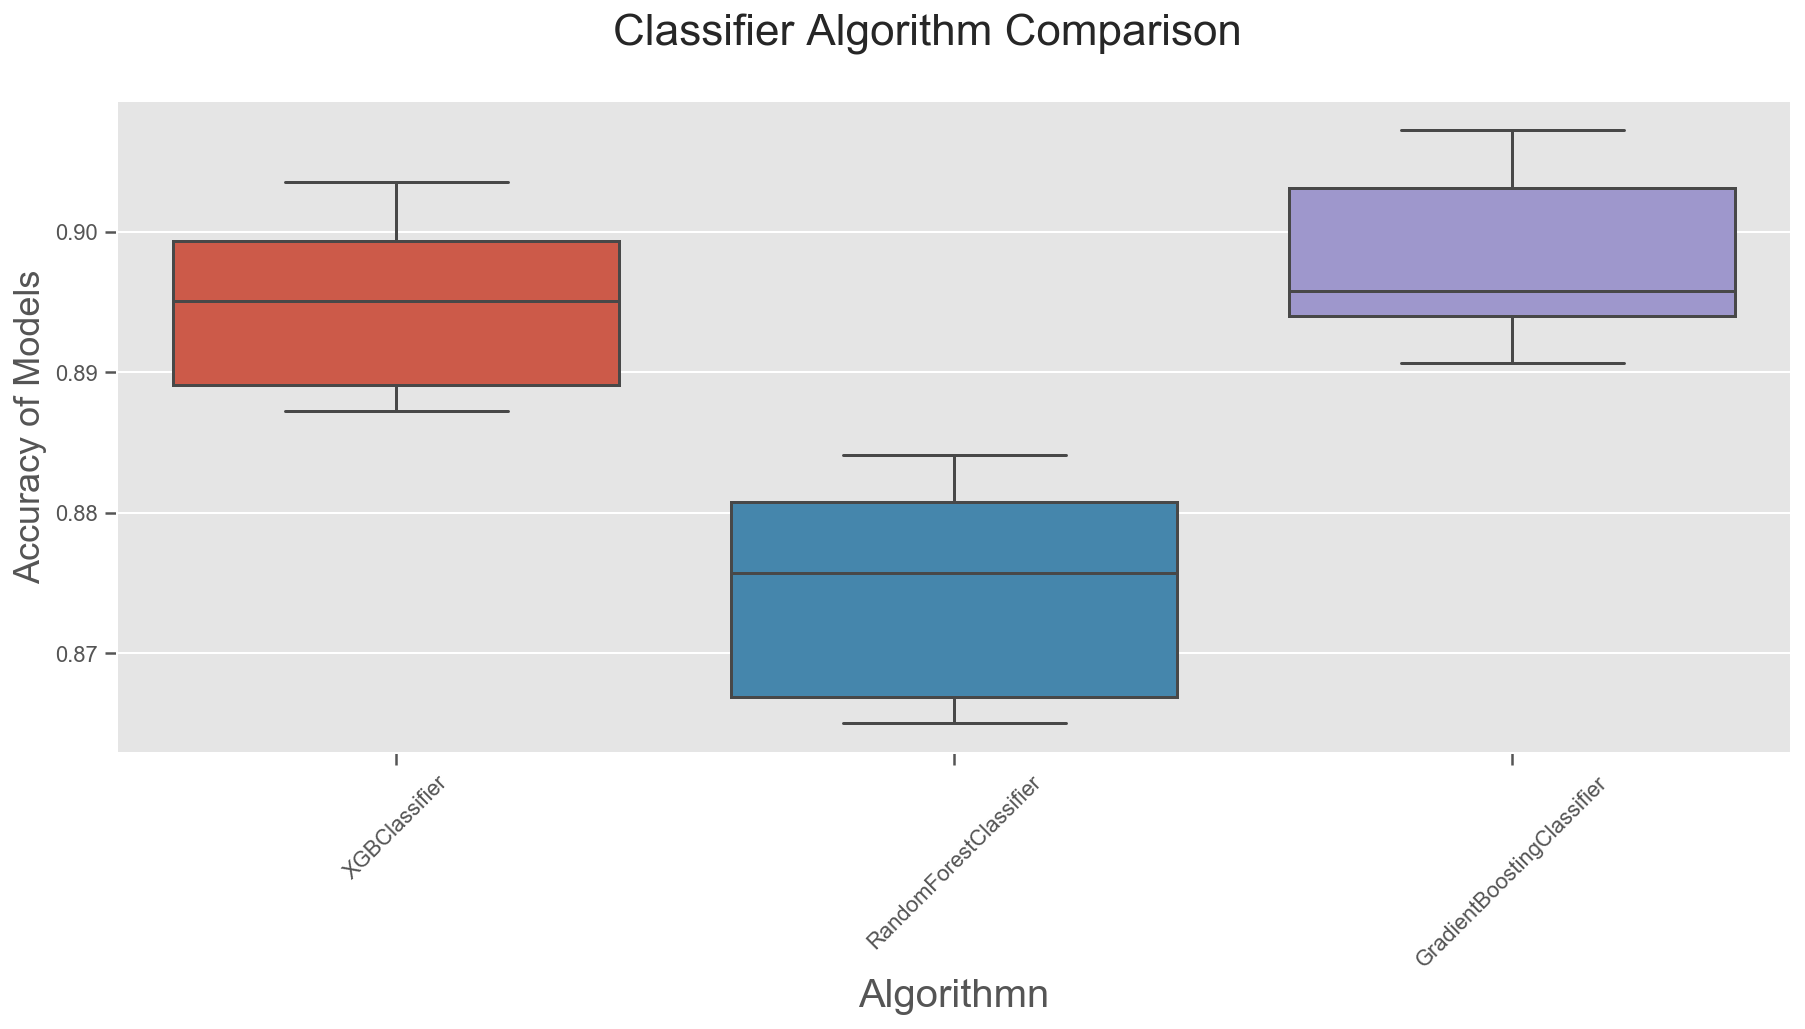

In [71]:
classifiers = []
seed = 42

# classifiers.append(("LogReg", LogisticRegression()))

classifiers.append(("XGBClassifier", XGBClassifier()))

# classifiers.append(("DecisionTreeClassifier", DecisionTreeClassifier()))

classifiers.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=100)))

classifiers.append(("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100)))

# classifiers.append(("RidgeClassifier", RidgeClassifier()))

# classifiers.append((("BaggingClassifier", BaggingClassifier())))

# classifiers.append(("ExtraTreesClassifier",ExtraTreesClassifier()))

scoring = 'roc_auc'
n_folds = 7

results, names  = [], [] 

for name, model  in classifiers:
    kfold = KFold(n_splits=n_folds, shuffle=False, random_state=seed)
    cv_results = cross_val_score(model, 
                                 X_train.values, y_train, 
                                 cv= kfold, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20) 
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

Actually my pc isn't so powerful to run all of them, so I've selected the one's I assumed to be best at least three of them 
### We're going to use..: <font color=red><u><i> GradientBoostingClassifier</i></u></font>
We're gonna use multiple metrics a.k.a `scorer` incase of incasity !


## Randomized search on hyper parameters.
There are great models that doesn't really depends much on hyper parameters tunings to function well on some data and there are models that really rely on serious tuning of parameters, so we're now gonna choose an algorithm to help us run through given parameter and try as much as possible to reveal the most important parameters.
***
Let use 
```python
from sklearn.model_selection import RandomizedSearchCV ```  
#### <i>that's the algorithm to use, we could have use some other one's which could have perform better but take longertime. </i>
it can take upto a day, week or even months !;

so let trade computationality for efficiency.

In [115]:
random_state=42
n_iter=5

num_folds=7
kf = KFold(n_splits=num_folds, random_state=random_state)

# Model
model = GradientBoostingClassifier(random_state=random_state)


param_grid_rand = {'learning_rate': [0.01, 0.001, 0.0001],
                 'max_depth':  [4, 6, 10],
                 'max_features': [20, 30, 'auto'],
                 'max_leaf_nodes': [10, 35, None],
                 'subsample': [0.5, 0.7, .8],
                 'n_estimators': [500, 1000],
                 'random_state': [random_state],
                 'warm_start': [True, False]
                    }

scorer = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score),
           'accuracy': make_scorer(accuracy_score),
           'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}

RndCv = RandomizedSearchCV(model, 
                           param_grid_rand, 
                           n_iter = n_iter,
                           scoring= scorer, 
                           fit_params =None, 
                           n_jobs= -1,
                           cv= kf, 
                           verbose= 50, 
                           random_state= random_state, 
                           return_train_score= False,
                           refit= False
              )

### Now let fit our Initialized `RandomizedSearchCV` model.

In [116]:
fitted_randomSCV = RndCv.fit(X_train, y_train)

Fitting 7 folds for each of 5 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 13.8

In [223]:
persisted_df = pd.DataFrame(fitted_randomSCV.cv_results_)
persisted_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     157.126437      4.777792         1.632818        0.434297   
1      66.659518      3.369775         0.633725        0.047125   
2     325.623925     15.107990         1.969966        0.154927   
3     315.844417      3.510656         1.253737        0.017663   
4     157.716312      2.450404         1.304127        0.035385   

  param_warm_start param_subsample param_random_state param_n_estimators  \
0             True             0.5                 42               1000   
1            False             0.7                 42                500   
2             True             0.7                 42               1000   
3             True             0.5                 42               1000   
4             True             0.8                 42               1000   

  param_max_leaf_nodes param_max_features  ... split0_test_roc_auc  \
0                 None               auto  ...            0.908866   
1                   10                 20  ...            0.859842   
2                 None               auto  ...            0.874451   
3                   35                 30  ...            0.905500   
4                 None               auto  ...            0.908622   

  split1_test_roc_auc split2_test_roc_auc  split3_test_roc_auc  \
0            0.900371            0.899565             0.901826   
1            0.841192            0.856360             0.863383   
2            0.850611            0.859770             0.871906   
3            0.901434            0.897113             0.899614   
4            0.899490            0.899691             0.904941   

   split4_test_roc_auc  split5_test_roc_auc  split6_test_roc_auc  \
0             0.897381             0.910472             0.896371   
1             0.858346             0.869144             0.849289   
2             0.859431             0.879343             0.856587   
3             0.896306             0.912227             0.894025   
4             0.898849             0.911692             0.896587   

   mean_test_roc_auc  std_test_roc_auc  rank_test_roc_auc  
0           0.902122          0.005077                  2  
1           0.856794          0.008515                  5  
2           0.864586          0.009839                  4  
3           0.900888          0.005783                  3  
4           0.902839          0.005242                  1  

[5 rows x 63 columns]

In [61]:
gc.collect()

144

In [142]:
RndCv_ = fitted_randomSCV

In [213]:
params_col =  [colname for colname in persisted_df.columns if colname.startswith('param') or colname.startswith('mean')]
params_col

['mean_fit_time',
 'mean_score_time',
 'param_warm_start',
 'param_subsample',
 'param_random_state',
 'param_n_estimators',
 'param_max_leaf_nodes',
 'param_max_features',
 'param_max_depth',
 'param_learning_rate',
 'params',
 'mean_test_precision',
 'mean_test_recall',
 'mean_test_f1',
 'mean_test_accuracy',
 'mean_test_roc_auc']

In [225]:
rs_results_df = pd.DataFrame(np.transpose([RndCv_.cv_results_['mean_score_time'],
                                         RndCv_.cv_results_['param_learning_rate'].data,
                                         RndCv_.cv_results_['param_max_depth'].data,
                                         RndCv_.cv_results_['param_n_estimators'].data,
                                         RndCv_.cv_results_['param_max_leaf_nodes'].data,
                                         RndCv_.cv_results_['param_max_features'].data,
                                         RndCv_.cv_results_['param_subsample'].data,
                                         RndCv_.cv_results_['mean_test_roc_auc'].data,
                                         RndCv_.cv_results_['mean_test_accuracy'].data,
                                         RndCv_.cv_results_['mean_test_f1'],
                                         RndCv_.cv_results_['mean_test_precision'],
                                         RndCv_.cv_results_['mean_test_recall'],
                                         RndCv_.cv_results_['param_warm_start']
                                         ]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators', 'max_leaf_nodes',
                                   'max_features', 'subsample', 'mean_test_roc_auc','mean_test_accuracy',
                                    'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'warm_start'])

In [226]:
rs_results_df

score learning_rate max_depth n_estimators max_leaf_nodes max_features  \
0   1.63282          0.01         4         1000           None         auto   
1  0.633725         0.001         6          500             10           20   
2   1.96997        0.0001         6         1000           None         auto   
3   1.25374          0.01        10         1000             35           30   
4   1.30413          0.01         4         1000           None         auto   

  subsample mean_test_roc_auc mean_test_accuracy mean_test_precision  \
0       0.5          0.902122           0.941298            0.479035   
1       0.7          0.856794           0.915405                   0   
2       0.7          0.864586           0.915405                   0   
3       0.5          0.900888           0.941037            0.485152   
4       0.8          0.902839           0.941585            0.482701   

  mean_test_recall mean_test_f1 warm_start  
0         0.957885     0.319602       True  
1                0            0      False  
2                0            0       True  
3         0.926625     0.328922       True  
4         0.959263       0.3227       True

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002735AD8D080>,
      dtype=object)

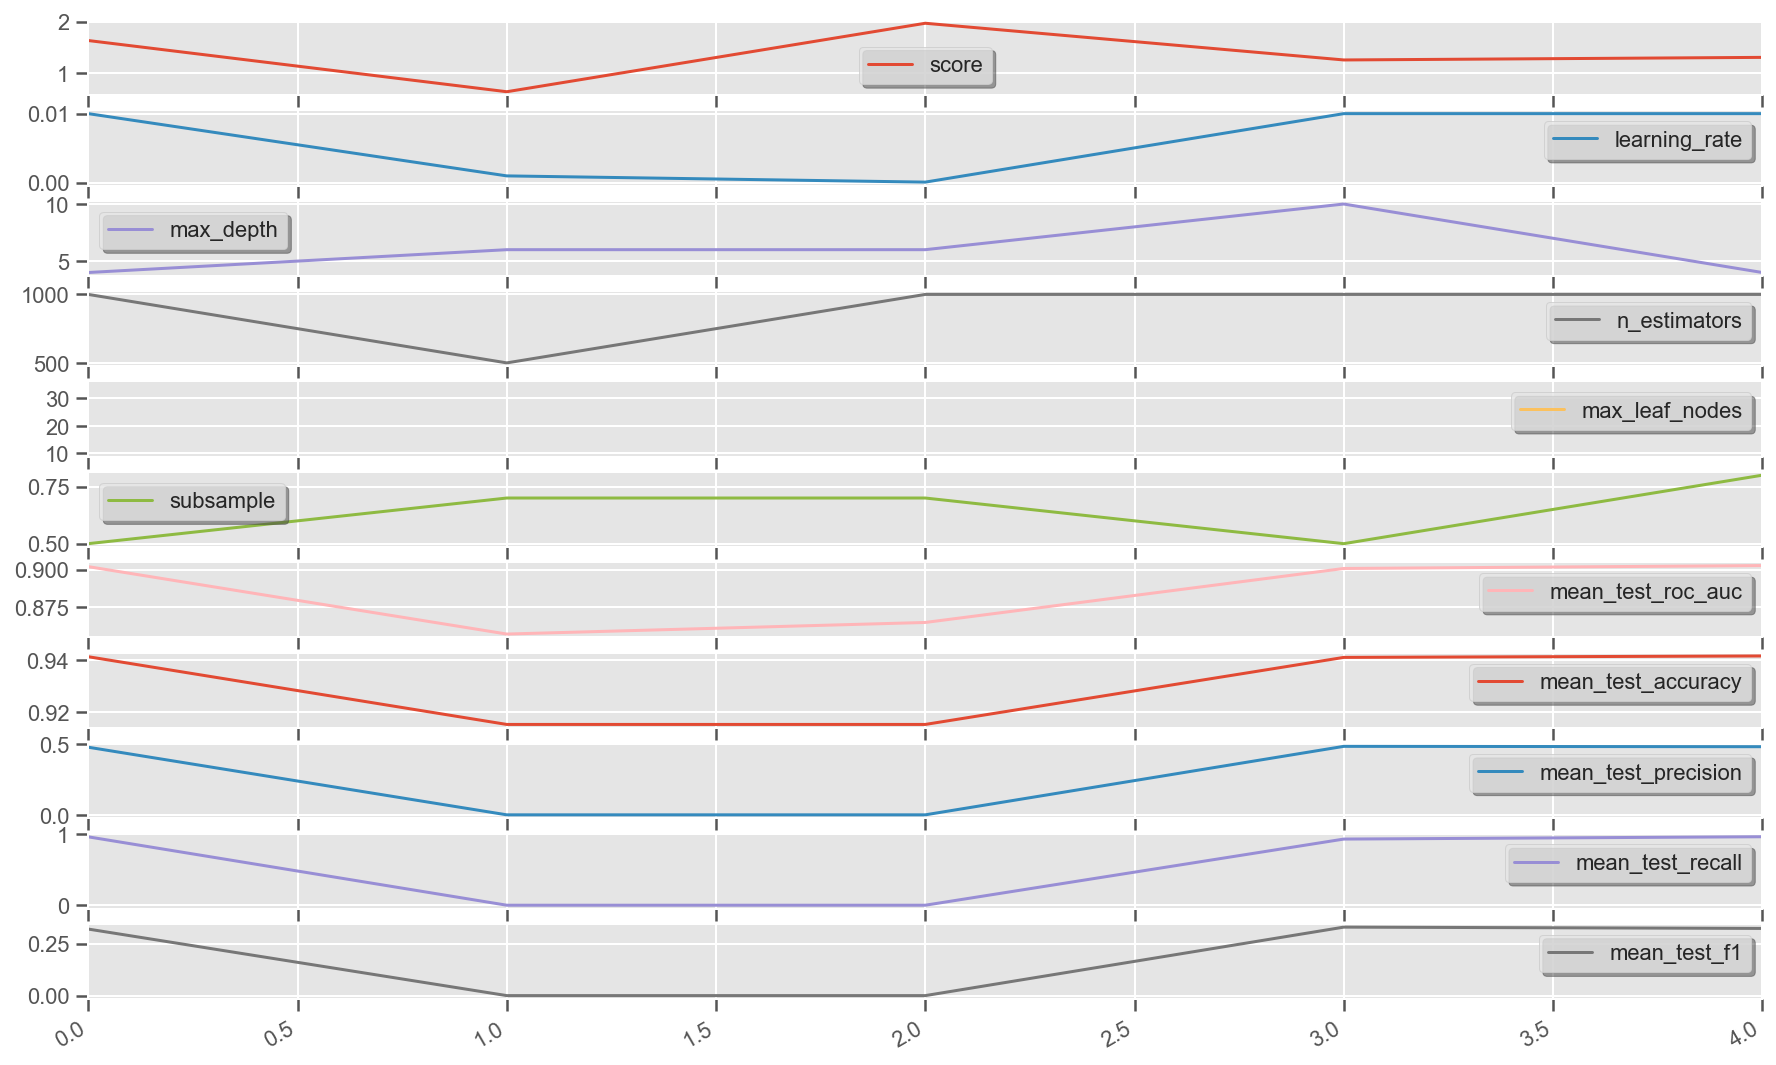

In [216]:
rs_results_df.plot(subplots=True, figsize=(15, 10));

Now, we're gonna choose the best parameters from using the plot and parameters dataframe above using `mean_test_accuracy` `scorer`.

In [239]:
best_params = {
             'n_estimators': 1500,
             'learning_rate': 0.01,
             'max_depth': 4,
             'max_leaf_nodes': None,
             'max_features': 'auto',
             'subsample': .8,
             'warm_start': True}

In [240]:
model = GradientBoostingClassifier(**best_params)
fitted_model = model.fit(X_train, y_train)

In [326]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

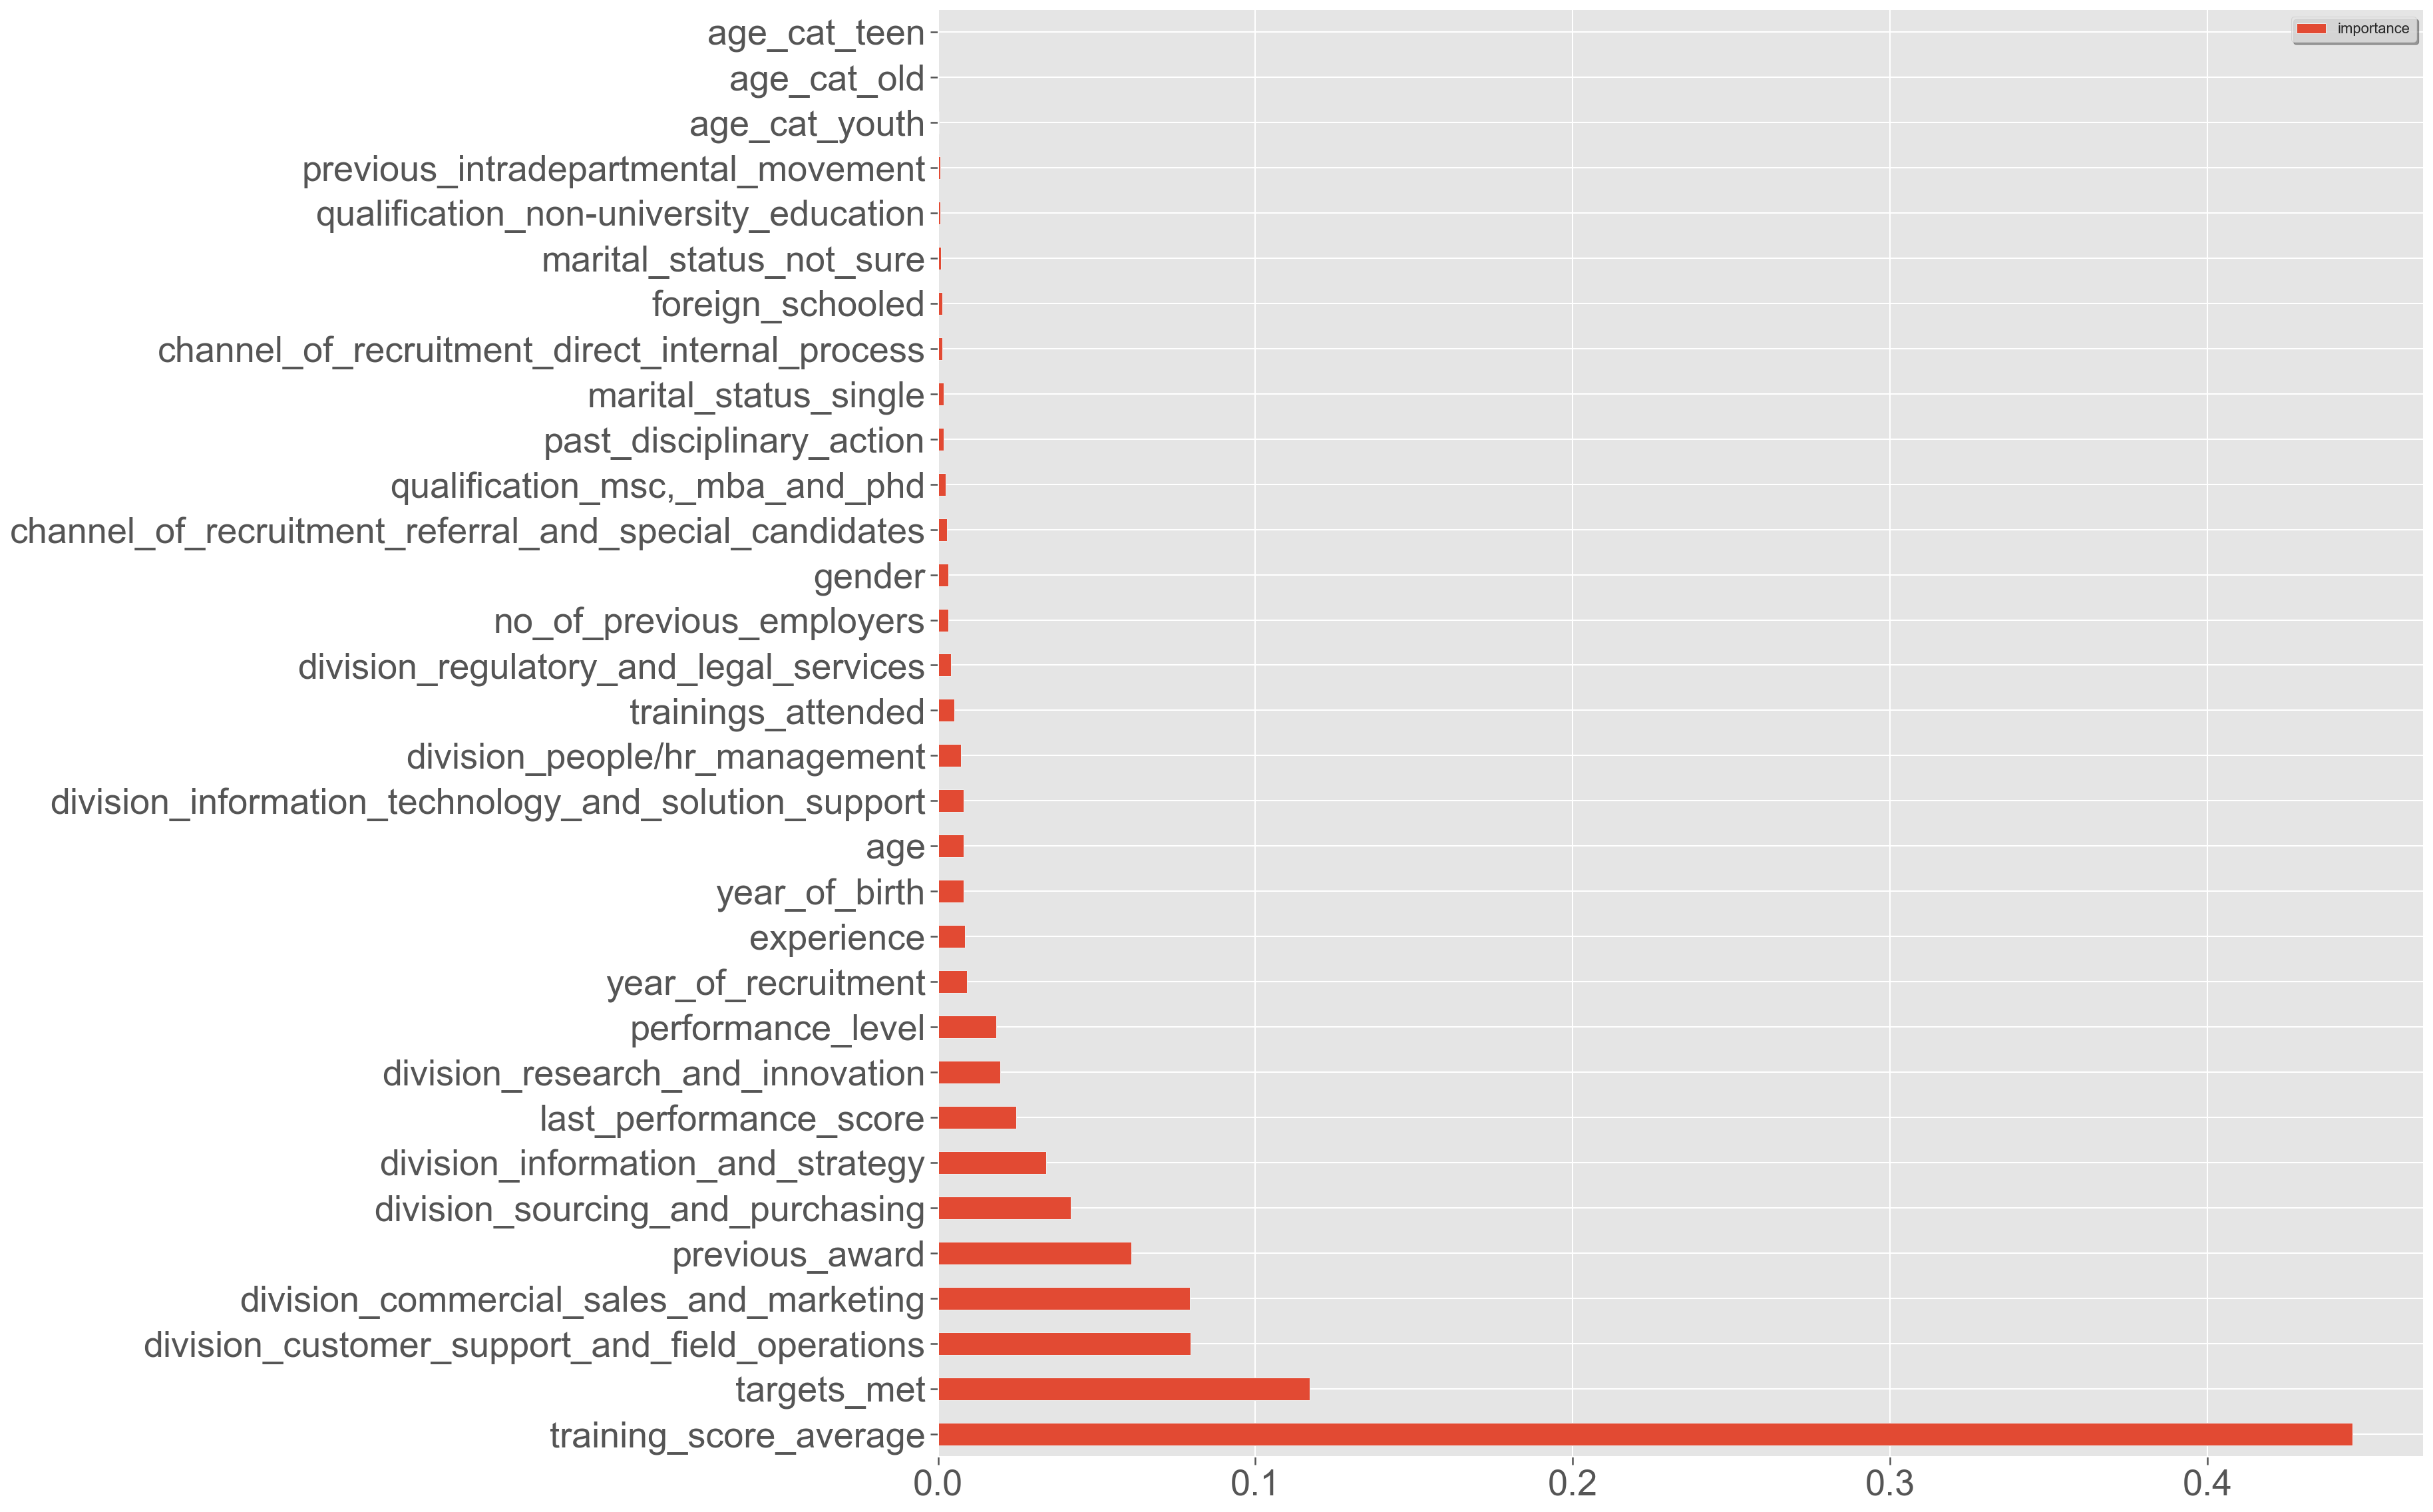

In [382]:
feature_importances.plot.barh(align="center", figsize=(20, 20), fontsize=27)

# IMPORTANT !

To this end; based on our model: 
> * <font color=green>we can advice the employees to attend more training and perform excellently to be more prone to promotion, this seems to be the most important feature based on our model.
> * For those given some kind of targets to meet; they should try and meet those targets to increase chance of promotion.
    </font>

# Finally !:
> * we'll predict the unseen values,
> * save the predicted values to be evaluated on kaggle.

In [365]:
y_pred = model.predict(X_test)

In [370]:
predicted = pd.DataFrame({'EmployeeNo':submission_sample.EmployeeNo, 'Promoted_or_Not':y_pred})

In [372]:
predicted.to_csv('intercampusai2019_ANALYSIS.csv')

# Conclusion

> <i> Yeah I know I did jump a lot of things which is to remind you; I'm still new to the field and still learning, 
    * There are places I've made wrong explanation of things.
    * There are places I wasn't intuitive enough, I'm a big fan of feedback, just hit me and tell me places I've crashed and you'll be my best friend !
    * I'm not a statistics major so I might not be absolutely right about everything I said about hypothesis testing.
    
#### This a competition that I took as a project, if you think you have enough <font color=red>DATA</font>  that  need attention  or analysis; reach out for me !

***
***
***
***
#### <center> <i><b> if you think you're brave enough to be my brother(jump into data science); my contact is above.